In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
from EMQST_lib import support_functions as sf
from EMQST_lib import emqst
from EMQST_lib.qst import QST  
from EMQST_lib.povm import POVM, load_random_exp_povm
from EMQST_lib import measurement_functions as mf
from EMQST_lib import visualization as vis
from EMQST_lib import overlapping_tomography as ot
from EMQST_lib import clustering as cl
from EMQST_lib.qrem import QREM
from joblib import Parallel, delayed
import time
import uuid
import scipy.cluster.hierarchy as sch
from EMQST_lib import support_functions as sf
plt.rcParams.update({'font.size': 15})
np.set_printoptions(precision=3)
%load_ext autoreload
%autoreload 2

# QREM on 16 qubits with structure, using (realistic exp. data)

In [2]:
# Generate new dictionary for current run
base_path = 'QDOT_results/16_exp_example'
data_path = sf.generate_data_folder(base_path)


sim_dict ={
    'n_qubits': 16,
    'n_QST_shots': 2*10**3,
    'n_QDT_shots': 10**4,
    'n_hash_symbols': 4,
    'n_cores': 9,
    'max_cluster_size': 4,
    'data_path': data_path,
}


# Load random parameters
selected_two_point_corr_labels = np.array([[2,3], [4,8], [6,11], [7,13]])
random_two_pont_array = ot.generate_random_pairs_of_qubits(sim_dict["n_qubits"], 10)
total_two_point_corr_labels = np.concatenate((selected_two_point_corr_labels, random_two_pont_array), axis=0)
print(total_two_point_corr_labels)

# Ensure that cluster_sizes is a numpy array of integers
cluster_size = np.array([4, 1, 3, 2, 2, 1, 1, 2], dtype=int)
n_standard_deviation_runs = 10
qrem_default = QREM(sim_dict)
n_state_averages = 5
chunk_size = 4
qrem_default.set_chunked_true_states(n_averages=n_state_averages, chunk_size=chunk_size)
qrem_default.set_initial_cluster_size(cluster_size)
povm_mode = 'strong'
qrem_default.set_exp_POVM_array(noise_mode = povm_mode)
qrem_array = np.array([QREM(sim_dict) for _ in range(n_standard_deviation_runs)])
for qrem in qrem_array:
    qrem.copy_POVM_array(qrem_default)
    qrem.print_current_state()

    qrem.set_initial_cluster_size(cluster_size)

    qrem.perform_QDT_measurements()
    qrem.copy_chunked_true_states(qrem_default)
    qrem.save_initialization()


[[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]]
Using hash from perfect_hash(9,16,4).npy.
Loaded 8 POVMs from Exp_povms/Extracted_modified.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   10.5s
[Parallel(n_jobs=9)]: Done 531 tasks      | elapsed:   11.6s
[Parallel(n_jobs=9)]: Done 1539 tasks      | elapsed:   14.1s
[Parallel(n_jobs=9)]: Done 2255 out of 2272 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:   16.1s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.1s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.7s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.8s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.9s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.2s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.2s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.1s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.1s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.7s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.7s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.6s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.6s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    4.0s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    6.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.1s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.6s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.9s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 2,272 x 10,000.
QST shots for arbitrary 4-RDM reconstruction: 705 x 2,000.
Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.5s finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   21.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   52.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    9.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   16.9s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   24.5s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   31.2s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   39.0s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   47.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   59.7s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.7min remaining:    3.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.8min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   21.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   45.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    8.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   15.5s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   22.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   29.9s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   38.6s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   46.9s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   59.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.7min remaining:    3.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.8min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   20.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.9s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   16.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   23.5s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   30.2s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   37.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   46.5s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.7min remaining:    3.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.8min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   19.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   41.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   15.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.6s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   36.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   44.6s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   57.4s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.7min remaining:    3.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.8min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   19.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   40.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.9s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   37.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   45.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   57.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.6min remaining:    3.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.7min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   17.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   41.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    8.0s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.7s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.6s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   36.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   44.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   55.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.5min remaining:    3.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.6min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   19.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   39.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.9s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.9s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   22.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   30.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   38.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   47.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   59.8s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.6min remaining:    3.2s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.6min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   19.2s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    8.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.0s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   27.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   35.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   43.5s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   53.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.5min remaining:    3.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.5min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   17.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   37.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   25.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   33.3s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   41.5s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   51.3s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.5min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   19.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   41.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.2s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.0s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   34.5s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   42.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   53.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.5min remaining:    3.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.5min finished


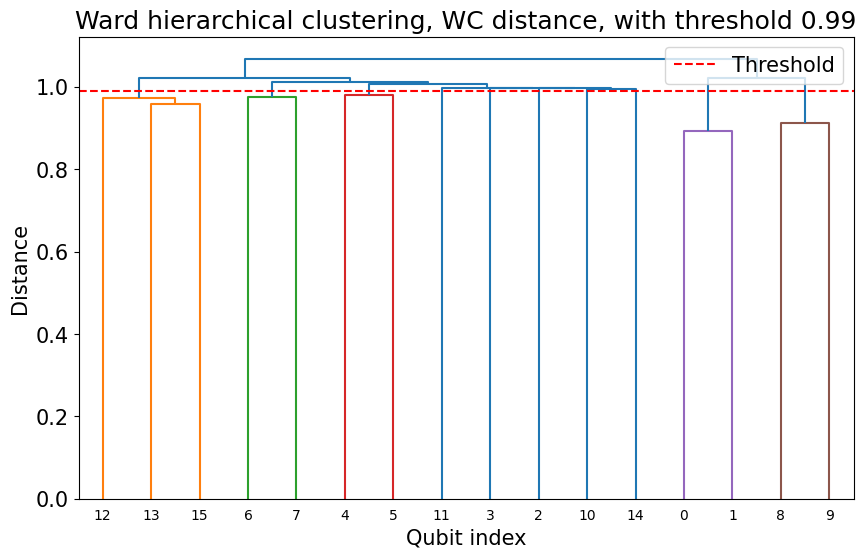

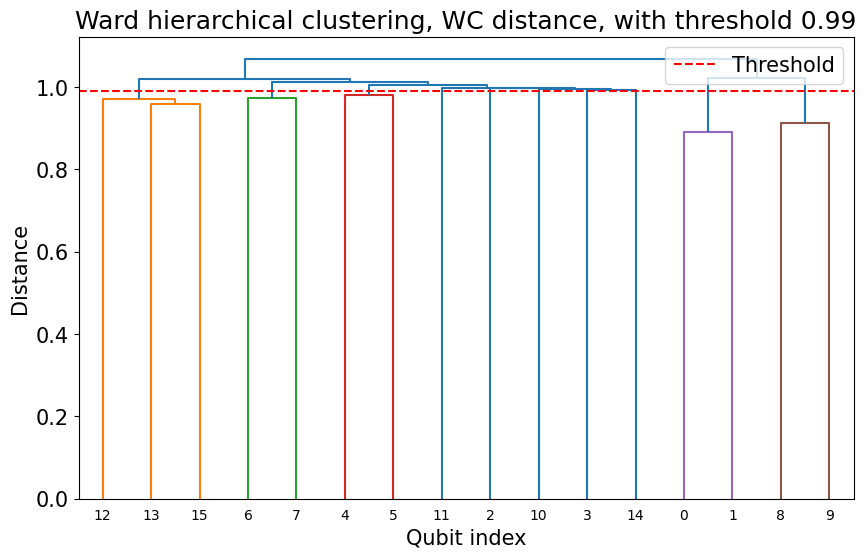

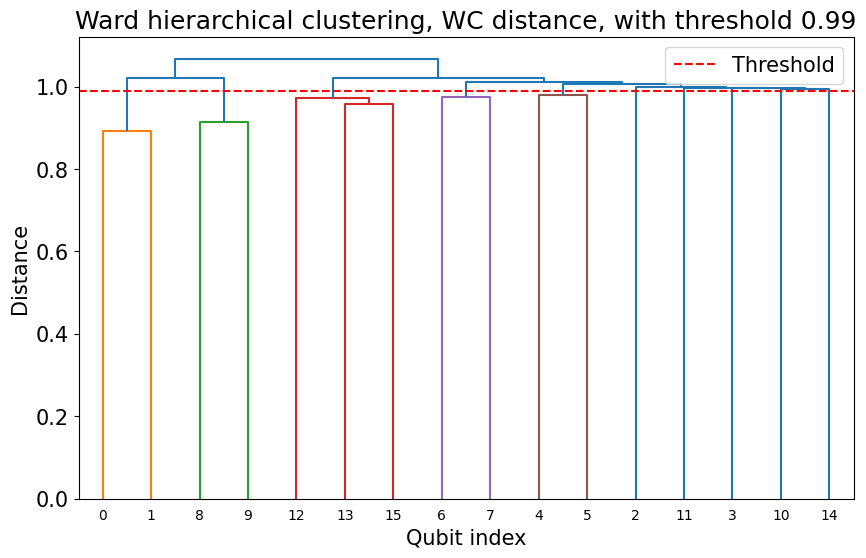

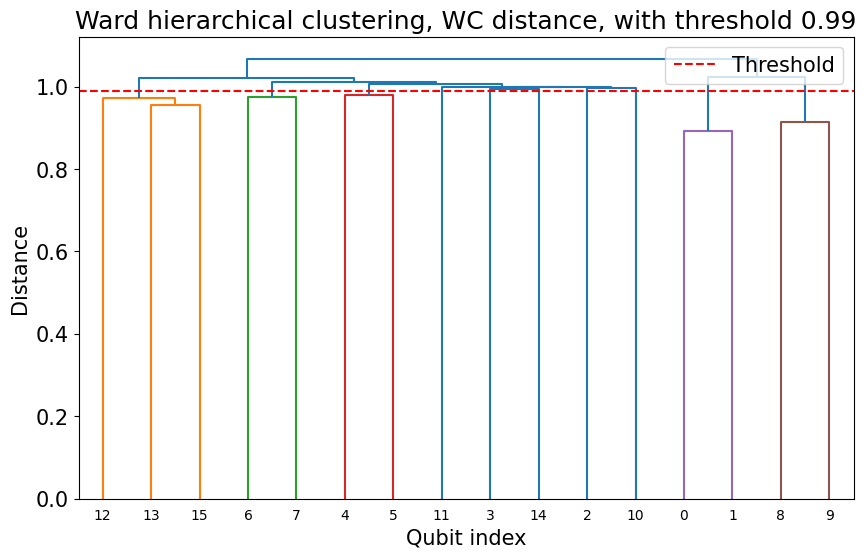

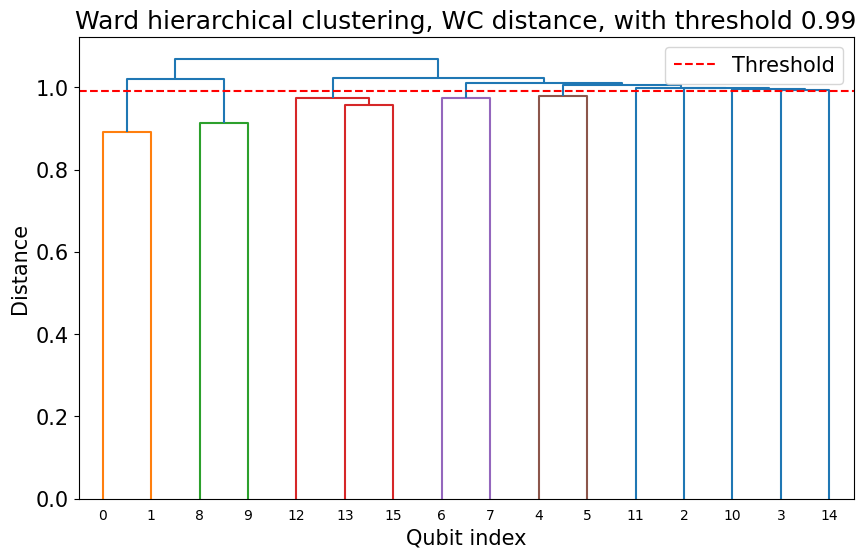

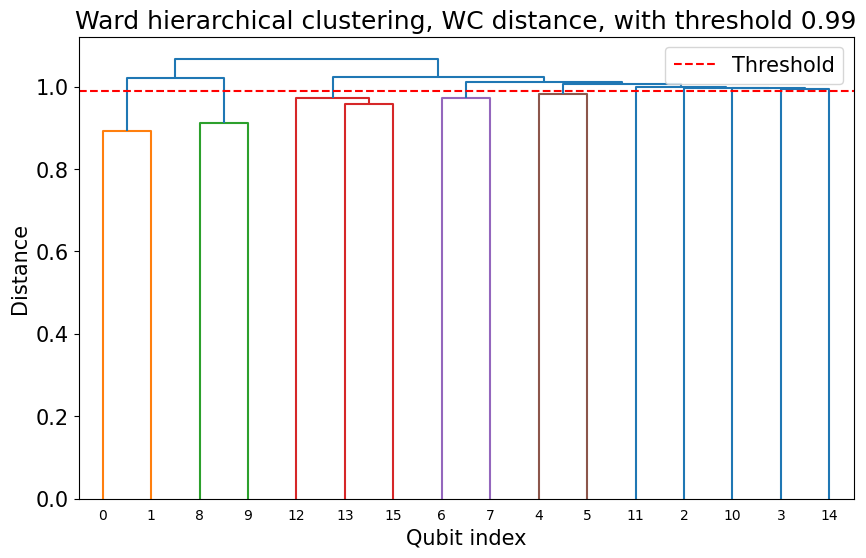

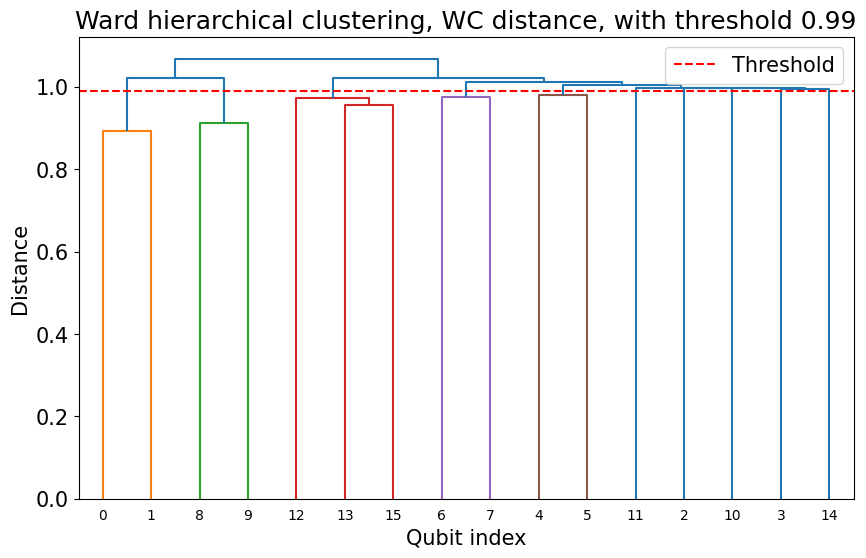

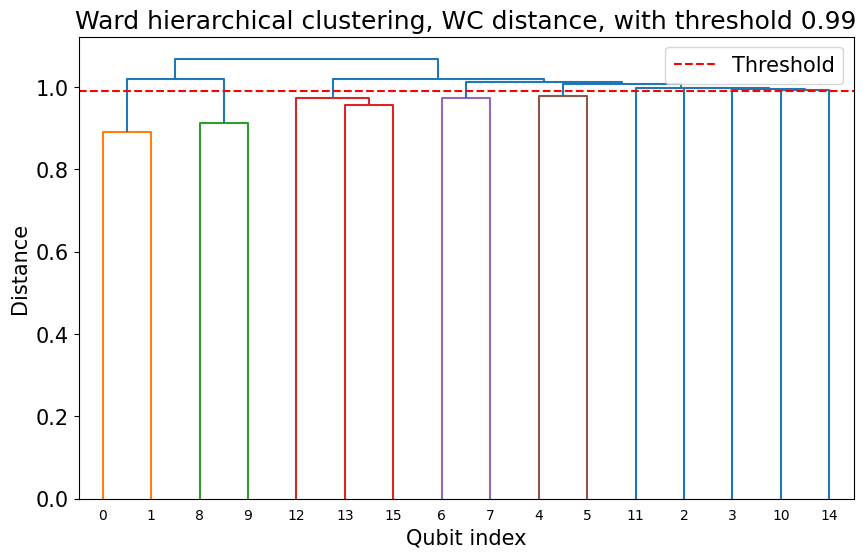

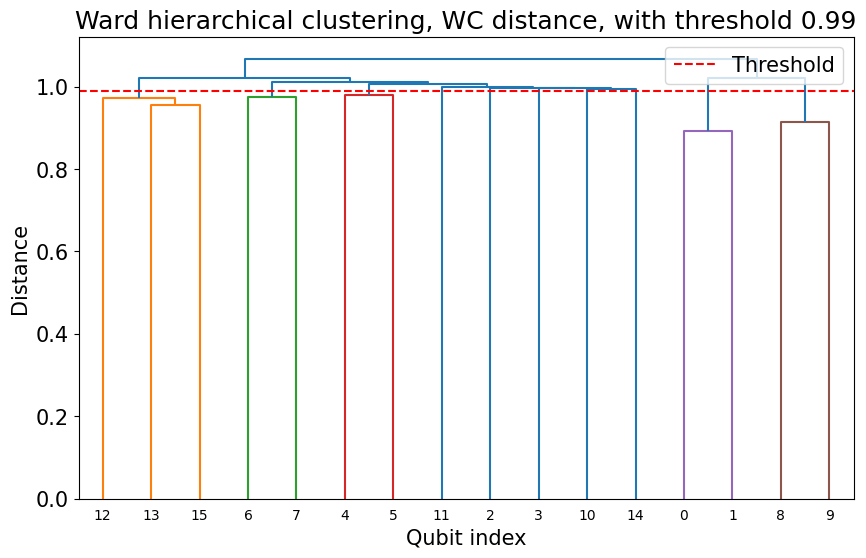

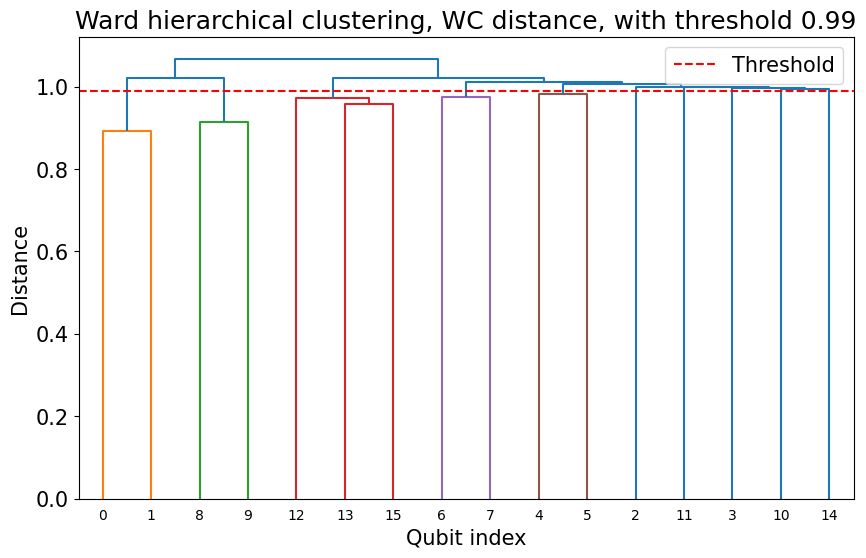

In [3]:
for qrem in qrem_array:
    qrem.perform_clustering(max_cluster_size=4)
    vis.plot_dendrogram(qrem)


# cutoff = 0.99
# for qrem in qrem_array:
#     qrem.update_cluster_cutoff(cutoff)
#     vis.plot_dendrogram(qrem, save_png=True)


In [4]:
dict_array = []
for qrem in qrem_array:
    qrem.reconstruct_all_one_qubit_POVMs()
    qrem.reconstruct_cluster_POVMs()
    #qrem.reconstruct_cluster_with_perfect_clustering()
# n_averages = 3
# chunk_size = 4
# qrem.set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size)
    qrem.perform_averaged_QST_measurements()

# selected_two_point_corr_labels = np.array([[2,3], [4,8],[6,7],[14,15]])
# random_two_pont_array = ot.generate_random_pairs_of_qubits(qrem.n_qubits, 10)
# total_two_point_corr_labels = np.concatenate((selected_two_point_corr_labels, random_two_pont_array), axis=0)
    qrem.set_two_point_correlators( two_point_corr_labels = total_two_point_corr_labels)
    recon_mode = [0,1,2,4,5]

    result_dict = qrem.perform_two_point_correlator_QST(recon_mode)
#perfect_clustering_dict = qrem.perform_two_point_correlator_QST(recon_mode, assume_perfect_clustering=True)

    dict_array.append(result_dict)#, perfect_clustering_dict]

with open(f'{qrem_array[0].data_path}/result_QST.npy', 'wb') as f:
    np.save(f, dict_array)

perm_data_path = f'{qrem_array[0].data_path}'



[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Batch computation too fast (0.16193771362304688s.) Setting batch_size=2.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    1.8s remaining:    8.3s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:    1.9s remaining:    4.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:    1.9s remaining:    2.5s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:    3.3s remaining:    1.5s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:    3.4s remaining:    0.7s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:    3.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.5s remaining:    8.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=9)]: Done   7 out of  10 | e

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    5.0s remaining:   18.5s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    5.1s remaining:    6.8s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    5.4s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    8.5s remaining:    1.3s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    8.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.3s remaining:   27.0s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.5s remaining:   13.5s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.6s remaining:    7.6s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    8.3s remaining:    4.5s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   12.2s remaining:    3.3s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   12.4s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   16.9s remaining:  1.2min
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   16.9s remaining:   37.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   17.0s remaining:   21.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   17.0s remaining:   13.2s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   20.9s remaining:    9.4s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   20.9s remaining:    4.7s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   20.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    4.2s remaining:   10.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.1s remaining:    2.6s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   11.0s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    3.7s remaining:   13.9s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    3.8s remaining:    5.0s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    3.8s remaining:    2.1s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    5.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    6.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.9s remaining:   29.1s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.9s remaining:   14.3s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.9s remaining:    7.9s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    8.0s remaining:    4.4s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   11.6s remaining:    3.1s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.9s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   14.8s remaining:  1.1min
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   14.9s remaining:   32.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   14.9s remaining:   19.2s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   14.9s remaining:   11.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   17.7s remaining:    8.0s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   17.8s remaining:    4.0s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   17.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    4.4s remaining:   10.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.4s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   10.8s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    4.0s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    4.0s remaining:    5.3s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    4.0s remaining:    2.2s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    6.1s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    6.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    6.7s remaining:   24.9s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    6.7s remaining:   12.2s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    6.9s remaining:    3.8s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   10.5s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.0s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   14.8s remaining:  1.1min
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   15.0s remaining:   33.1s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   15.0s remaining:   19.3s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   15.4s remaining:   11.9s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   18.2s remaining:    8.2s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   18.5s remaining:    4.2s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   18.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    4.0s remaining:    9.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.0s remaining:    2.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   12.1s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    2.9s remaining:   10.9s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    3.0s remaining:    4.1s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    3.4s remaining:    1.9s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    5.1s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    5.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    6.8s remaining:   25.2s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.2s remaining:   13.0s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.5s remaining:    7.5s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.8s remaining:    4.3s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   11.6s remaining:    3.1s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.9s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   14.8s remaining:  1.1min
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   15.0s remaining:   33.1s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   15.1s remaining:   19.5s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   15.2s remaining:   11.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   17.8s remaining:    8.0s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   18.0s remaining:    4.1s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   18.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.7s remaining:    8.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   11.1s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    3.0s remaining:   11.3s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    3.2s remaining:    4.2s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    3.3s remaining:    1.8s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    5.2s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.0s remaining:   26.0s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.1s remaining:   12.9s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.3s remaining:    4.0s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   11.0s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.2s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.8s remaining:   55.9s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.9s remaining:   28.6s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   13.2s remaining:   17.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   13.5s remaining:   10.4s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.7s remaining:    7.1s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.9s remaining:    3.6s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   16.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.6s remaining:    8.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   11.3s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    2.9s remaining:   10.7s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    2.9s remaining:    3.9s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    4.5s remaining:    0.7s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    4.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    6.3s remaining:   23.4s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    6.6s remaining:   12.0s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.0s remaining:    7.0s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.3s remaining:    4.0s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   10.9s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.2s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.8s remaining:   55.9s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   13.0s remaining:   28.6s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   13.1s remaining:   16.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   13.2s remaining:   10.2s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   17.7s remaining:    8.0s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   17.8s remaining:    4.0s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   17.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    5.8s remaining:   13.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    8.3s remaining:    8.3s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    8.5s remaining:    3.6s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   15.3s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    5.7s remaining:   21.1s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    5.8s remaining:    7.7s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    5.8s remaining:    3.2s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    8.1s remaining:    1.3s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    8.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.0s remaining:   26.0s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.1s remaining:   12.8s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.1s remaining:    7.1s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.2s remaining:    4.0s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   10.7s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   10.9s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   13.0s remaining:   56.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   13.0s remaining:   28.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   13.1s remaining:   16.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   13.1s remaining:   10.2s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.8s remaining:    7.1s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.9s remaining:    3.6s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   16.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.8s remaining:    9.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.5s remaining:    2.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    9.8s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    4.1s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    4.2s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    4.2s remaining:    2.3s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    6.6s remaining:    1.0s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    6.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.3s remaining:   27.0s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.4s remaining:   13.4s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.4s remaining:    7.4s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.5s remaining:    4.1s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   11.7s remaining:    3.1s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.8s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   28.4s remaining:  2.1min
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   28.4s remaining:  1.0min
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   28.4s remaining:   36.6s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   28.5s remaining:   22.2s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   31.4s remaining:   14.2s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   31.5s remaining:    7.2s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   31.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    4.2s remaining:    9.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.9s remaining:    2.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    9.8s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    3.8s remaining:   14.2s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    3.9s remaining:    5.3s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    4.0s remaining:    2.2s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    6.1s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    6.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    6.6s remaining:   24.3s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    6.6s remaining:   12.0s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    6.7s remaining:    6.7s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    6.8s remaining:    3.7s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   10.3s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   10.4s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.7s remaining:   55.2s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.7s remaining:   28.0s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.8s remaining:   16.4s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.9s remaining:   10.0s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.7s remaining:    7.1s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.7s remaining:    3.6s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.9s remaining:    9.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    5.1s remaining:    5.1s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.8s remaining:    2.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:   10.8s

Set current two-point correlators to [[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [13  2]
 [ 1  7]
 [13 15]
 [11 14]
 [ 0  5]
 [ 8 13]
 [ 8 12]
 [ 8 10]
 [11  6]
 [ 8  6]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    4.1s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   6 out of  14 | elapsed:    4.2s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    4.2s remaining:    2.3s
[Parallel(n_jobs=9)]: Done  12 out of  14 | elapsed:    6.5s remaining:    1.0s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:    6.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  14 | elapsed:    7.2s remaining:   26.7s
[Parallel(n_jobs=9)]: Done   5 out of  14 | elapsed:    7.3s remaining:   13.2s
[Parallel(n_jobs=9)]: Done   7 out of  14 | elapsed:    7.4s remaining:    7.4s
[Parallel(n_jobs=9)]: Done   9 out of  14 | elapsed:    7.5s remaining:    4.1s
[Parallel(n_jobs=9)]: Done  11 out of  14 | elapsed:   11.4s remaining:    3.0s
[Parallel(n_jobs=9)]: Done  14 out of  14 | elapsed:   11.8s

POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8)
POVM shape (32, 32, 32)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (32, 32, 32)
POVM shape (32, 32, 32)
POVM shape (8, 8, 8)
POVM already sorted.
POVM already sorted.
POVM shape (4, 4, 4)
POVM shape (16, 16, 16)
POVM shape (8, 8, 8

[[ 2  3]
 [ 4  8]
 [ 6 11]
 [ 7 13]
 [14 13]
 [11 15]
 [ 6  5]
 [11 13]
 [ 9  0]
 [11  1]
 [12  4]
 [ 5 13]
 [ 8  3]
 [ 8  2]]
['No QREM ', 'Factorized QREM', 'Two-point QREM', 'Classical correlated QREM', 'Correlated QREM']
['No QREM ', 'Factorized QREM', 'Two-point QREM', 'Classical correlated QREM', 'Correlated QREM']
(5, 14)


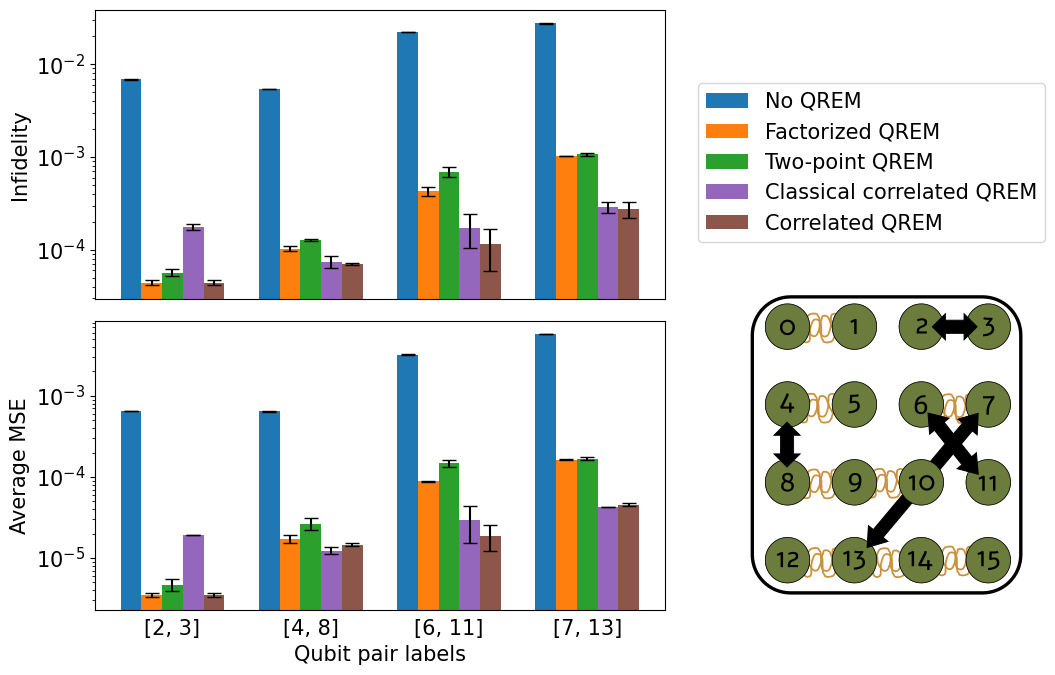

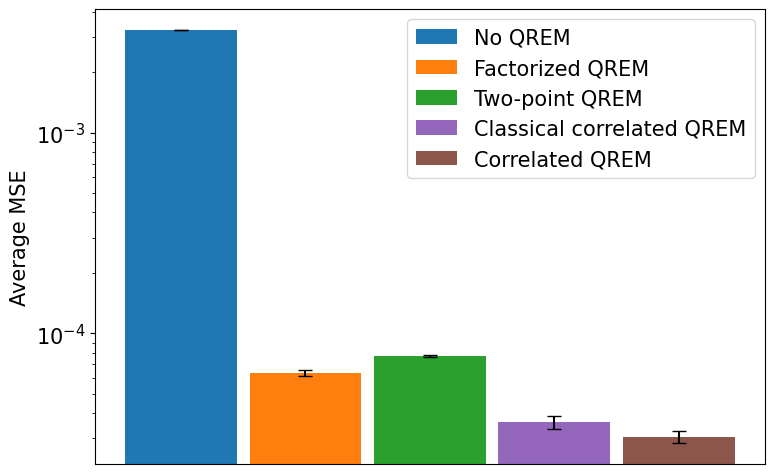

In [5]:
# Plotting
#data_path = "QDOT_results/2024-08-01_13-23-06_9debe732-8fc3-49b5-bdde-ef8b208d43b5"
#filter_array = np.array([0,1,2,4,5])
perm_data_path = "QDOT_results/16_exp_example/2025-01-27_15-28-38_06040dbb-129f-4920-a18c-9b7ddefa25a0"
with open(f'{perm_data_path}/result_QST.npy', 'rb') as f:
    dict_array = np.load(f, allow_pickle=True)

n_averages = dict_array[0]['n_average']
two_point_corr_labels   = dict_array[0]['two_point_corr_labels']
traced_down_rho_true_array = dict_array[0]['traced_down_rho_true_array']
print(two_point_corr_labels)

# Generate average Pauli expectation values
n_op = 25
op_string_array = ot.generate_random_pauli_string(n_op,2)
true_exp_value = ot.compute_state_array_exp_values([traced_down_rho_true_array],op_string_array)[0]

inf_array = []
state_array = []
MSE_array = []
for dict in dict_array:
    state, label_array = ot.load_state_array_from_result_dict(dict)
    print(label_array)
    #perfect_state_array, _ = ot.load_state_array_from_result_dict(perfect_clustering_dict)
    # The states has shapes [n_modes, n_averages, len(two_point_corr_labels), 2**n_qubits, 2**n_qubits]
    inf_array.append(ot.compute_mode_mean_infidelitites(state, traced_down_rho_true_array))#[filter_array]
    state_array.append(state)
    exp_value = ot.compute_state_array_exp_values(state,op_string_array)
    MSE_array.append(ot.compute_op_and_n_averages_mean_MSE(exp_value, true_exp_value))
    # Resulting arrays have shapes [std_averages,n_modes,n_correlators]

# Average over the std_deviation runs
mean_inf_array = np.mean(inf_array, axis=0)
mean_MSE_array = np.mean(MSE_array, axis=0)



fig, ax = plt.subplots(2,1)
if len(two_point_corr_labels) > 4:
    x = np.arange(4)  # How many correlators to plot
else:
    x = np.arange(len(two_point_corr_labels))
width = 0.15  # the width of the bars
multiplier = 0
corr_label_index = [0,1,2,3]
#perfect_inf_array = ot.compute_mode_mean_infidelitites(standard_state_array, traced_down_rho_true_array)
print(mean_inf_array.shape)
color=['C0', 'C1','C2','C4','C5']
for i in range(len(label_array)):
    offset = width * multiplier
    if len(two_point_corr_labels) > 4:
        rects = ax[0].bar(x + offset,mean_inf_array[i,corr_label_index], width, label=label_array[i], color = color[i])
        ax[0].errorbar(x + offset, mean_inf_array[i,corr_label_index], yerr=np.std(inf_array, axis=0)[i,corr_label_index], fmt='none', ecolor='k', capsize=5)
        #ax[0].plot(x + offset, perfect_inf_array[i,:,:4], "kx", label="Exact POVMs" if multiplier == 0 else "")
    else:
        rects = ax[0].bar(x + offset,mean_inf_array[i], width, label=label_array[i])
        #ax[0].plot(x + offset, perfect_inf_array[i], "kx", label="Exact POVMs" if multiplier == 0 else "")        
    multiplier += 1
ax[0].set_yscale('log')
if len(two_point_corr_labels) > 4:
    ax[0].set_xticks(x + 2.3*width, two_point_corr_labels[:4])
else:
    ax[0].set_xticks(x + 2.3*width, two_point_corr_labels)
ax[0].set_ylabel('Infidelity')



    
if len(two_point_corr_labels) > 4:
    corr_x_label = [f'[{label[0]}, {label[1]}]' for label in two_point_corr_labels[corr_label_index]]
else:
    corr_x_label = [f'[{label[0]}, {label[1]}]' for label in two_point_corr_labels]

multiplier = 0

for i in range(len(label_array)):
    offset = width * multiplier
    if len(two_point_corr_labels) > 4:
        rects = ax[1].bar(x + offset, mean_MSE_array[i,corr_label_index], width, color = color[i])
        ax[1].errorbar(x + offset, mean_MSE_array[i,corr_label_index], yerr=np.std(MSE_array, axis=0)[i,corr_label_index], fmt='none', ecolor='k', capsize=5)
        #ax[1].plot(x + offset, perfect_clustering_MSE[i,:4], "kx")
    else:
        rects = ax[1].bar(x + offset, mean_MSE_array[i], width)
    #ax[1].plot(x + offset, perfect_clustering_MSE[i], "kx")
    multiplier += 1
    
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].set_yscale('log')
ax[1].set_ylabel(f'Average MSE')
ax[-1].set_xticks(x + 2*width, corr_x_label)
ax[-1].set_xlabel('Qubit pair labels')
img = plt.imread("images/Cluster_formation_16_qubit_example.png")
fig.figimage(img, 750, 80, zorder=3, alpha=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

fig.set_size_inches(7, 7)
fig.tight_layout()
fig.legend(loc='center left', bbox_to_anchor=(1,0.75))
fig.savefig(f'images/Results/Correlator_spesific_MSE_16_example.png')
handels, labels = ax[0].get_legend_handles_labels()





fig_main, ax_main = plt.subplots(1,1)

mean_over_correlators = np.mean(mean_MSE_array, axis=1)
std_mean_over_correlators = np.mean(MSE_array,axis = 2)
#perfect_mean_MSE = np.mean(perfect_clustering_MSE, axis=1)
bars = ax_main.bar(label_array, mean_over_correlators, width*6, color=['C0', 'C1','C2','C4','C5'])
ax_main.errorbar(label_array, mean_over_correlators, yerr=np.std(std_mean_over_correlators, axis=0), fmt='none', ecolor='k', capsize=5)
#ax_main.plot(label_array, perfect_mean_MSE, "kx")
#ax_main.set_title('Average MSE over random correlators')
ax_main.set_ylabel('Average MSE')
ax_main.set_yscale('log')
ax_main.legend(handels, labels)
ax_main.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
fig_main.set_size_inches(8, 5)
fig_main.tight_layout()
fig_main.savefig(f'images/Results/main_result_16_example.png', dpi = 300)
#fig_main.legend(loc='center left', bbox_to_anchor=(1,0.75))



# QREM on 16 qubit for many differnet depolarizing ISAWP noise

## ISAWP noise

In [2]:
# Generate new dictionary for current run
base_path = 'QDOT_results/iswap_example'
k_mean_array = np.array([0.2, 0.4, 0.6, 0.8])

data_path = sf.generate_data_folder(base_path,subfolder_names=[f'k_mean={k_mean}' for k_mean in k_mean_array])


sim_dict ={
    'n_qubits': 16,
    'n_QST_shots': 2*10**3,
    'n_QDT_shots': 10**4,
    'n_hash_symbols': 4,
    'n_cores': 9,
    'max_cluster_size': 4,
    'data_path': data_path,
}


n_pairs = 10
n_state_averages = 5
chunk_size = 4
selected_two_point_corr_labels = ot.generate_random_pairs_of_qubits(sim_dict["n_qubits"],n_pairs)

n_standard_deviation_runs = 10
qrem_array = [[QREM(sim_dict) for _ in range(len(k_mean_array))] for _ in range(n_standard_deviation_runs)]

# Manually set true states equal in all k-mean cases.



qrem_default = QREM(sim_dict)
qrem_default.set_chunked_true_states(n_averages=n_state_averages, chunk_size=chunk_size)
povm_mode = 'iSWAP'
base_rho_true_array = qrem_default.rho_true_array
for qrem_k_mean_array in qrem_array: # This loop is for standard deviation
    for qrem, k_mean in zip(qrem_k_mean_array, k_mean_array):
        
        qrem.copy_chunked_true_states(qrem_default)
        qrem.set_correlated_POVM_array(k_mean = k_mean, noise_mode = povm_mode)
        save_path = f'{qrem.data_path}/k_mean={k_mean}'
        qrem.perform_QDT_measurements()
        qrem.save_initialization(save_path=save_path)


Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:    9.9s
[Parallel(n_jobs=9)]: Done 279 tasks      | elapsed:   10.7s
[Parallel(n_jobs=9)]: Done 1287 tasks      | elapsed:   13.6s


KeyboardInterrupt: 

In [ ]:
for qrem_k_mean_array in qrem_array:
    for qrem in qrem_k_mean_array:
        qrem.perform_clustering(max_cluster_size=4)
        vis.plot_dendrogram(qrem, save_png=True)

#If you are not happy with current cluster cutoffs, you can update them like so:
update_cutoffs = [ 0.9, 0.9, 0.8, 0.6]

for qrem_k_mean_array in qrem_array:
    for qrem, cutoff in zip(qrem_k_mean_array, update_cutoffs):
        qrem.update_cluster_cutoff(cutoff)
        vis.plot_dendrogram(qrem, save_png=True)



In [4]:
# n_pairs = 7
# n_averages = 3
# chunk_size = 4
# selected_two_point_corr_labels = ot.generate_random_pairs_of_qubits(qrem.n_qubits,n_pairs) #np.array([[0,1], [2,3]])
recon_mode = [0,2,5]
dict_array = []
# #perfect_clustering_dict_array = [] 

# # Manually set true states equal in all k-mean cases.
# qrem_array[0].set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size)
# base_rho_true_array = qrem_array[0].rho_true_array

for qrem_k_mean_array in qrem_array:
    k_mean_array = []
    for qrem in qrem_k_mean_array:
        qrem.reconstruct_all_one_qubit_POVMs()
        qrem.reconstruct_cluster_POVMs()
        #qrem.reconstruct_cluster_with_perfect_clustering()
        #qrem.set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size) # This is just used to set all other properties right, then overwrite the true states
        #qrem.rho_true_array = base_rho_true_array

        qrem.perform_averaged_QST_measurements()
        qrem.set_two_point_correlators( two_point_corr_labels = selected_two_point_corr_labels)
        dict = qrem.perform_two_point_correlator_QST(recon_mode)
        qrem.delete_QDT_outcomes() # To free up space, as memory runs out
        qrem.delete_QST_outcomes()
        #perfect_clustering_dict = qrem.perform_two_point_correlator_QST(recon_mode, assume_perfect_clustering=True)
        k_mean_array.append(dict)
        #perfect_clustering_dict_array.append(perfect_clustering_dict)
    dict_array.append(k_mean_array)


with open(f'{qrem.data_path}/result_QST.npy', 'wb') as f:
    np.save(f, dict_array)

perm_data_path = f'{qrem.data_path}'

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    2.3s remaining:   10.5s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:    3.2s remaining:    7.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:    3.3s remaining:    4.3s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:    3.4s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:    4.0s remaining:    1.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:    5.3s remaining:    1.1s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:    5.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.9s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    5.2s remaining:   21.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    5.2s remaining:    1.2s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.8s remaining:    2.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    3.0s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   13.3s remaining:   57.8s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   13.3s remaining:   29.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   13.3s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   13.4s remaining:   10.4s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   16.2s remaining:    7.3s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   16.3s remaining:    3.7s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   16.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.6s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.5s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.2s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.3s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.8s remaining:    4.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.6s remaining:    1.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   13.8s remaining:   60.0s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   13.8s remaining:   30.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   13.8s remaining:   17.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   13.8s remaining:   10.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   16.6s remaining:    7.5s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   16.7s remaining:    3.8s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   17.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.0s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.5s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.8s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   10.0s remaining:   43.7s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   11.8s remaining:   26.0s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   13.2s remaining:    6.0s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   14.0s remaining:    3.2s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   14.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.0s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.9s remaining:    2.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    1.7s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   54.0s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.8s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.8s remaining:   17.6s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.8s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.3s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.3s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.5s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.4s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.1s remaining:   52.8s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.1s remaining:   26.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.2s remaining:   15.7s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.2s remaining:    9.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.0s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.8s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.5s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.9s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   10.0s remaining:   43.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.2s remaining:   22.6s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   10.4s remaining:   13.4s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   11.5s remaining:    9.0s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.4s remaining:    5.6s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.7s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.6s remaining:    1.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.9s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.0s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.6s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   54.1s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.5s remaining:   27.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.3s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   14.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.7s remaining:    2.0s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.5s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.2s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.8s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.6s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.6s remaining:    6.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.7s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    8.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.2s remaining:   53.3s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.0s remaining:    6.3s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   14.9s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.0s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   14.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    1.6s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.2s remaining:   53.2s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.2s remaining:   27.0s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.3s remaining:    9.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.9s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.0s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.7s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.1s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.6s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.4s remaining:    8.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.3s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.3s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.6s remaining:    6.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.6s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.2s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.6s remaining:   41.8s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.5s remaining:   23.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   11.6s remaining:   14.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   11.9s remaining:    9.3s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.4s remaining:    5.6s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.5s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.8s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.8s remaining:    2.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.0s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   53.9s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.1s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.2s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.5s remaining:    5.5s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.5s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   53.9s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.2s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.4s remaining:    9.1s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.5s remaining:    5.5s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.6s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.5s remaining:    1.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.0s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.2s remaining:   53.3s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.1s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.9s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.3s remaining:    8.9s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.4s remaining:    5.4s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.4s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.3s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.4s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.2s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.8s remaining:   43.0s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.3s remaining:   22.7s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   10.5s remaining:   13.5s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   11.3s remaining:    8.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.3s remaining:    5.5s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.7s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.5s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.2s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.5s remaining:    5.5s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.6s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.7s remaining:    6.6s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   14.9s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.7s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.6s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.4s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.2s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.9s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.4s remaining:    9.1s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.4s remaining:    5.4s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.5s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    3.5s remaining:    8.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    5.3s remaining:    2.2s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    6.3s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.1s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.2s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.4s remaining:    9.1s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.5s remaining:    5.5s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.5s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.4s remaining:   13.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.5s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.3s remaining:   14.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.4s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.7s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.7s remaining:   42.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.3s remaining:   22.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   10.9s remaining:   14.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   11.2s remaining:    8.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.1s remaining:    5.4s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.2s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.4s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.8s remaining:    2.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    1.4s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.0s remaining:   52.3s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.0s remaining:   26.6s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.1s remaining:   15.6s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.2s remaining:    9.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.4s remaining:    6.5s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   14.7s remaining:    3.3s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   14.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.3s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.4s remaining:   13.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.6s remaining:    1.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.8s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.1s remaining:   52.7s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.1s remaining:   26.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.2s remaining:   15.7s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.2s remaining:    9.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   14.9s remaining:    6.7s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.4s remaining:    9.1s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.4s remaining:    5.4s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.5s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.9s remaining:    4.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.6s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.2s remaining:   53.1s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.1s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.8s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.0s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.1s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.3s remaining:    8.9s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.4s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.7s remaining:   15.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.3s remaining:   14.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.4s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.2s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.5s remaining:   41.4s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:    9.8s remaining:   21.6s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   10.5s remaining:   13.5s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.2s remaining:    9.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.4s remaining:    5.6s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.9s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.4s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.0s remaining:    2.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    2.3s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    3.3s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   54.0s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.3s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.3s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.7s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.6s remaining:    9.3s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.2s remaining:   53.2s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.3s remaining:   27.1s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.3s remaining:   15.9s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.0s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.2s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.8s remaining:   15.4s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    5.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    1.8s remaining:    4.3s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.8s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   54.0s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.4s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.4s remaining:   16.5s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.5s remaining:    9.2s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.4s remaining:   15.0s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.5s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.8s remaining:   42.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.2s remaining:   22.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   10.5s remaining:   13.6s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   11.0s remaining:    8.5s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.3s remaining:    5.5s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.7s remaining:    2.8s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    1.6s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.5s remaining:   54.5s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.5s remaining:   27.7s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.6s remaining:   16.2s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.7s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.6s remaining:    7.0s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.6s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.7s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.7s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.2s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.2s remaining:    3.4s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    5.9s remaining:   13.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.0s remaining:    2.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    6.6s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.4s remaining:   53.9s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.4s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.5s remaining:   16.8s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.6s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.4s remaining:   15.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.5s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:    9.8s remaining:   42.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   10.3s remaining:   22.8s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   11.1s remaining:   14.3s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.6s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   12.4s remaining:    5.6s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   12.7s remaining:    2.9s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   13.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.3s remaining:   13.5s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.8s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.7s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.4s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.6s remaining:    9.8s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.4s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.4s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.6s remaining:   17.1s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.5s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.7s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.2s remaining:   13.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.3s remaining:    0.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    2.8s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.3s remaining:   53.6s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.4s remaining:   27.3s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.4s remaining:   16.0s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.4s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.0s remaining:    6.8s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.3s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.7s remaining:    9.6s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.2s remaining:   13.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.3s remaining:    0.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    2.2s remaining:    5.2s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    3.5s remaining:    1.5s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.5s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  16 | elapsed:   12.5s remaining:   54.3s
[Parallel(n_jobs=9)]: Done   5 out of  16 | elapsed:   12.5s remaining:   27.5s
[Parallel(n_jobs=9)]: Done   7 out of  16 | elapsed:   12.5s remaining:   16.1s
[Parallel(n_jobs=9)]: Done   9 out of  16 | elapsed:   12.5s remaining:    9.7s
[Parallel(n_jobs=9)]: Done  11 out of  16 | elapsed:   15.4s remaining:    6.9s
[Parallel(n_jobs=9)]: Done  13 out of  16 | elapsed:   15.5s remaining:    3.5s
[Parallel(n_jobs=9)]: Done  16 out of  16 | elapsed:   15.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   8 | elapsed:    5.7s remaining:   17.2s
[Parallel(n_jobs=9)]: Done   3 out of   8 | elapsed:    5.8s remaining:    9.7s
[Parallel(n_jobs=9)]: Done   4 out of   8 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=9)]: Done   5 out of   8 | elapsed:    5.8s

Set current two-point correlators to [[13  2]
 [ 5 10]
 [ 0  6]
 [ 4  0]
 [ 0 13]
 [12  1]
 [ 9  4]
 [11  7]
 [ 3  1]
 [15  9]].


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of  10 | elapsed:    3.2s remaining:   13.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=9)]: Done   8 out of  10 | elapsed:    3.4s remaining:    0.8s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   3 out of  10 | elapsed:    6.4s remaining:   15.1s
[Parallel(n_jobs=9)]: Done   5 out of  10 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=9)]: Done   7 out of  10 | elapsed:    6.5s remaining:    2.7s
[Parallel(n_jobs=9)]: Done  10 out of  10 | elapsed:    7.1s finished


POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM already sorted.
POVM shape (16, 16, 16)
POVM shape (16, 16, 16)
POVM already sorted.
POVM shape (16, 16, 16)
POVM alrea

### Plotting for the iSWAP noise case


[array([[1.030e-02, 2.737e-02, 6.071e-02, 9.293e-02],
       [6.331e-03, 3.611e-02, 2.110e-01, 3.994e-01],
       [4.252e-05, 1.364e-04, 7.584e-04, 4.511e-05]]), array([[1.208e-02, 2.942e-02, 6.131e-02, 9.023e-02],
       [7.525e-03, 4.011e-02, 2.284e-01, 3.855e-01],
       [4.230e-05, 6.423e-04, 4.874e-04, 5.588e-05]]), array([[9.924e-03, 3.360e-02, 5.513e-02, 8.954e-02],
       [8.393e-03, 5.470e-02, 1.708e-01, 3.822e-01],
       [4.265e-05, 5.949e-04, 1.023e-03, 5.356e-05]]), array([[1.432e-02, 3.012e-02, 6.048e-02, 1.018e-01],
       [1.228e-02, 4.019e-02, 2.221e-01, 4.071e-01],
       [4.496e-05, 1.427e-04, 5.007e-04, 4.028e-05]]), array([[6.698e-03, 2.946e-02, 5.820e-02, 9.508e-02],
       [3.000e-03, 4.305e-02, 2.159e-01, 3.935e-01],
       [3.513e-05, 1.743e-04, 6.403e-03, 4.693e-05]]), array([[1.299e-02, 3.248e-02, 6.519e-02, 9.081e-02],
       [8.974e-03, 5.403e-02, 2.387e-01, 3.966e-01],
       [3.694e-05, 9.329e-04, 1.673e-04, 4.959e-05]]), array([[1.325e-02, 3.201e-02, 6.0

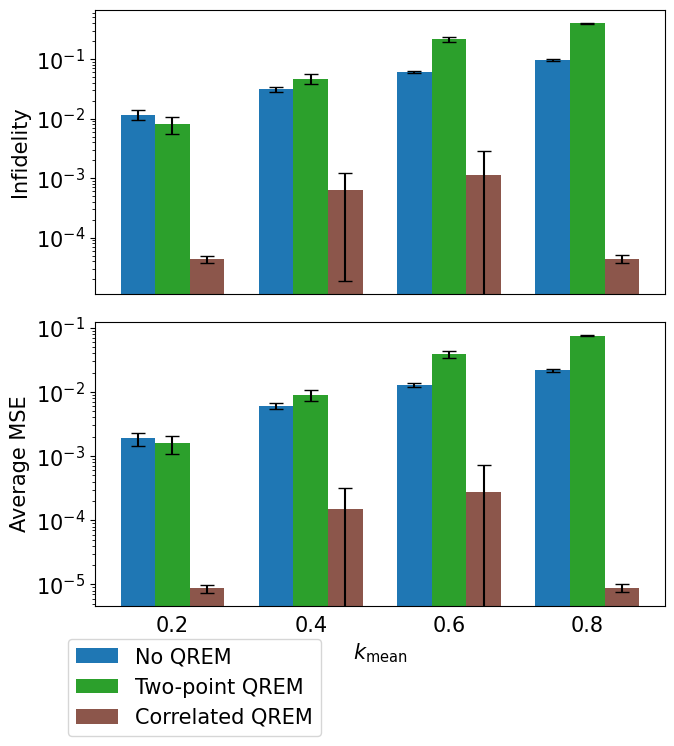

In [16]:
#perm_data_path = "QDOT_results/iswap_example/2025-01-08_17-12-18_2c999945-7076-4ab9-b755-c99d76a85d1f/k_mean=0.8"
with open(f'{perm_data_path}/result_QST.npy', 'rb') as f:
    dict_array = np.load(f, allow_pickle=True)
# dict_array has shape [n_std_deviation, n_k_mean]
#perfect_clustering_dict_array = dict_array[1]

# # Compute infidelities:
# The matrix has the shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels) , 2**n_qubits, 2**n_qubits]
# traced_down_rho_true_array has the shape [n_averages, n_two_point_corr, 2**n_qubits, 2**n_qubits]

def k_mean_infidelity_computation(state_matrix, rho_true_array):
    """
    Computes the inifdelities to be plotted for the k-mean plot
    state_matrix comes in shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels) , 2**n_qubits, 2**n_qubits]
    rho_true_array comes in shape [n_averages, n_two_point_corr, 2**n_qubits, 2**n_qubits]

    will return infidelities averaged over n_averages and n_two_point_corr, final shape will be [n_k_mean, n_modes]
    """
    mode_mean_inf = [ot.compute_mode_mean_infidelitites(k_mean,rho_true_array) for k_mean in state_matrix]
    # Returns a list of arrays of shape [n_k_mean, n_modes, len(two_point_corr_labels)]
    return np.mean(mode_mean_inf, axis = 2)


def compute_k_mean_expectation_values(state_matrix,op_string_array):
    """
    Computes expectation values for a given state matrix.
    state_matrix shape has [n_k_mean, n_modes, n_averages, len(two_point_corr_labels) , 2**n_qubits, 2**n_qubits]
    returns expectation values of shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels), n_op]
    """
    return np.array([ot.compute_state_array_exp_values(matrix,op_string_array) for matrix in state_matrix])

def compute_k_mean_mean_MSE(exp_value_array, true_exp_value):
    """
    Computes the mean MSE for a given expectation value array
    true_exp_value is of shape [n_averages, len(two_point_corr_labels), n_op]
    exp_value_array is of shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels), n_op]
    returns an array of shape [n_k_mean, n_modes]
    """
    return np.array([[np.mean((true_exp_value - mode)**2) for mode in k_mean] for k_mean in exp_value_array])
# traced_down_rho_true_array = []
# for qrem_k_mean_array in qrem_array:
#     traced_down_rho_true_array.append(qrem_k_mean_array[0].traced_down_correlator_rho_true_array)


k_mean_array = [0.2, 0.4, 0.6, 0.8]


traced_down_rho_true_array = dict_array[0][0]['traced_down_rho_true_array']
n_averages = dict_array[0][0]['n_average']
two_point_corr_labels   = dict_array[0][0]['two_point_corr_labels']

# Generate average Pauli expectation values
n_op = 25
op_string_array = ot.generate_random_pauli_string(n_op,2)
true_exp_value = compute_k_mean_expectation_values([[traced_down_rho_true_array]],op_string_array)[0]

# We need to treat each k-mean on it's own.
state_matrix = []
inf_matrix = []
inf = []
MSE = []
#perfect_clustering_state_matrix = []
for std_it in range(len(dict_array)):
    k_state_matrix = []
    for k_it in range(len(dict_array[std_it])):
        state_array, label_array = ot.load_state_array_from_result_dict(dict_array[std_it][k_it])
        #perfect_clustering_state_array, _ = ot.load_state_array_from_result_dict(perfect_clustering_dict_array[k_it])
        k_state_matrix.append(state_array)
        
        #perfect_clustering_state_matrix.append(perfect_clustering_state_array)
    state_matrix.append(k_state_matrix)
    inf_k_mean= k_mean_infidelity_computation(k_state_matrix, traced_down_rho_true_array).T # T is to swap order of modes and k_mean
    inf.append(inf_k_mean)
    exp_value = compute_k_mean_expectation_values(k_state_matrix,op_string_array)
    MSE_k_mean = compute_k_mean_mean_MSE(exp_value, true_exp_value).T # Transpose to make method be outer layer
    MSE.append(MSE_k_mean)


inf_mean = np.mean(inf, axis = 0)
MSE_mean = np.mean(MSE, axis = 0)

#inf_average_perfect_clustering = k_mean_infidelity_computation(perfect_clustering_state_matrix, traced_down_rho_true_array).T
# Has the shape [n_standard_div,n_recon_modes, n_k_mean]
print(inf)
x = np.arange(len(k_mean_array))  # the k-mean label locations
color_array = ['C0', 'C2', 'C5']
width = 0.25  # the width of the bars
multiplier = 0
# The shape of the array is 
fig, ax = plt.subplots(2,1)

for i in range(len(label_array)): 
    offset = width * multiplier
    rects = ax[0].bar(x + offset, inf_mean[i], width,label=label_array[i], color = color_array[i]) # Transpose to make method be outer layer
    ax[0].errorbar(x + offset, inf_mean[i], yerr=np.std(inf, axis=0)[i], fmt='none', ecolor='k', capsize=5)
    #ax[0].plot(x + offset, inf_average_perfect_clustering[i], "kx", label="Perfect clustering" if multiplier == 0 else "")
    multiplier += 1

ax[0].set_yscale('log')
#ax[0,0].set_title(rf"Average over {n_averages} states.")
ax[0].set_xticks(x + width, k_mean_array)
ax[0].set_ylabel('Infidelity')




#perfect_clustering_exp_value_array = compute_k_mean_expectation_values(perfect_clustering_state_matrix,op_string_array)
#perfect_clustering_MSE = compute_k_mean_mean_MSE(perfect_clustering_exp_value_array, true_exp_value ).T

#print(standard_mean_MSE.shape)
multiplier = 0
for i in range(len(label_array)):
    offset = width * multiplier
    rects = ax[1].bar(x + offset, MSE_mean[i], width, color = color_array[i])
    ax[1].errorbar(x + offset, MSE_mean[i], yerr=np.std(MSE, axis=0)[i], fmt='none', ecolor='k', capsize=5)
    #ax[1].plot(x + offset, perfect_clustering_MSE[i], "kx",)
    multiplier += 1
    

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].set_yscale('log')
ax[1].set_ylabel(f'Average MSE')


ax[-1].set_xticks(x + 1*width, k_mean_array)

ax[-1].set_xticks(x + 1*width, k_mean_array)
ax[-1].set_xlabel(r'$k_{\text{mean}}$')

#img = plt.imread("images/cluster_formation_16_iSWAP.png")
#fig.figimage(img, 680, 80, zorder=3, alpha=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom = True) # labels along the bottom edge are off


fig.set_size_inches(7, 7)
fig.tight_layout()
fig.legend(loc='center left', bbox_to_anchor=(0.1,0))#(0.15,0.5))
fig.savefig(f'images/Results/iSWAP_example.png',bbox_inches='tight', dpi = 300)

## Coherent error example

In [4]:
# Generate new dictionary for current run
base_path = 'QDOT_results/coherent_example'
rot_angle_array = np.array([5,10,20,30])* np.pi/100
data_path = sf.generate_data_folder(base_path,subfolder_names=[f'angle={angle}' for angle in rot_angle_array])


sim_dict ={
    'n_qubits': 16,
    'n_QST_shots': 2*10**3,
    'n_QDT_shots': 10**4,
    'n_hash_symbols': 4,
    'n_cores': 9,
    'max_cluster_size': 4,
    'data_path': data_path,
}
# Constant overrotation_angle

n_pairs = 10
n_state_averages = 5
chunk_size = 4
selected_two_point_corr_labels = ot.generate_random_pairs_of_qubits(sim_dict["n_qubits"],n_pairs)
print(selected_two_point_corr_labels)
n_standard_deviation_runs = 10
qrem_array = [[QREM(sim_dict) for _ in range(len(rot_angle_array))] for _ in range(n_standard_deviation_runs)]
qrem_default = QREM(sim_dict)
qrem_default.set_chunked_true_states(n_averages=n_state_averages, chunk_size=chunk_size)
base_rho_true_array = qrem_default.rho_true_array

# Ensure that cluster_sizes is a numpy array of integers
cluster_size = np.array([4, 1, 3, 2, 2, 1, 2, 1], dtype=int)
for qrem_angle_array in qrem_array:
    for qrem, angle in zip(qrem_angle_array, rot_angle_array):
        qrem.copy_chunked_true_states(qrem_default)
        qrem.set_initial_cluster_size(cluster_size)
        qrem.set_coherent_POVM_array(angle = angle)
        save_path = f'{qrem.data_path}/angle={angle}'
        qrem.perform_QDT_measurements()
        qrem.save_initialization(save_path=save_path)

[[ 3 12]
 [ 1  3]
 [ 5 14]
 [ 1  3]
 [10  6]
 [ 2  3]
 [ 4  0]
 [ 5  4]
 [ 9  3]
 [15  0]]
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_hash(9,16,4).npy.
Using hash from perfect_has

[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:    9.3s
[Parallel(n_jobs=9)]: Done 747 tasks      | elapsed:   11.0s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:   14.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:   14.2s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.1s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    4.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    4.9s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    4.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.0s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.3s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.2s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    1.9s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.1s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    2.9s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    4.7s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=9)]: Done 1287 tasks      | elapsed:    3.1s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.7s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.8s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.2s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.2s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.5s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.2s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.3s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.1s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.3s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.5s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.3s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.6s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.5s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.6s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.1s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.0s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    4.7s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    4.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.0s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.1s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.1s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.6s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.9s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.9s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    7.0s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.9s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    6.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    7.4s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.7s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.3s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.5s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.2s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.6s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.6s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.7s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    6.6s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    8.1s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    1.7s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    3.6s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    5.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    7.9s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.9s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    6.1s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    7.4s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.7s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.0s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.6s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.2s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.3s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.4s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.0s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.5s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.4s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.5s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.1s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.9s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.9s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.9s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.0s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.1s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.3s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.3s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.5s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    5.3s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    6.4s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.1s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.5s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.8s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.8s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 1422 tasks      | elapsed:    3.5s
[Parallel(n_jobs=9)]: Done 2223 tasks      | elapsed:    5.5s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.7s finished


Simulating QDT measurements for 16 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    4.7s
[Parallel(n_jobs=9)]: Done 2272 out of 2272 | elapsed:    5.7s finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   35.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.0min finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   23.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   29.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   36.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   45.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   56.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.5min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   11.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.0s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   31.0s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   47.1s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   26.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   47.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   20.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   27.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   34.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   41.0s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   48.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   55.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.1s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   14.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   20.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   26.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.4s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   38.2s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   46.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   57.4s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   21.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   42.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.7s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   22.0s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.3s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   35.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   42.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   52.3s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.1s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   22.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   28.6s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   35.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   43.2s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   50.6s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   57.7s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.5s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   23.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   31.3s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   45.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   53.3s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   21.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   15.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   21.0s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   28.0s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   35.5s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   41.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   50.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.2s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.0s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   31.4s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   50.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   58.6s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   48.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.9s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   11.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   23.9s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   37.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   47.2s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   56.5s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   49.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.7s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   15.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   28.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   38.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   46.0s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   57.1s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   50.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   11.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.8s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   40.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   46.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   27.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   49.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.2s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.7s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   25.3s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   41.8s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   54.3s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.5min remaining:    3.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.6min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   27.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   48.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.1s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.7s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   22.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   29.3s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   35.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   43.8s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   51.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   58.1s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   26.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   50.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    8.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   15.9s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   22.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   30.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   39.3s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   47.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   56.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.5min remaining:    2.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.5min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.6s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.2s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   15.0s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   20.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   27.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   39.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   46.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   58.9s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   37.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   47.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   55.3s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.7s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   11.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   18.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   25.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   33.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   40.6s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   51.1s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   59.0s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.8s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.5s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   39.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   46.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.7s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   14.7s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   20.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   27.0s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   39.0s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   46.2s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   58.5s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.4s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.5s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   27.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   34.7s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   41.6s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   51.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   58.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished
c:\Users\adrian\OneD

Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   45.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   22.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   29.4s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   36.0s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   45.4s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   53.0s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   45.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.3s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   18.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.7s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   39.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   45.8s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   53.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.7s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.2s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   23.0s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.4s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.8s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   43.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   50.7s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   26.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.8s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   25.2s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   31.8s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.5s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   50.2s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   58.2s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.2s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   45.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.1s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   15.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   21.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   28.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   34.6s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   43.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   50.6s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   58.6s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.9s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   48.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.7s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   20.2s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   27.3s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   35.5s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   42.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   49.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   56.9s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.3s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   14.5s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   19.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   25.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.4s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   39.1s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   48.2s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.2s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   45.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.8s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   19.2s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.1s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.6s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   37.3s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   47.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   55.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   48.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   11.5s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   18.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.6s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   37.4s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   46.7s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   53.4s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.9s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.3s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.3s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   33.4s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   40.8s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   48.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   58.0s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   42.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.4s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   14.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   20.8s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   27.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   39.1s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   46.1s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   57.9s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   26.1s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   49.0s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    7.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   14.7s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   21.6s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   27.5s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   34.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   40.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   51.3s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   60.0s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.1min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   22.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   42.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.2s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   23.0s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   30.1s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   37.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   46.9s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.4s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.3min remaining:    2.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   44.5s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.8s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   17.7s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.3s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   45.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.0s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   27.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   50.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.6s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   14.9s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   20.4s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   27.0s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.4s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   39.5s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   46.4s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:   57.7s
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   23.0s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.2s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   13.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   20.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   25.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   40.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   51.8s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.4min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   25.6s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   48.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   10.0s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.4s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   22.3s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   28.9s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   36.1s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   44.4s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   51.8s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.5s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.3min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   24.7s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   46.8s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:   12.8s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   18.1s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   24.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   32.2s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   39.2s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   46.4s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   54.3s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


Number of 2 qubit POVMs to reconstruct: 120


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   21.8s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:   43.1s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    6.8s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    9.8s
[Parallel(n_jobs=9)]: Done  23 tasks      | elapsed:   16.0s
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   21.7s
[Parallel(n_jobs=9)]: Done  43 tasks      | elapsed:   28.7s
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   35.7s
[Parallel(n_jobs=9)]: Done  67 tasks      | elapsed:   41.6s
[Parallel(n_jobs=9)]: Done  80 tasks      | elapsed:   49.5s
[Parallel(n_jobs=9)]: Done  95 tasks      | elapsed:  1.0min
[Parallel(n_jobs=9)]: Done 116 out of 120 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=9)]: Done 120 out of 120 | elapsed:  1.2min finished


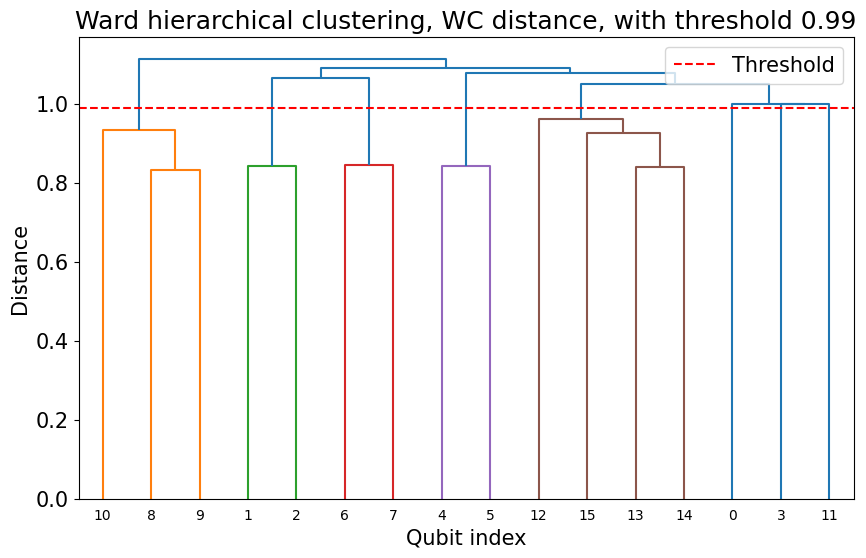

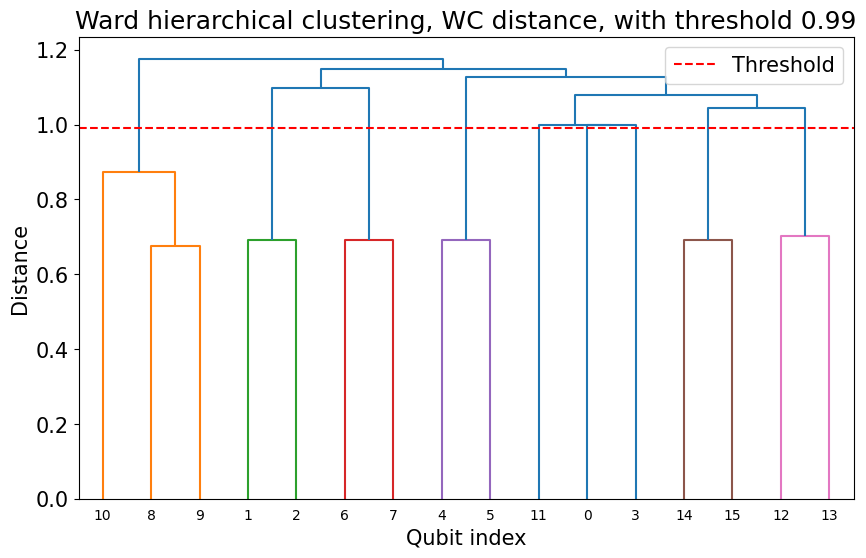

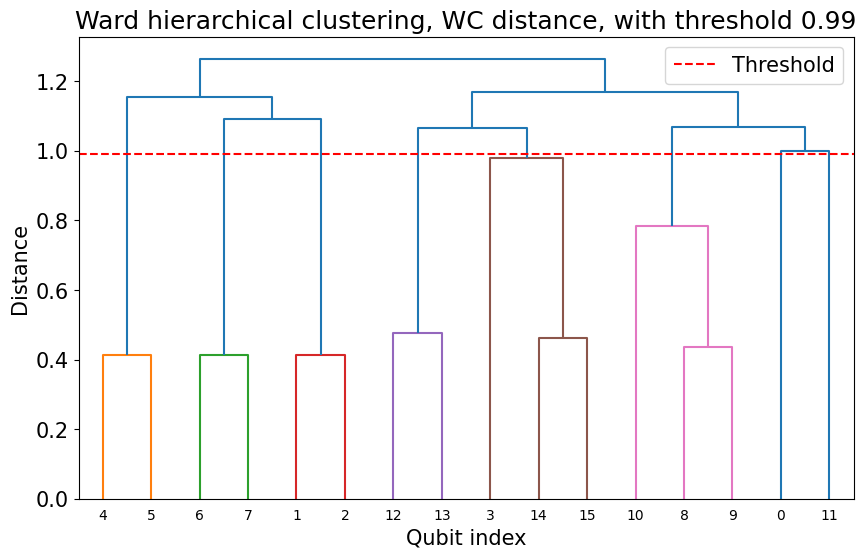

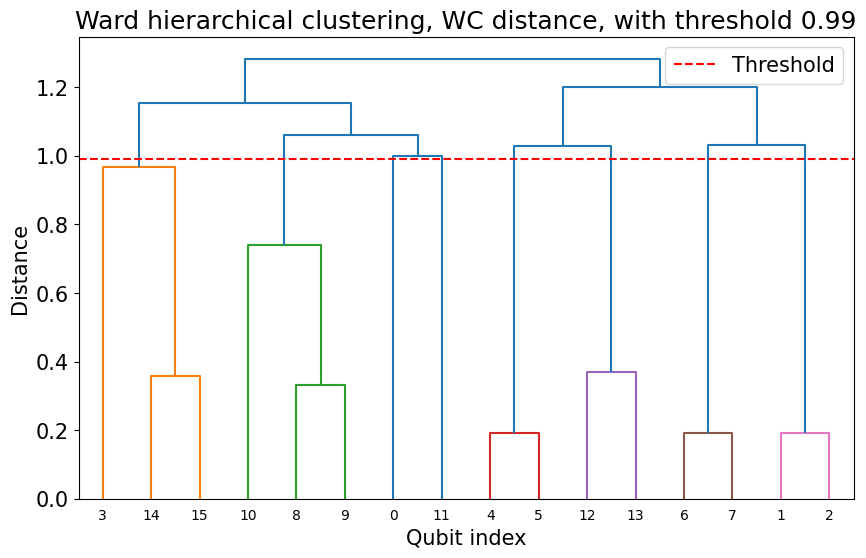

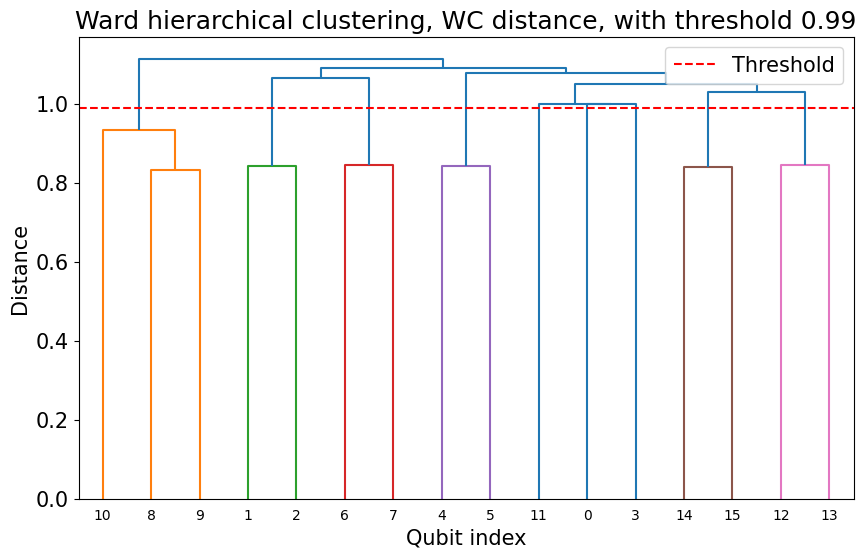

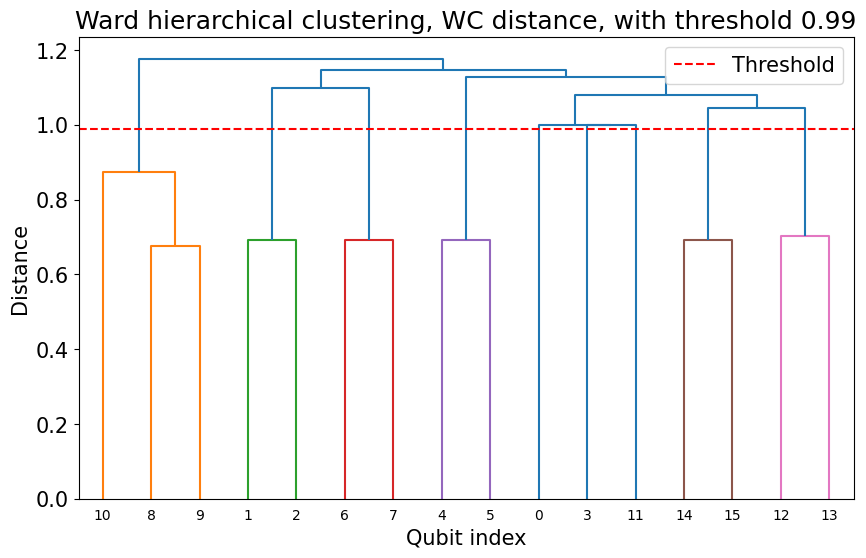

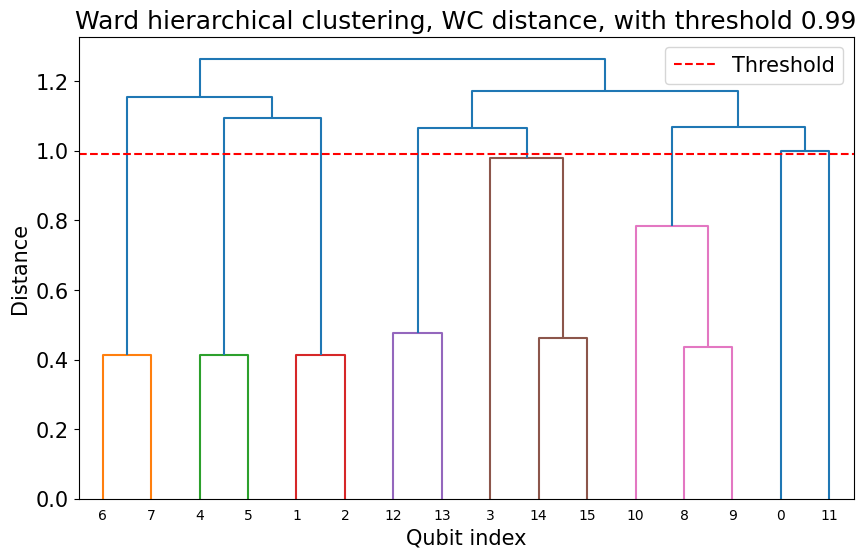

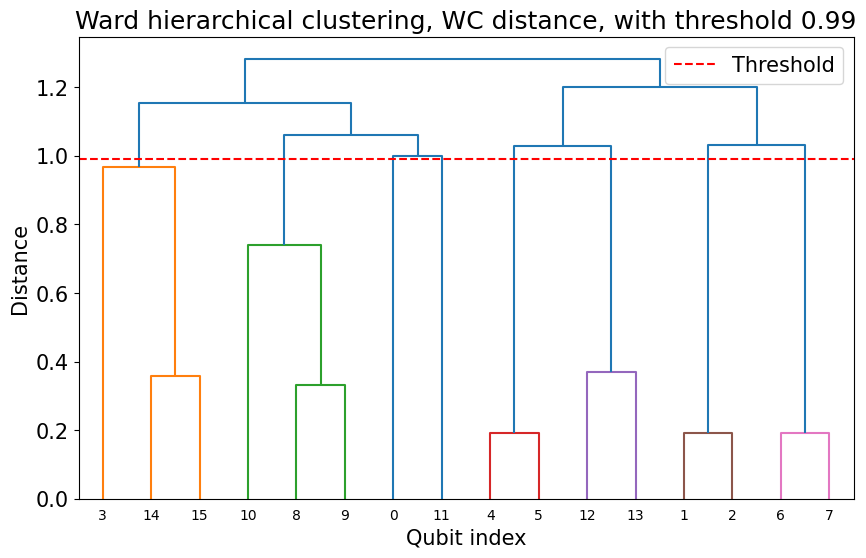

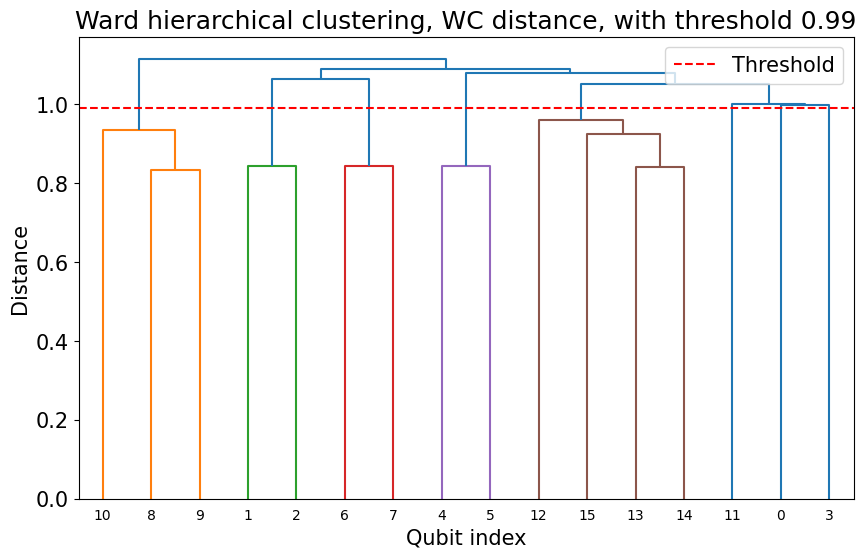

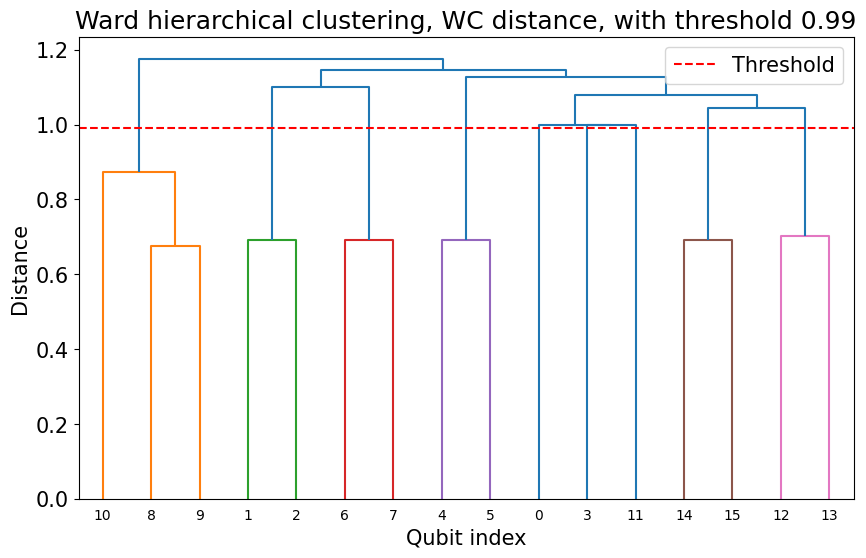

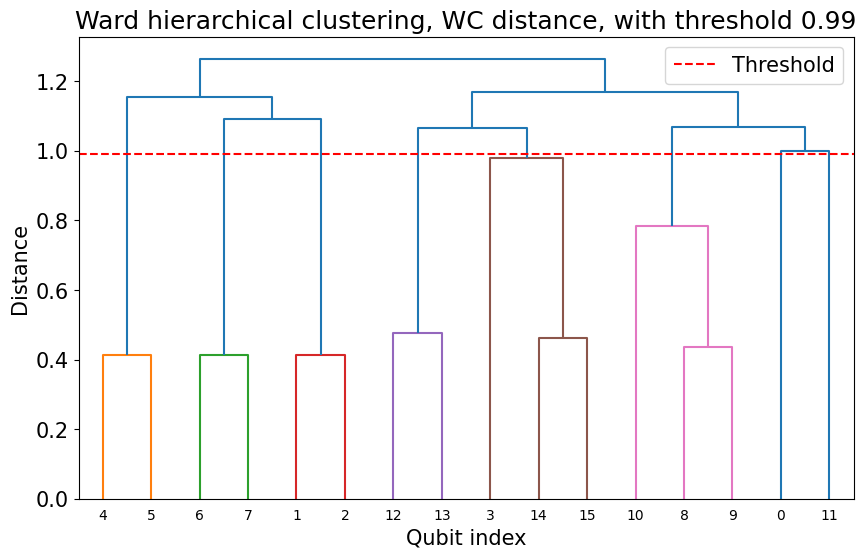

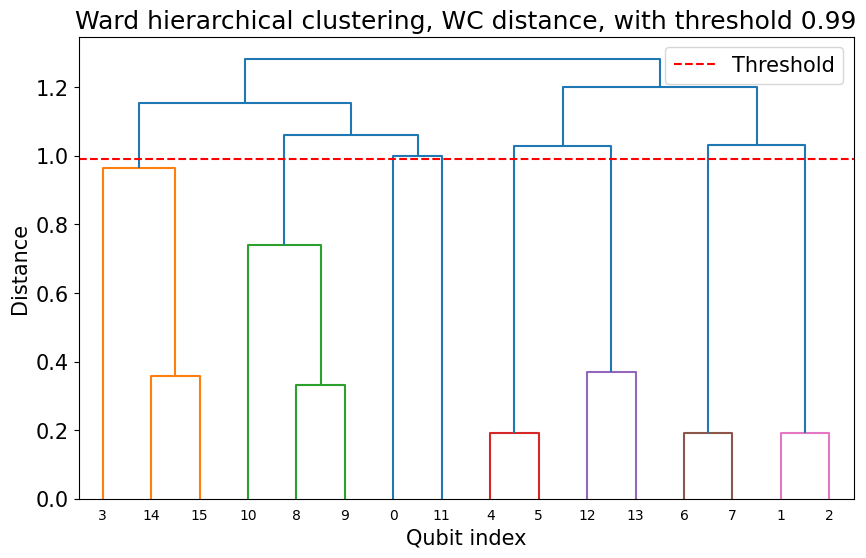

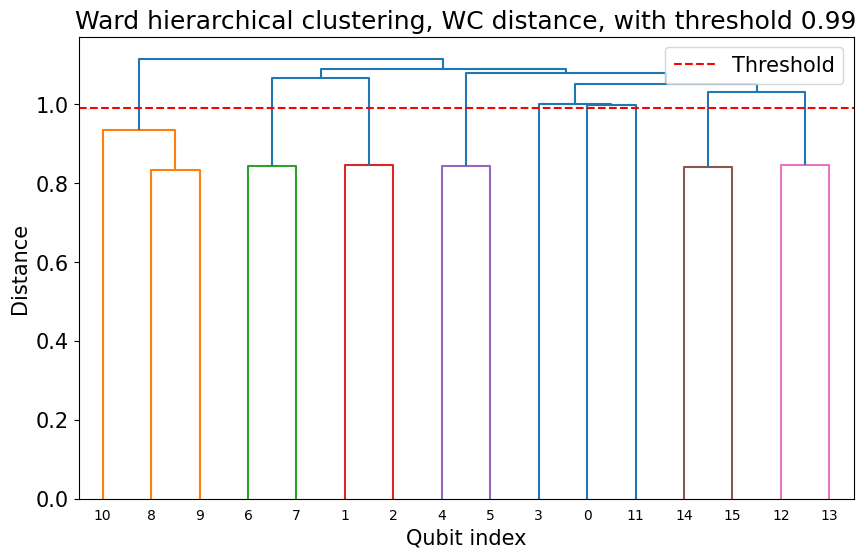

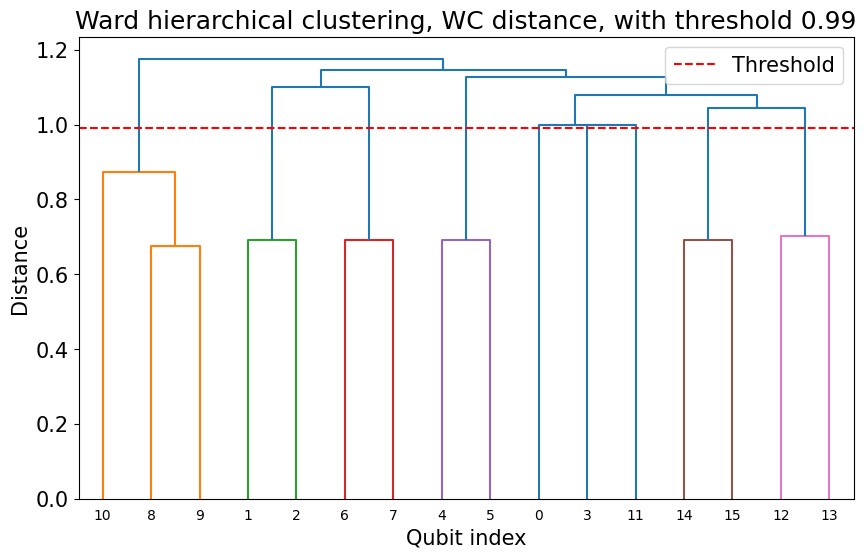

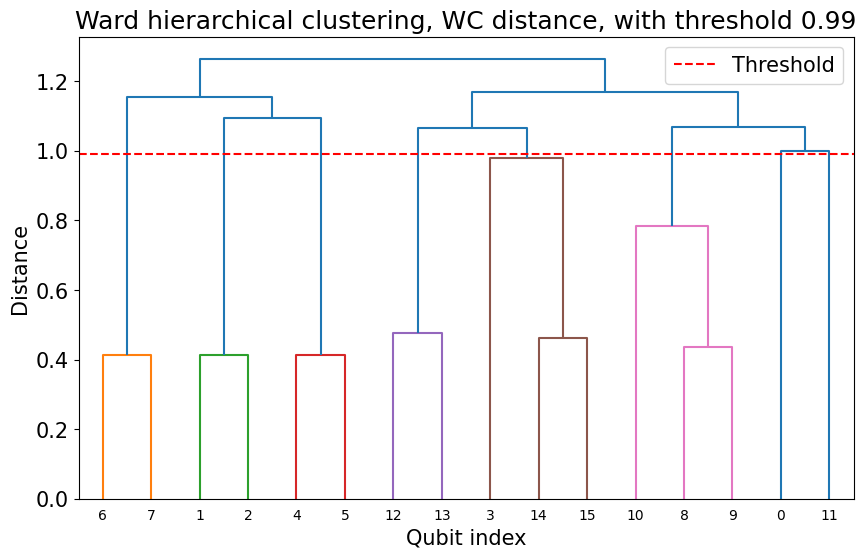

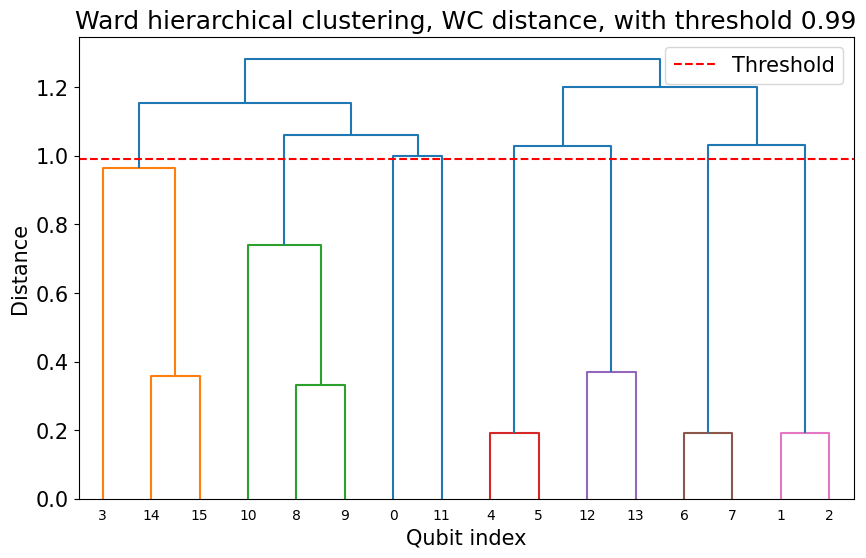

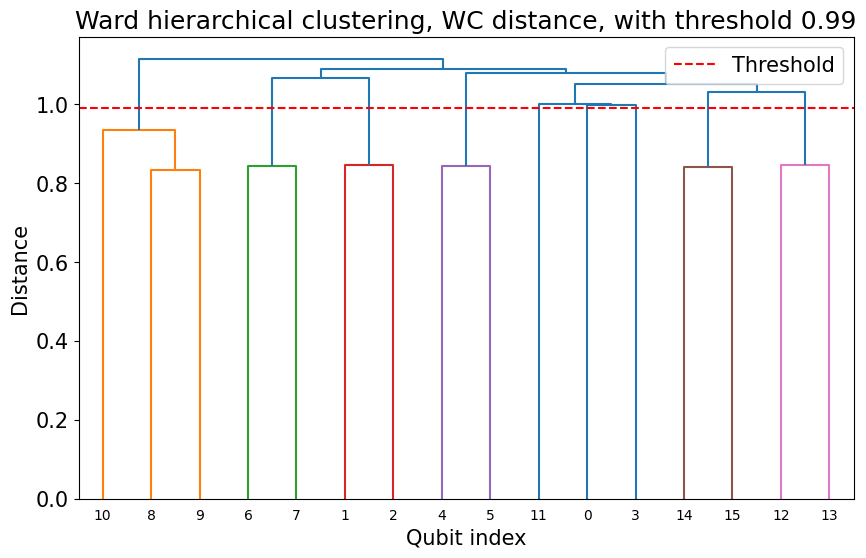

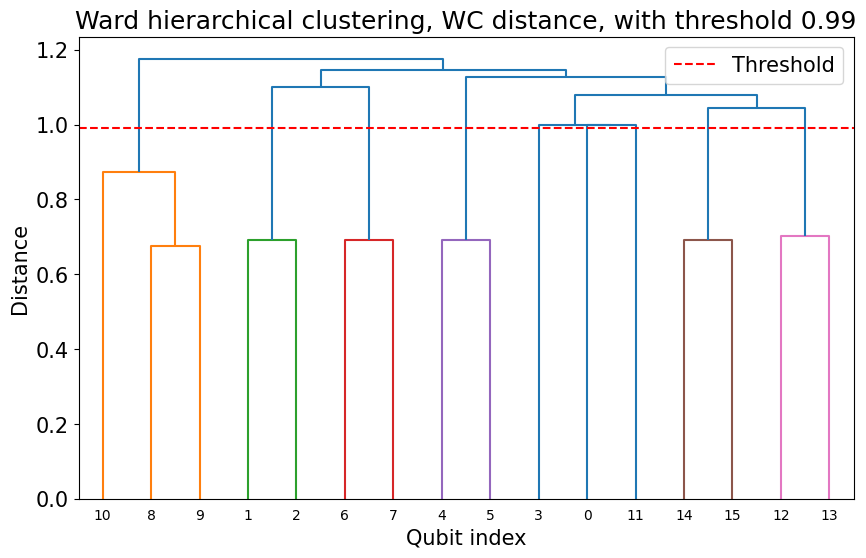

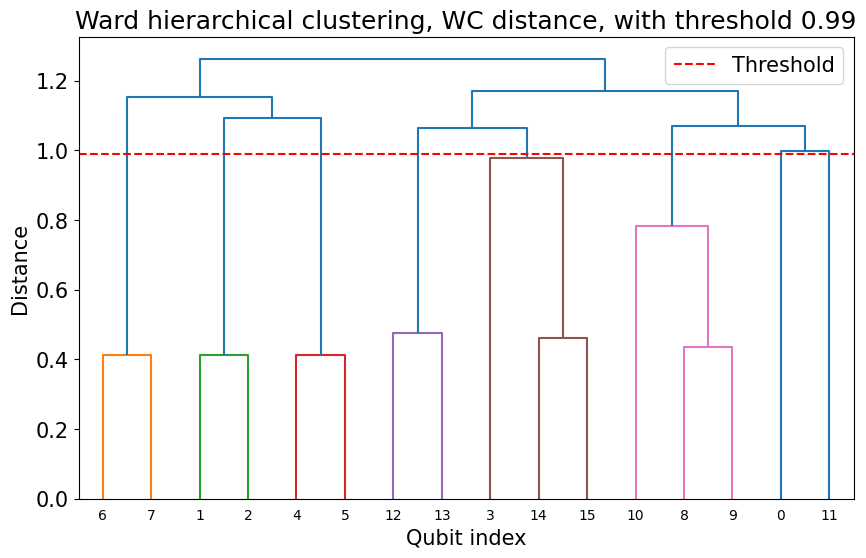

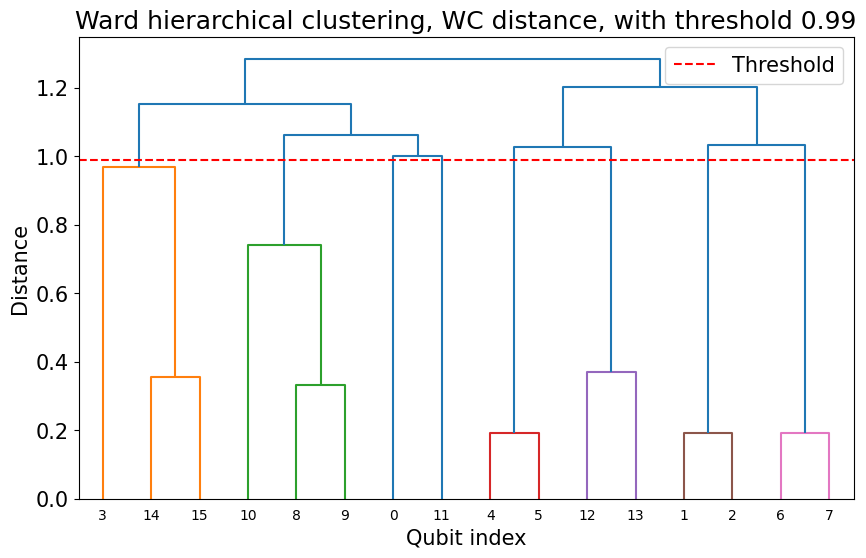

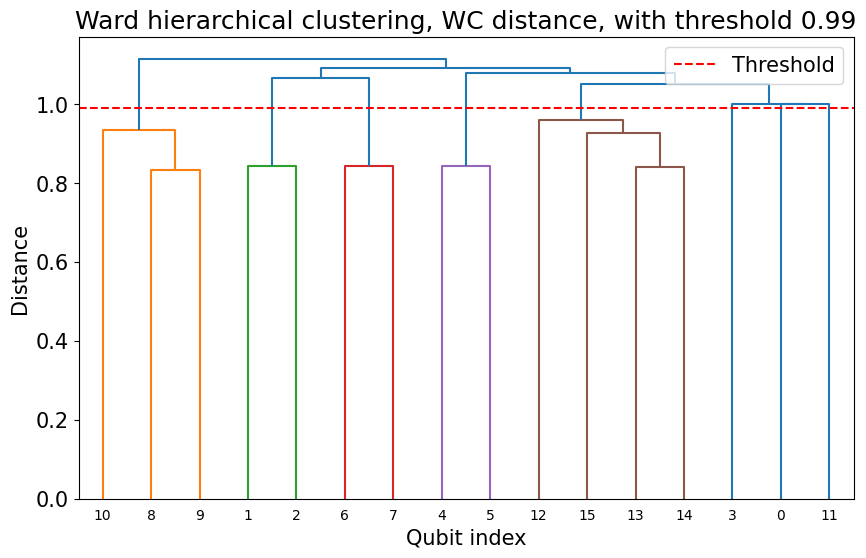

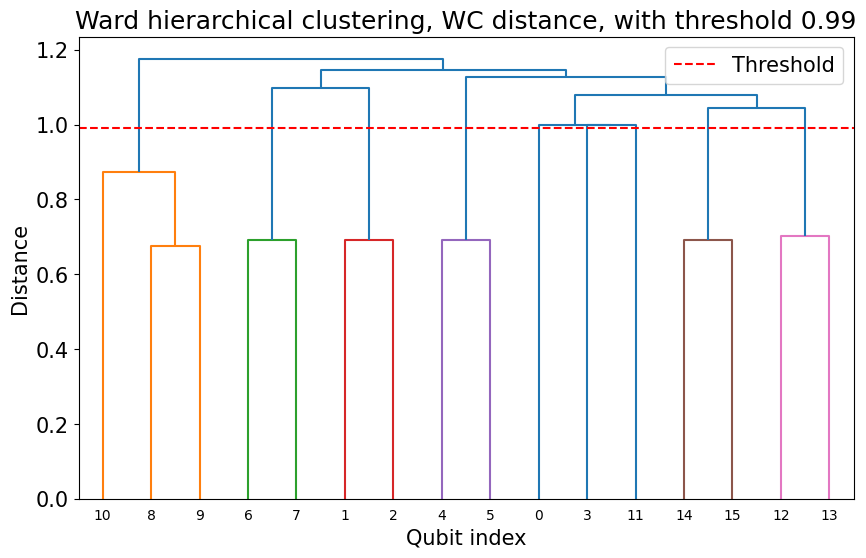

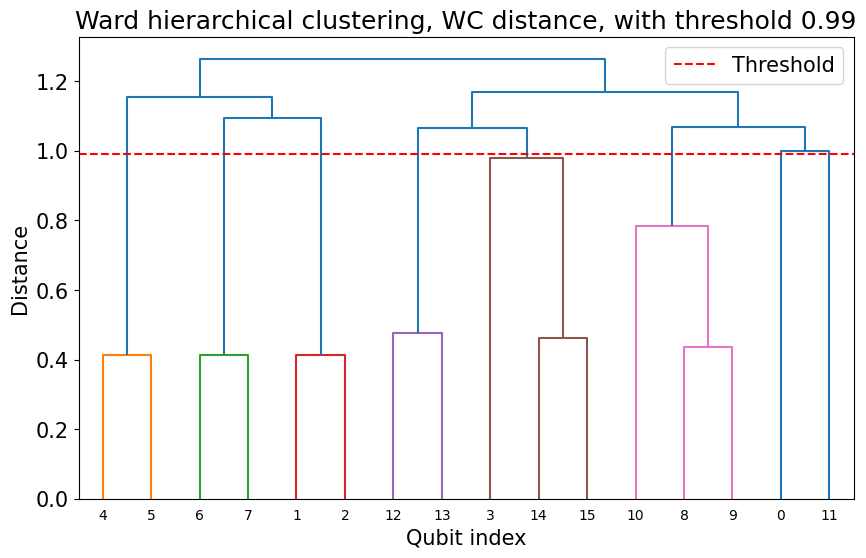

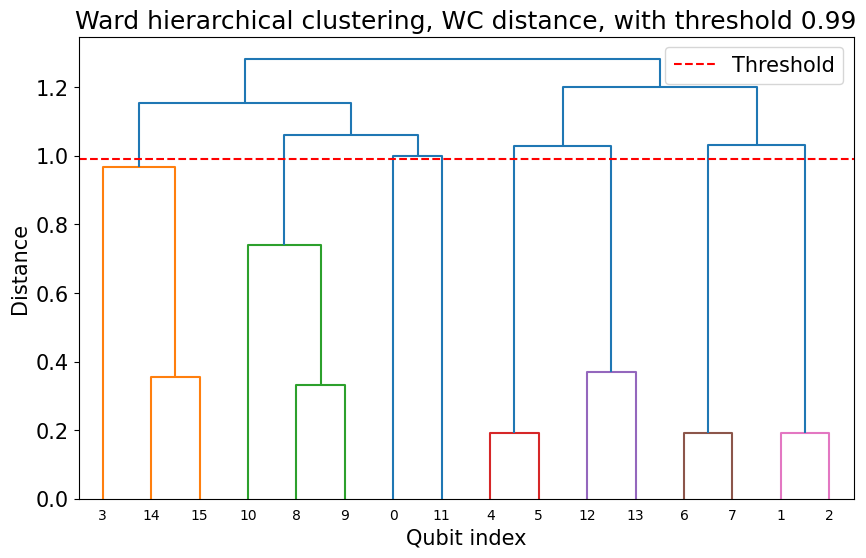

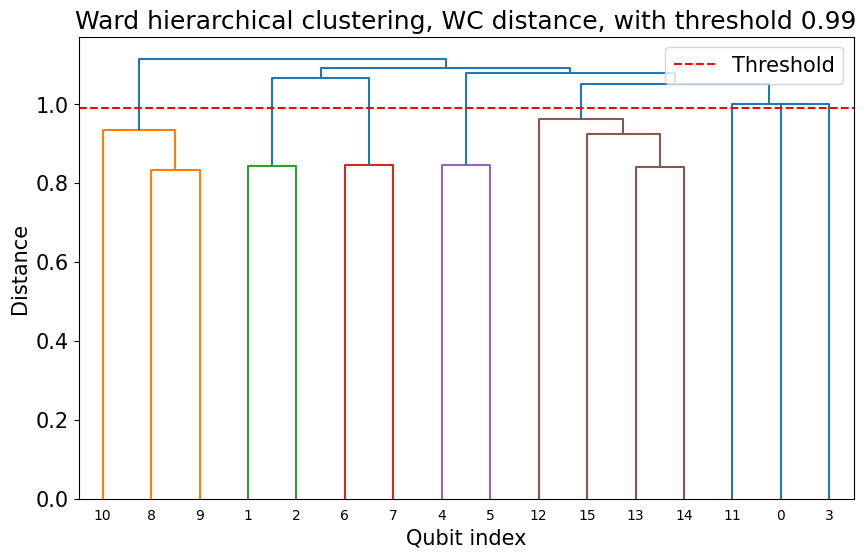

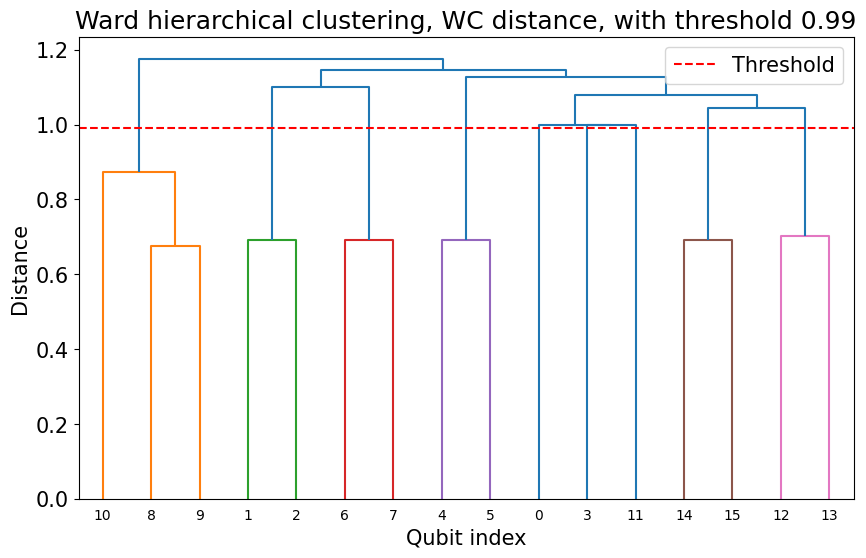

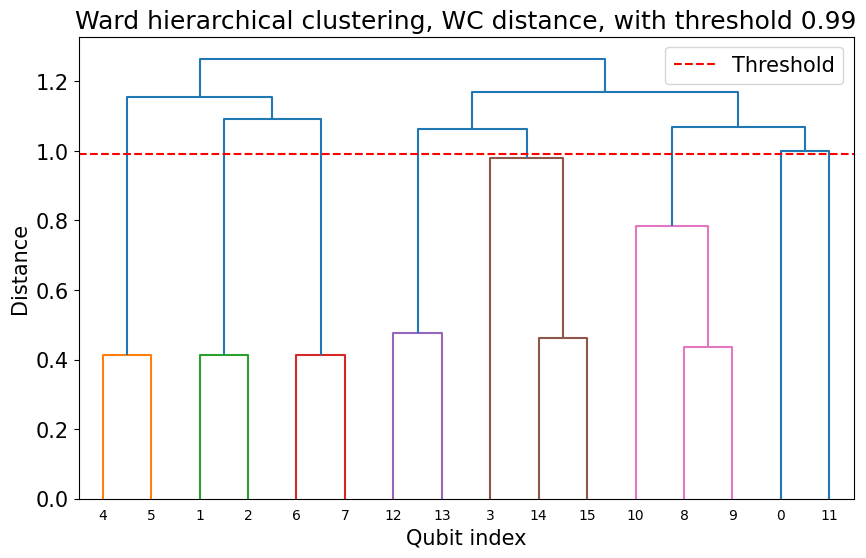

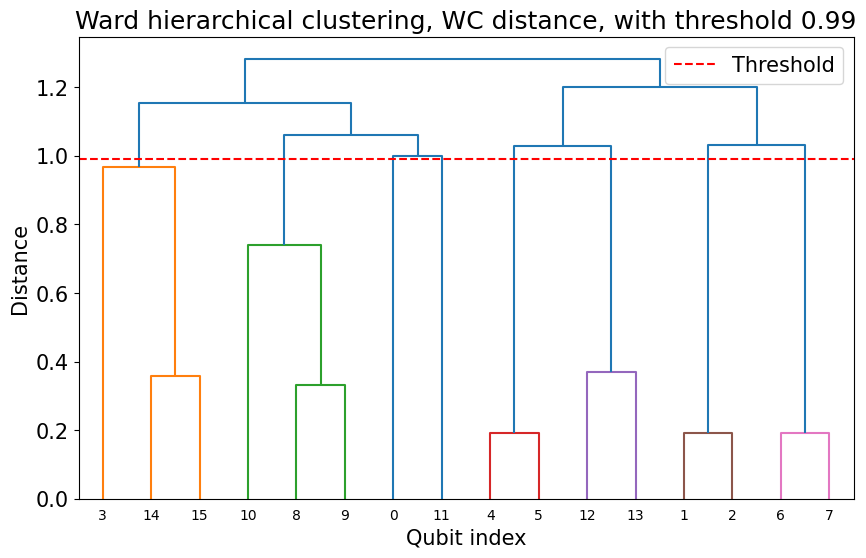

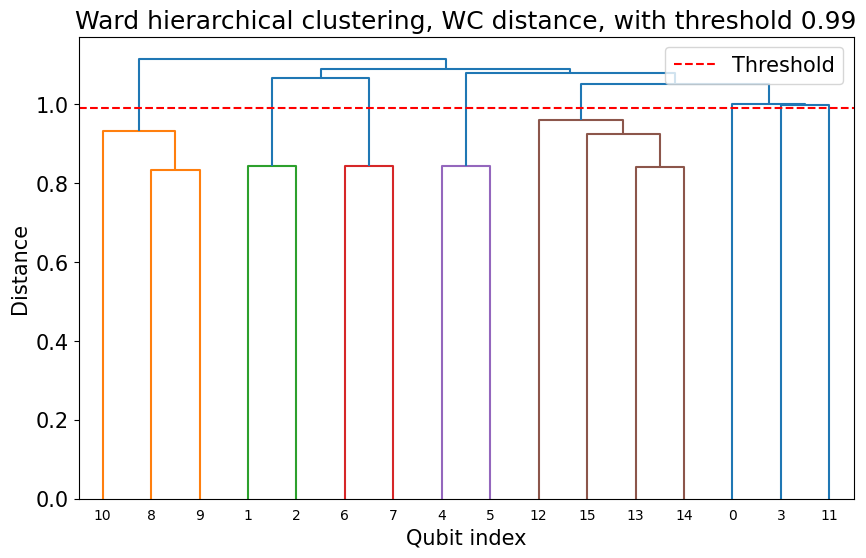

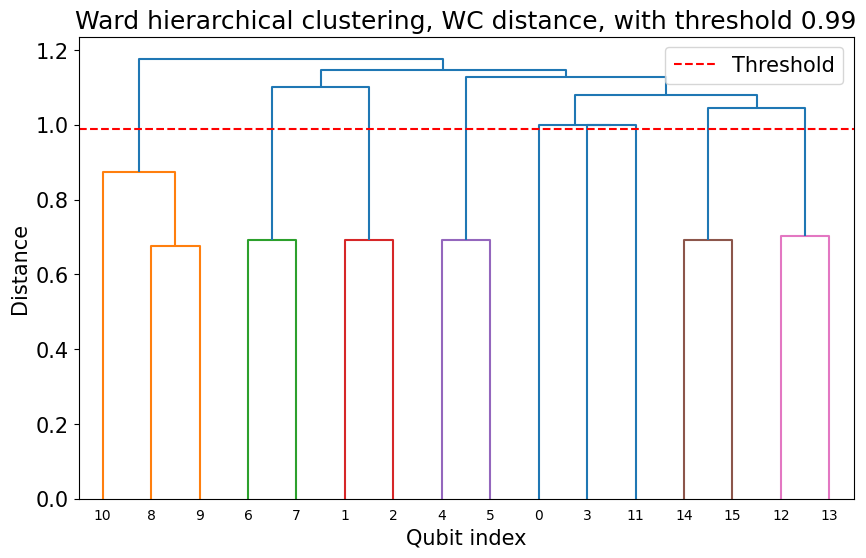

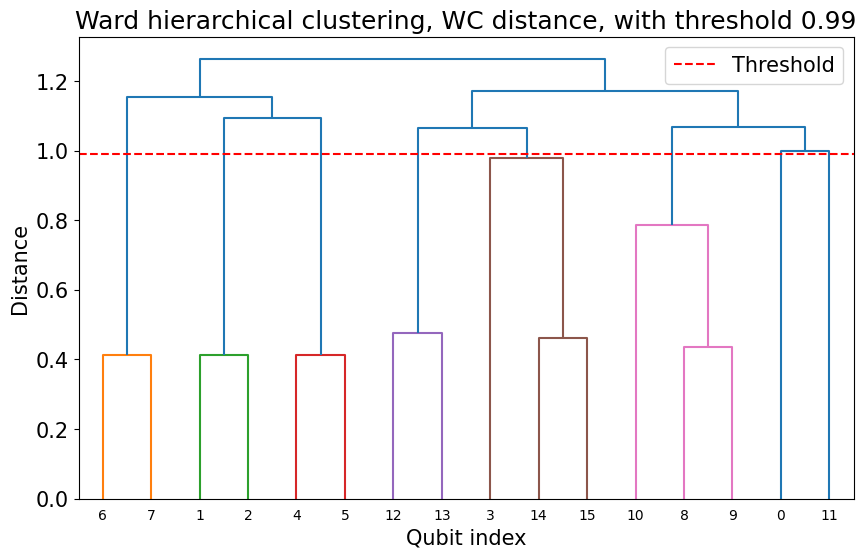

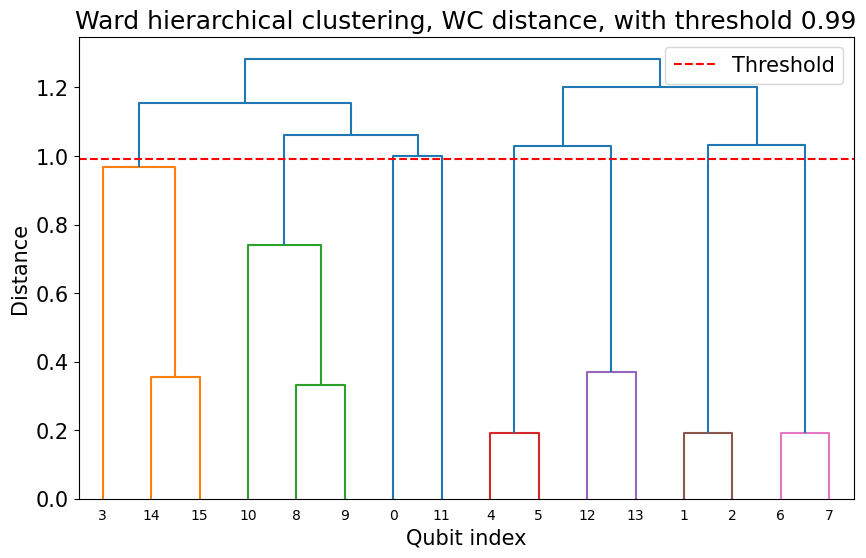

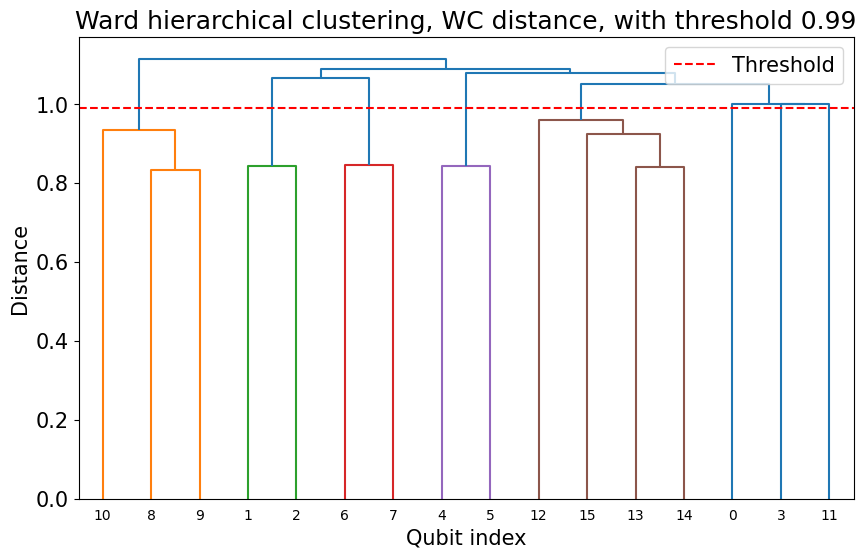

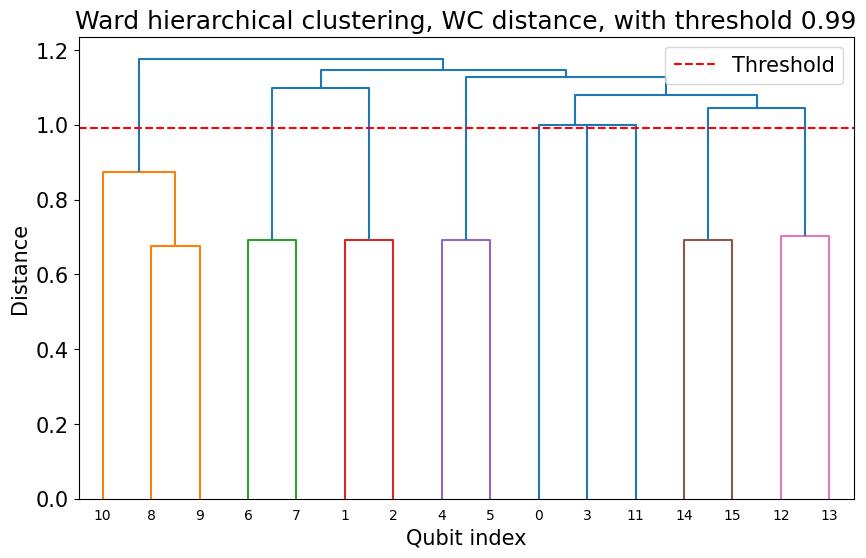

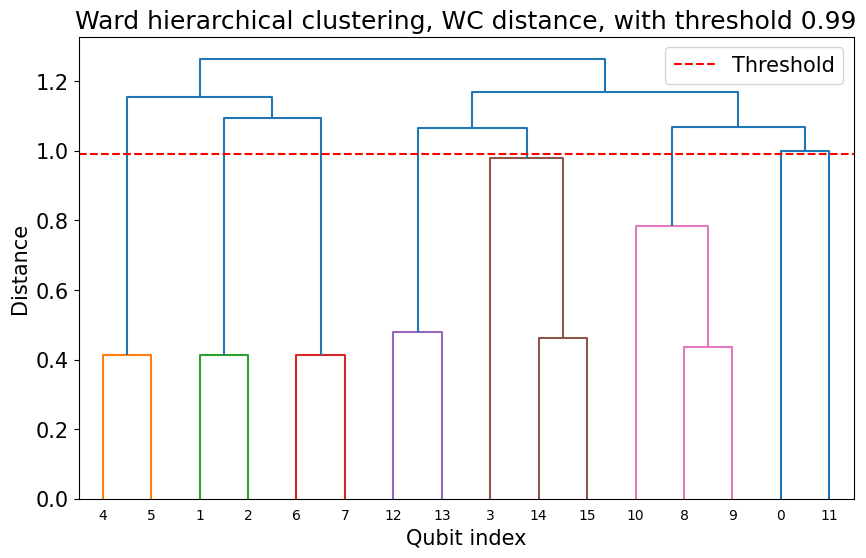

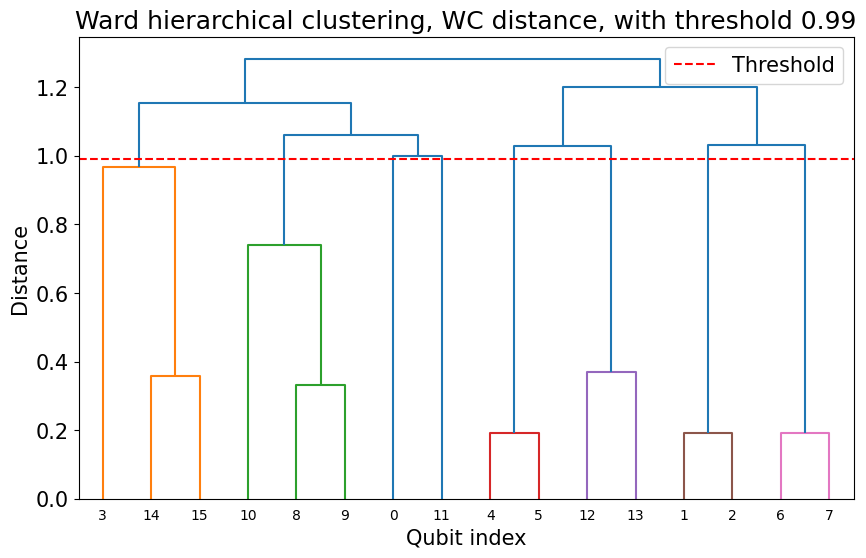

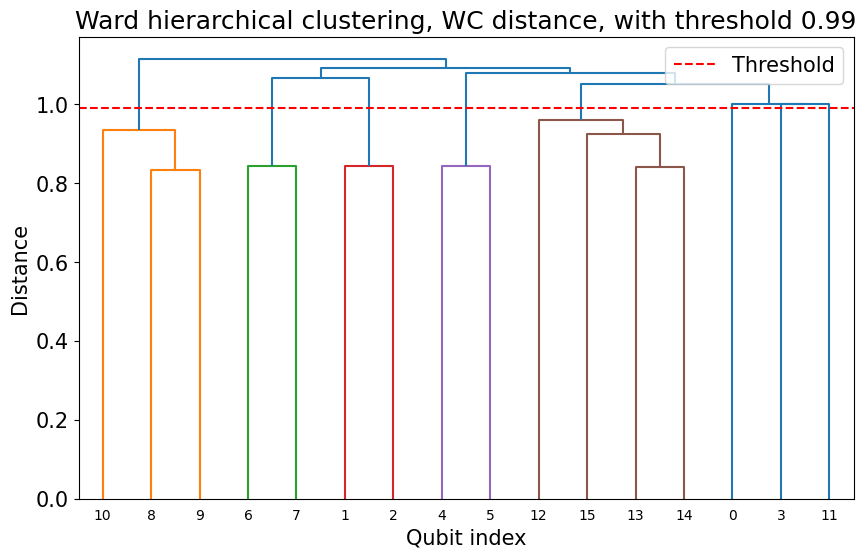

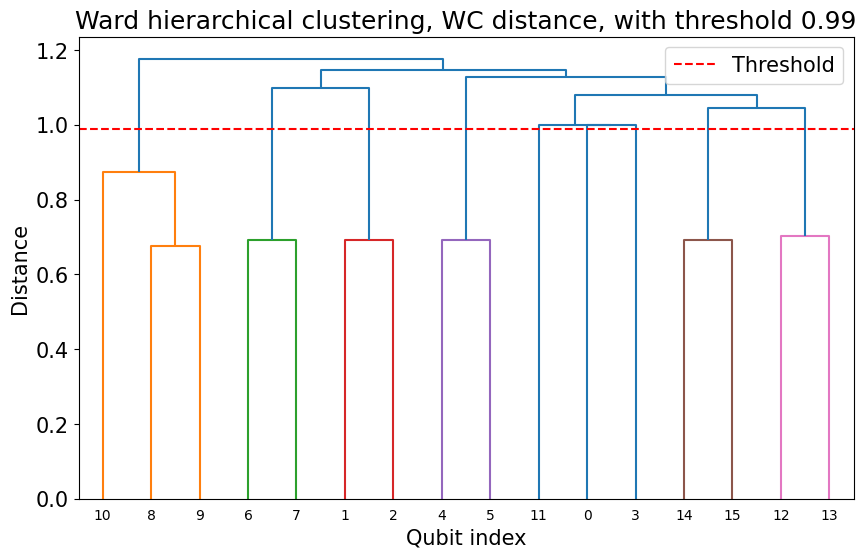

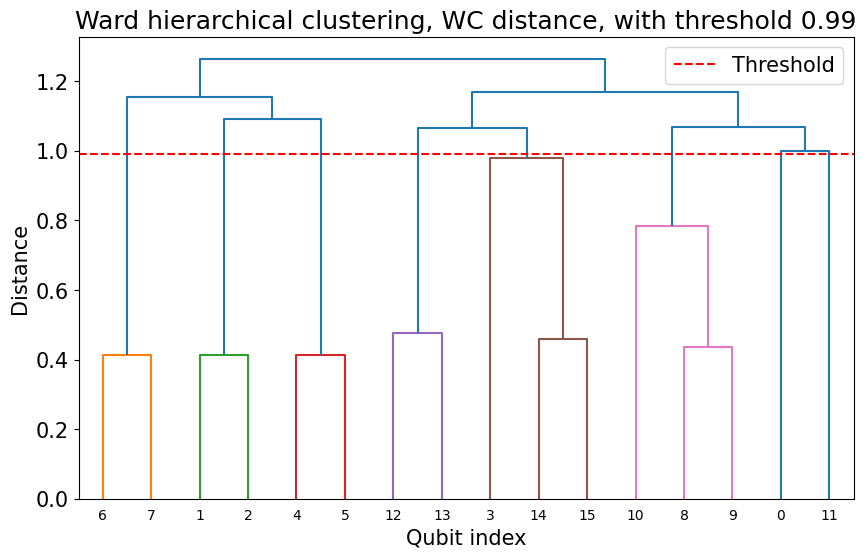

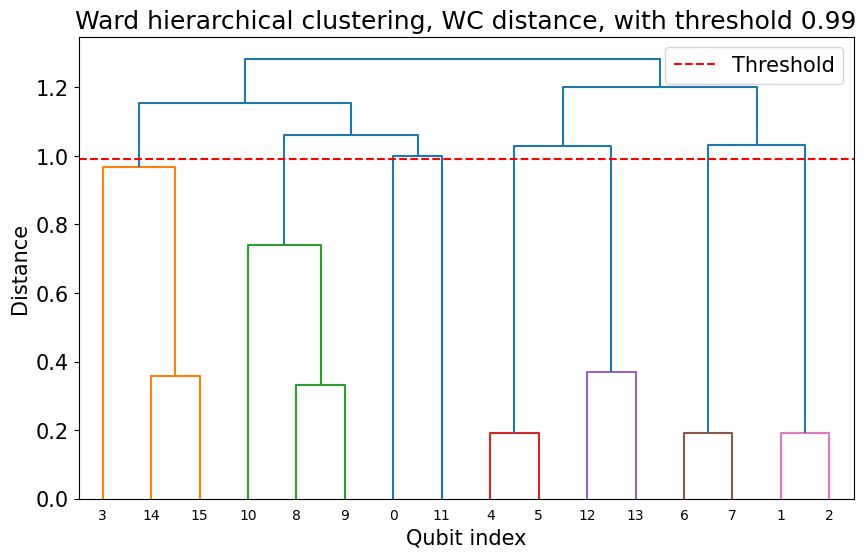

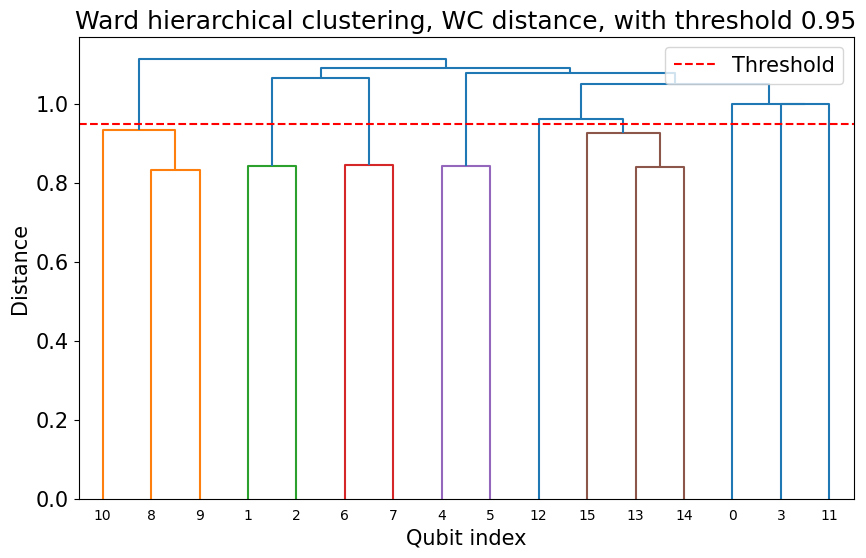

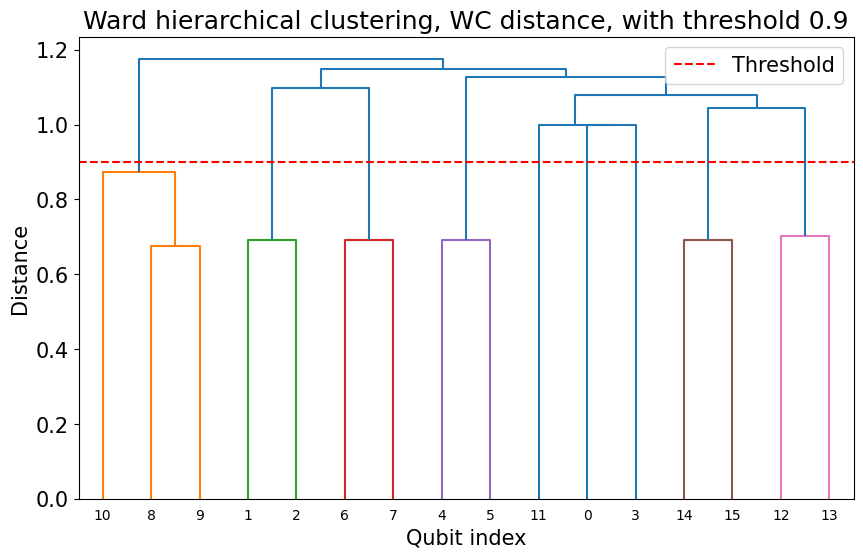

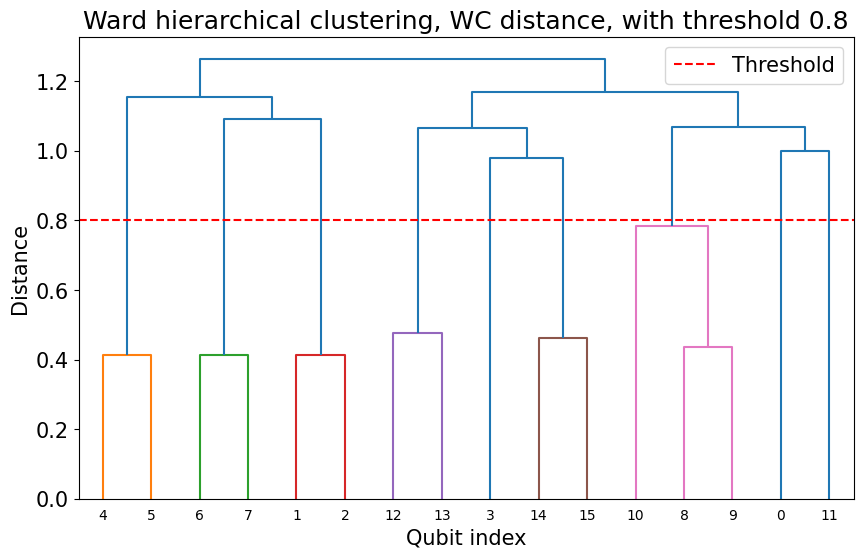

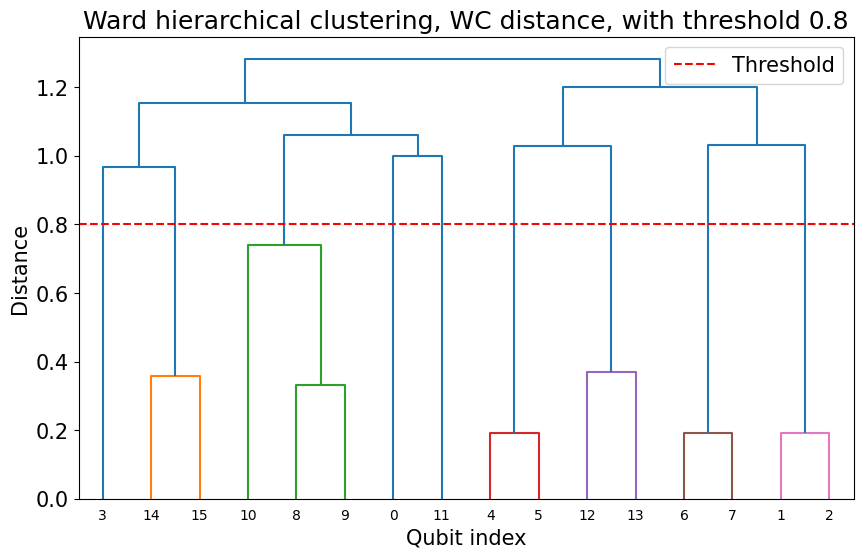

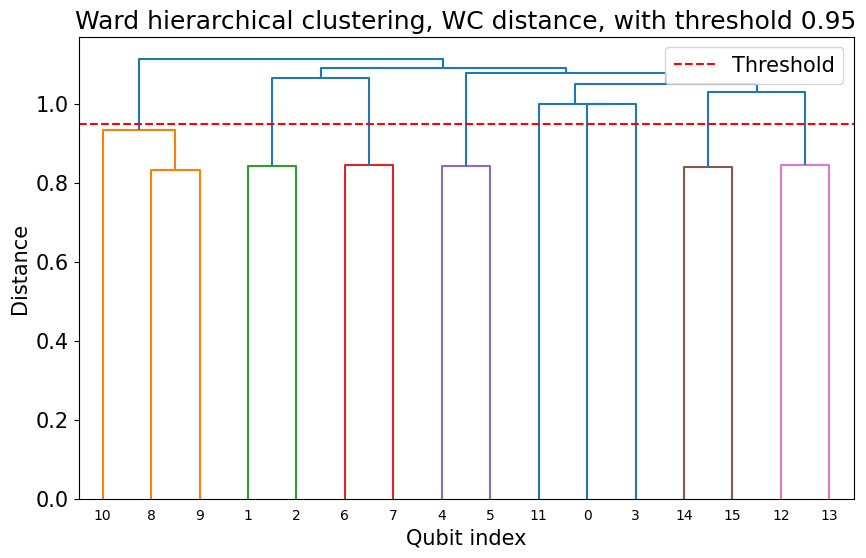

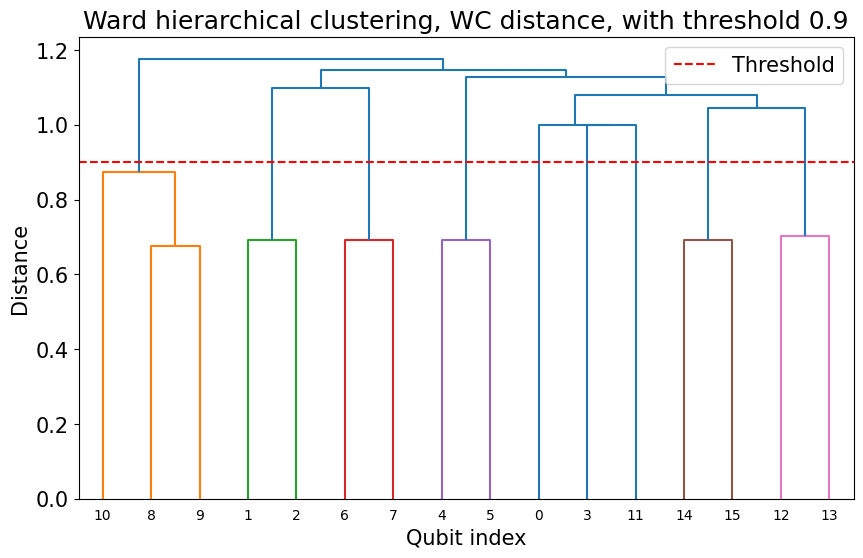

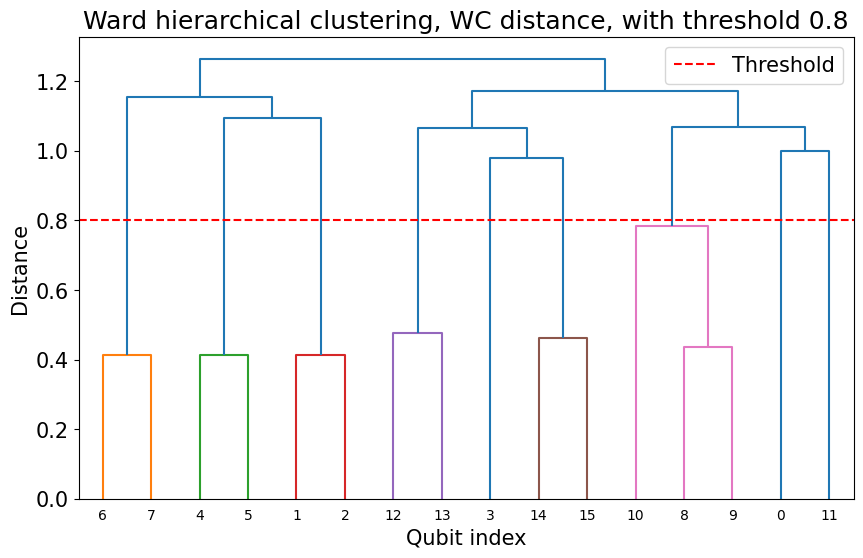

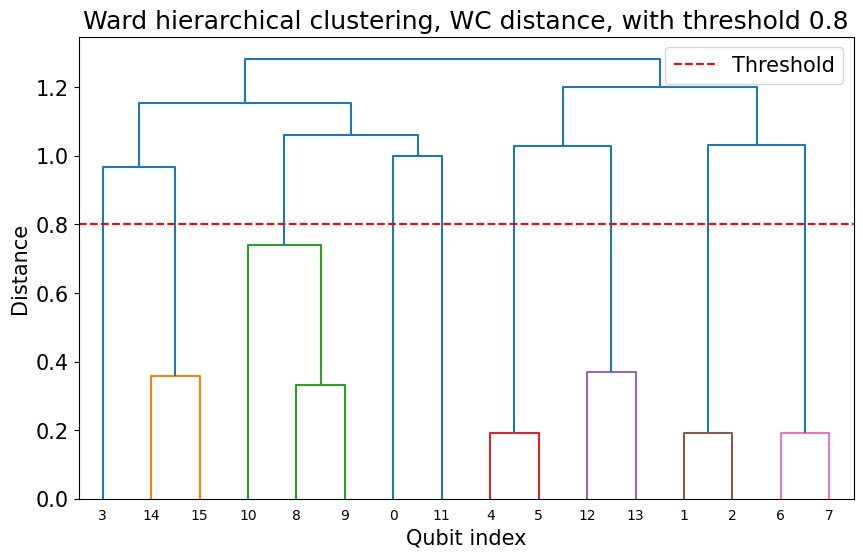

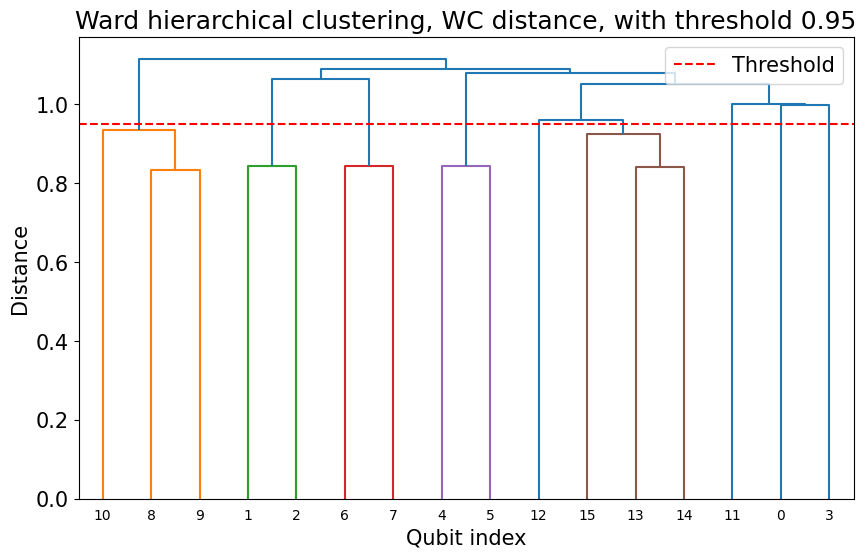

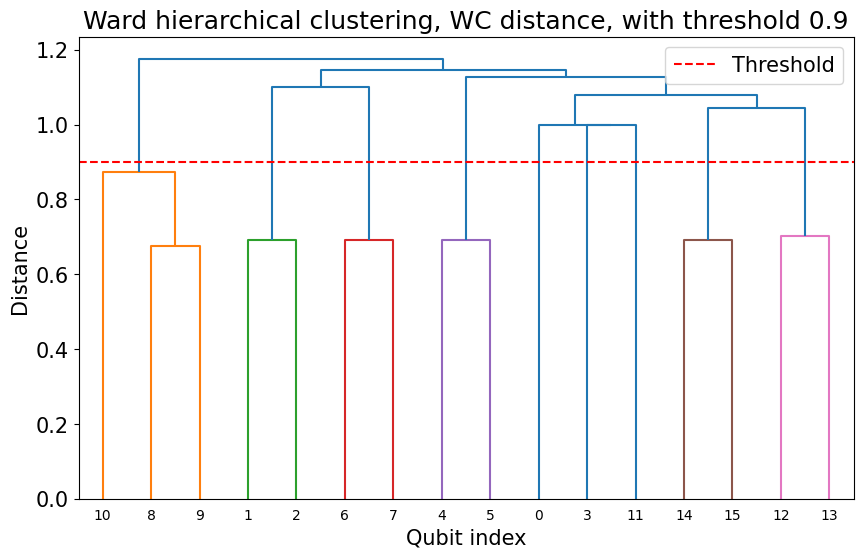

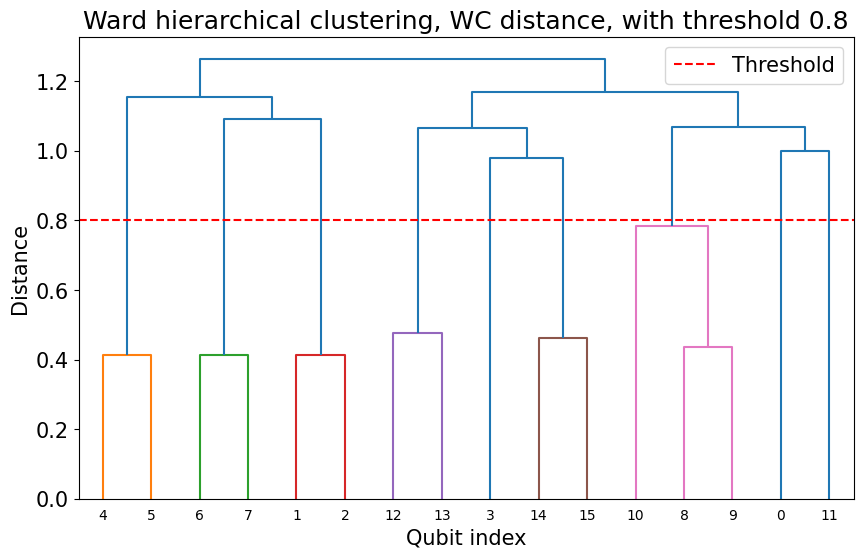

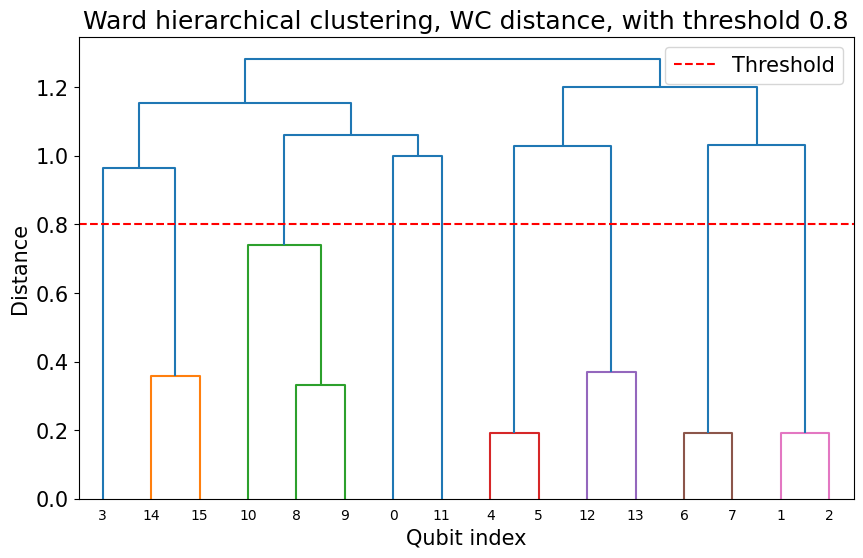

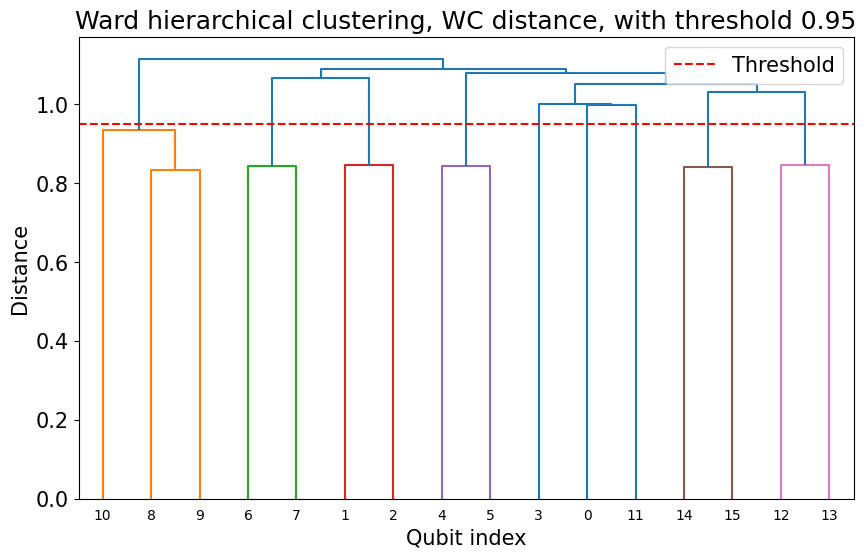

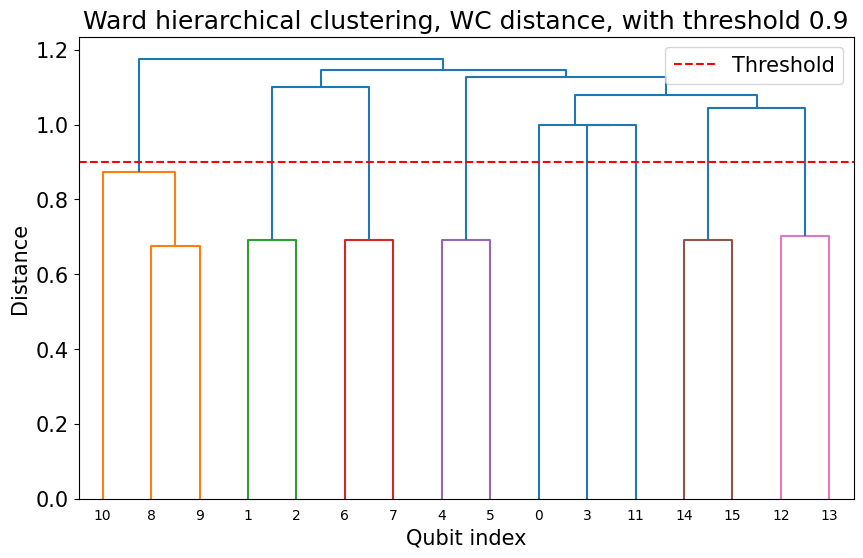

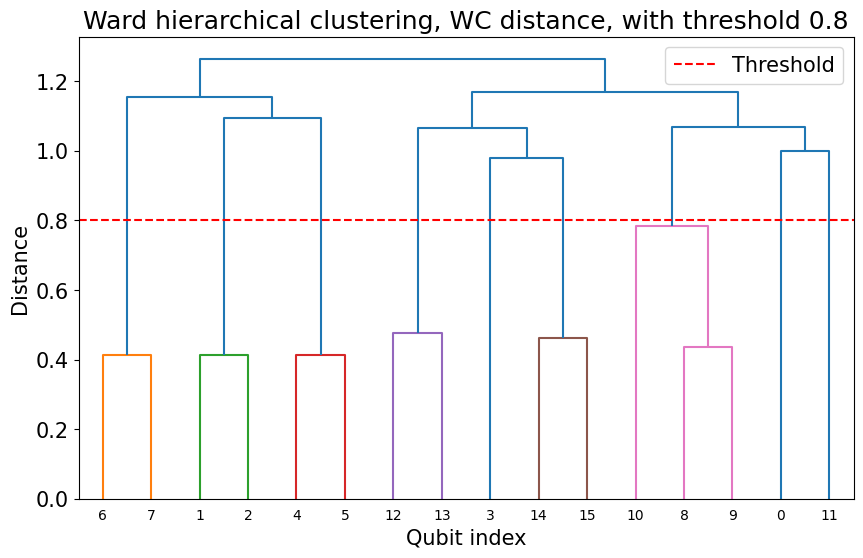

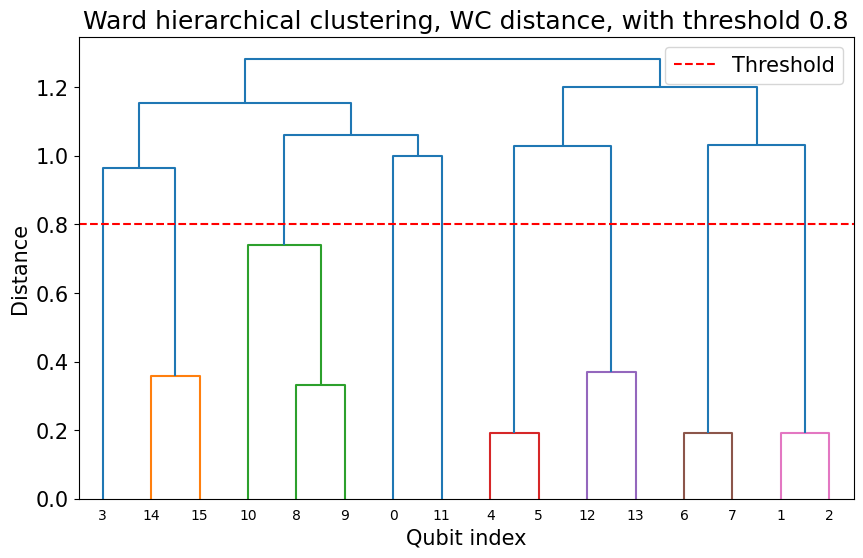

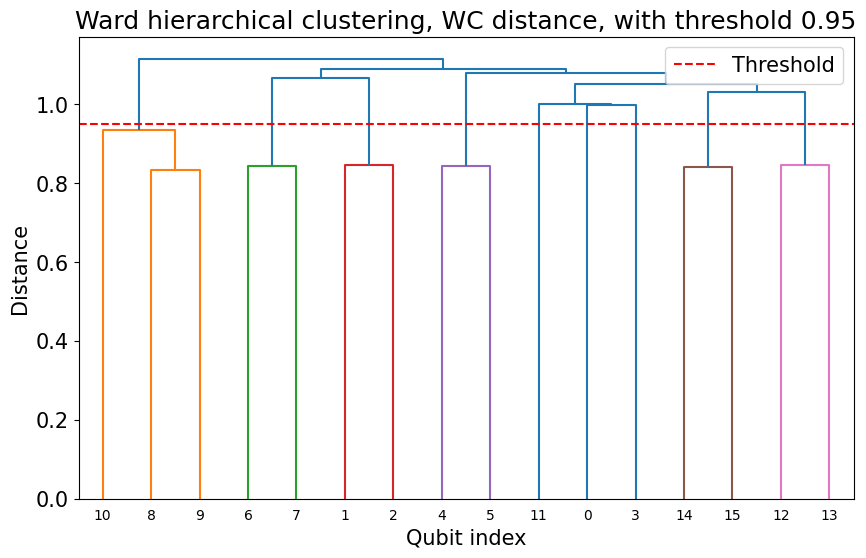

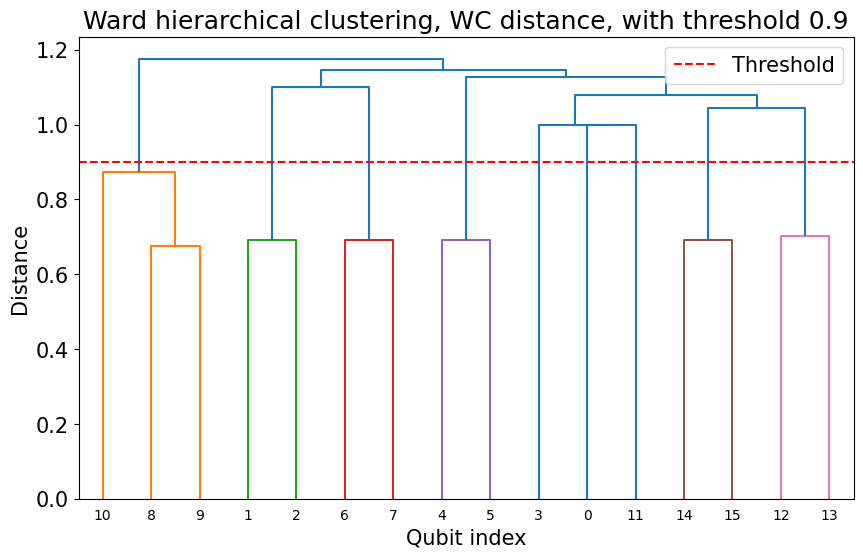

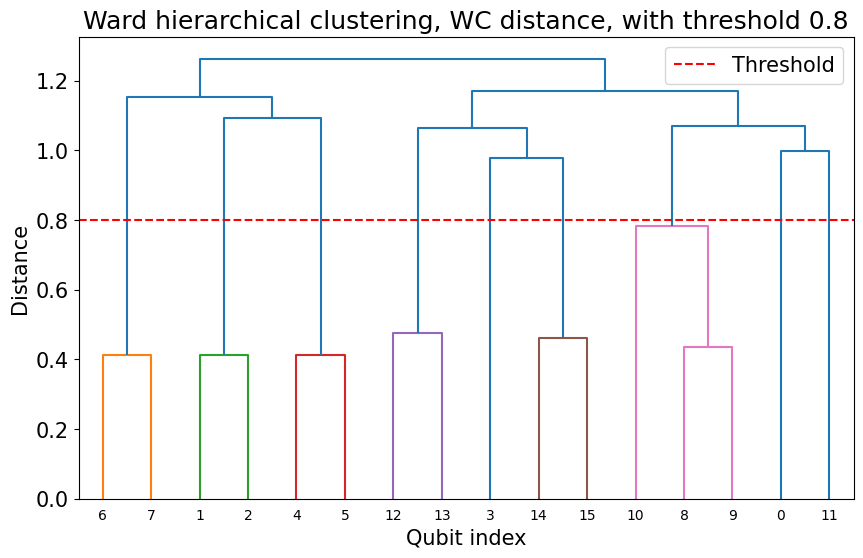

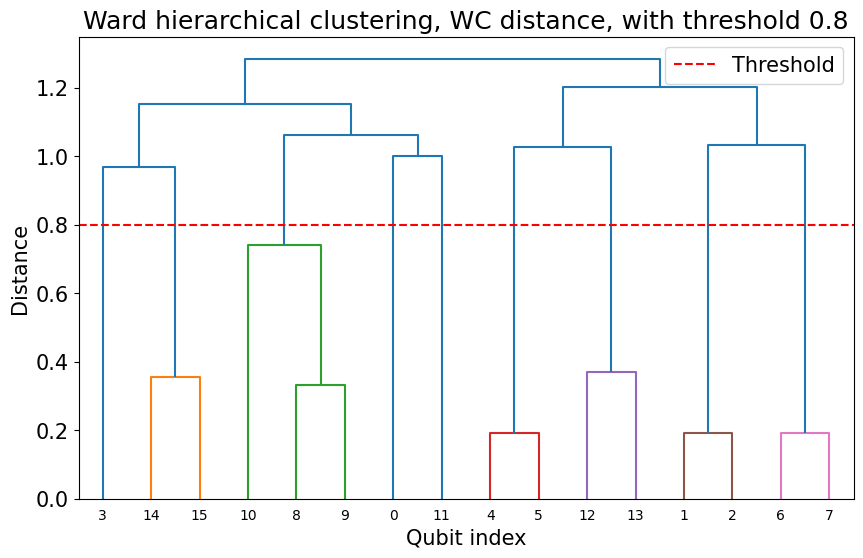

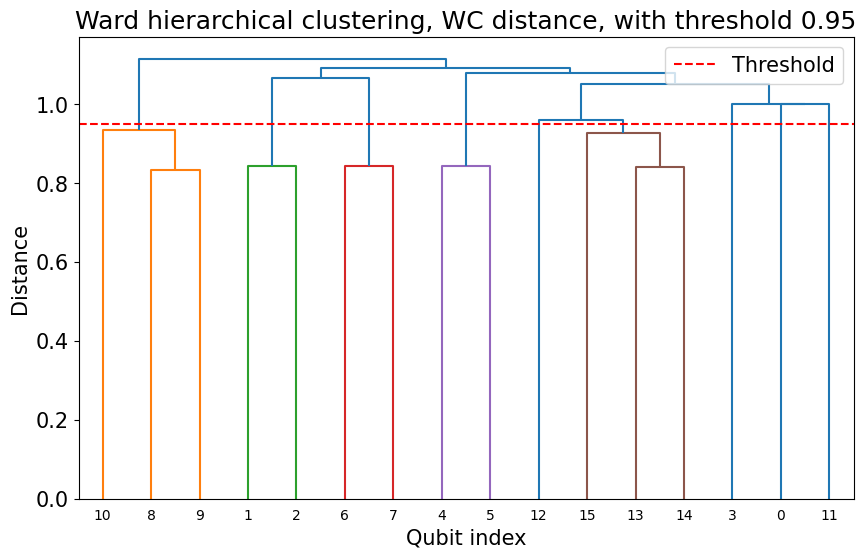

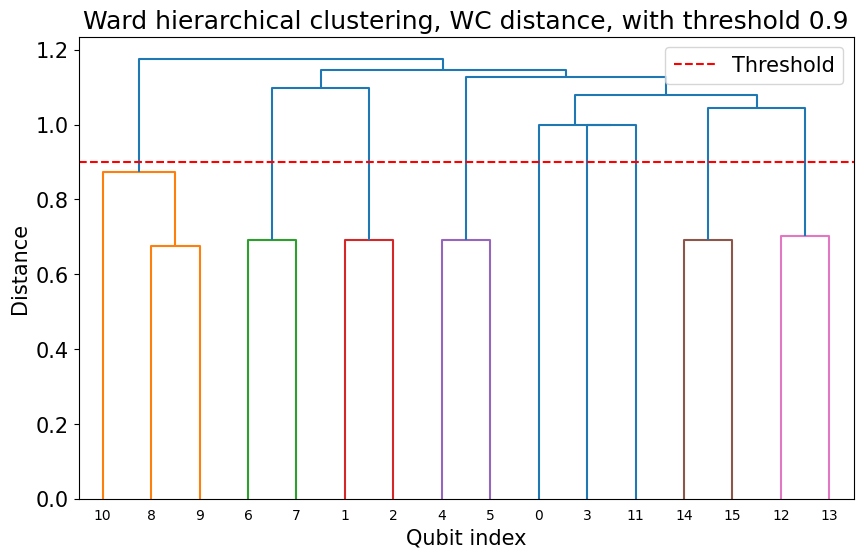

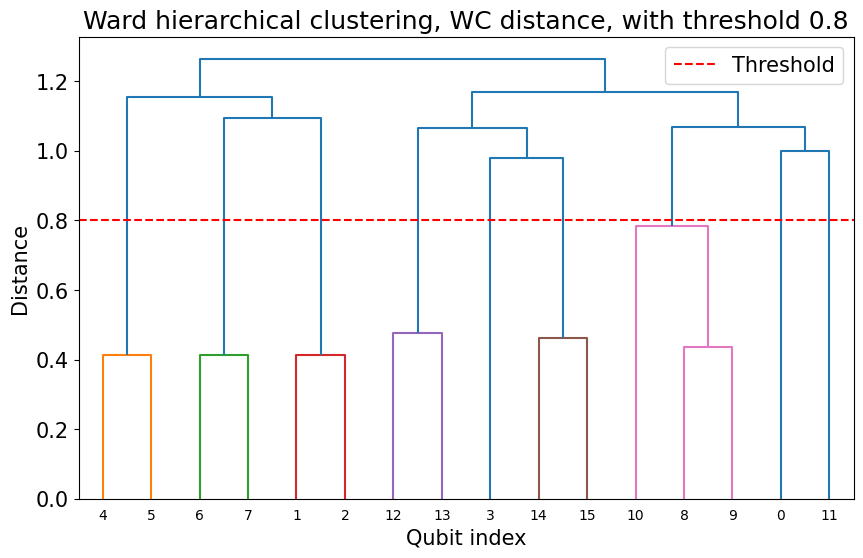

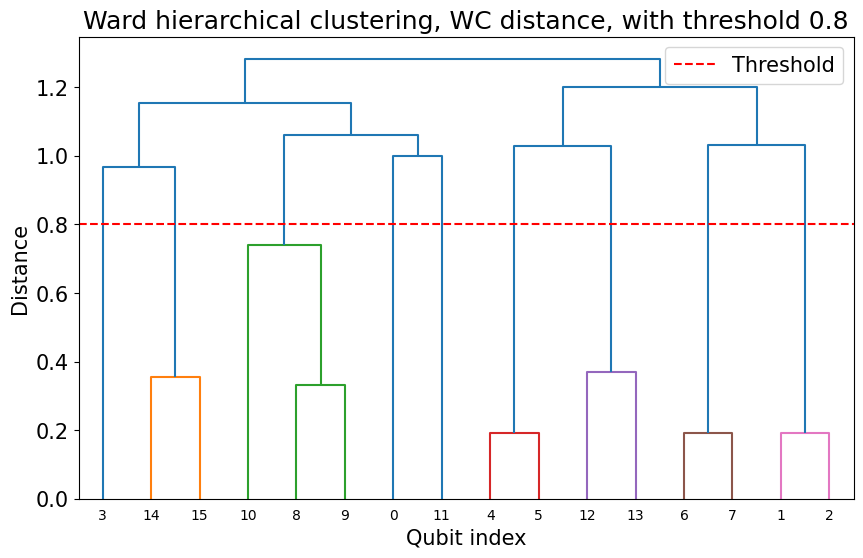

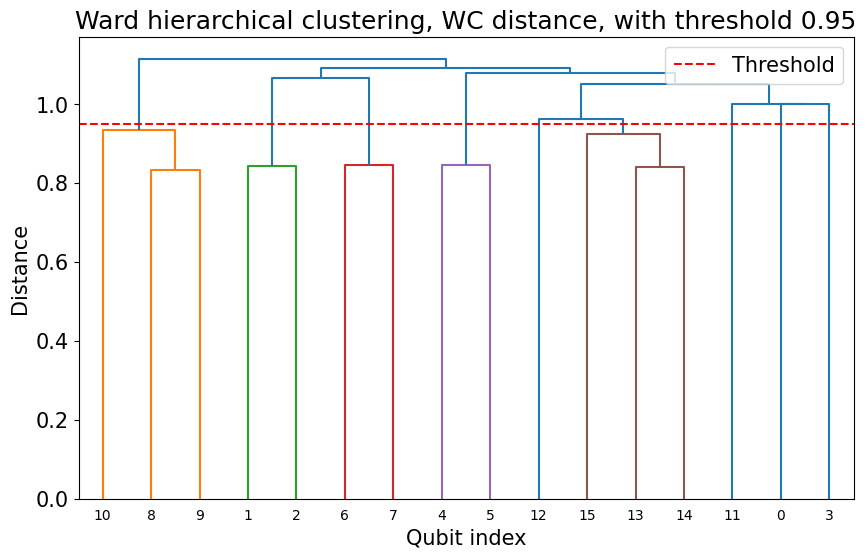

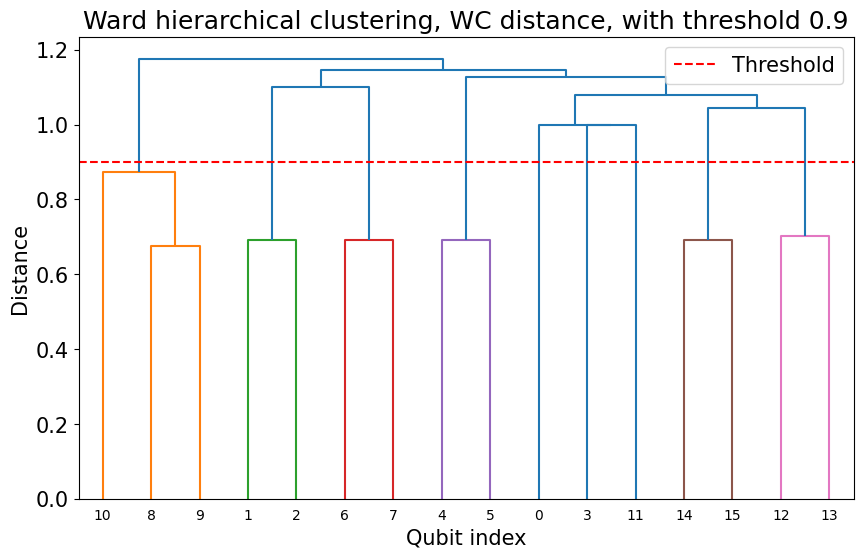

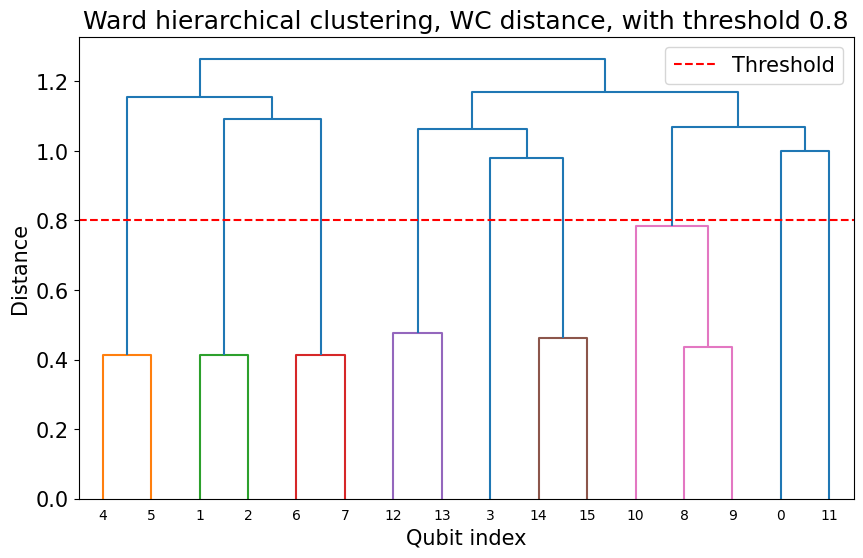

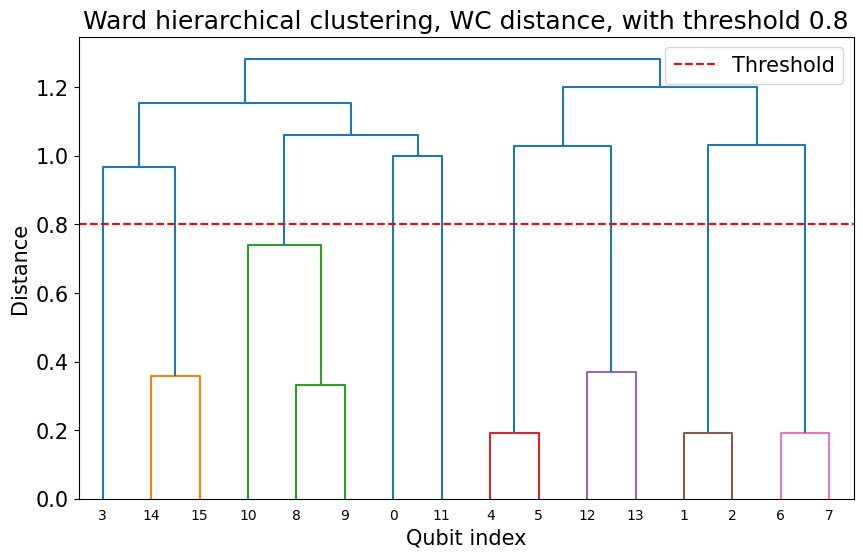

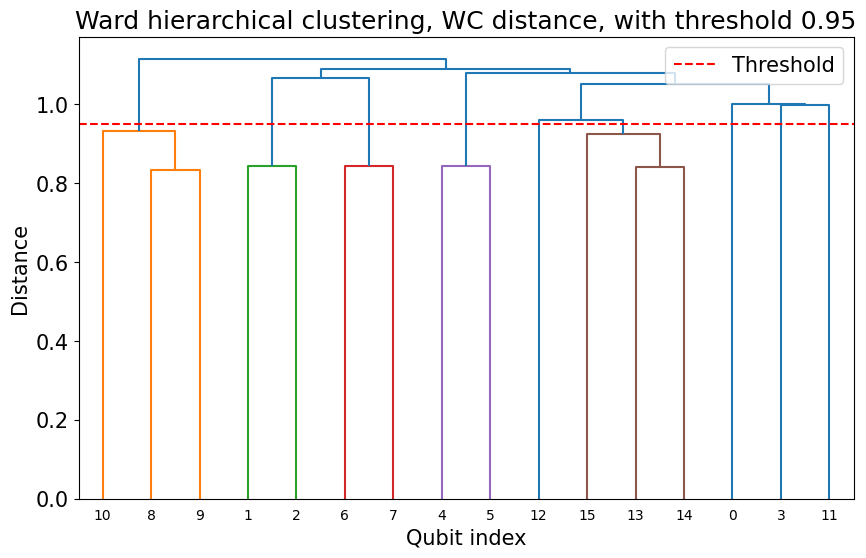

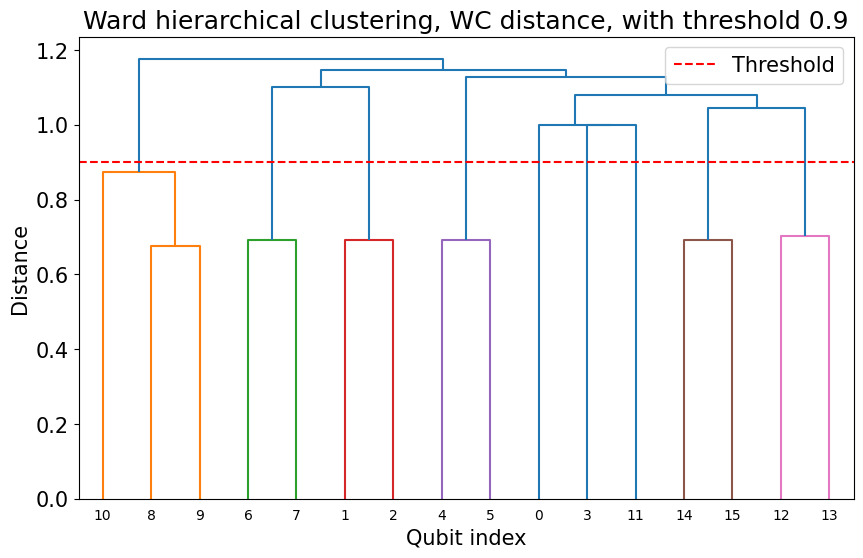

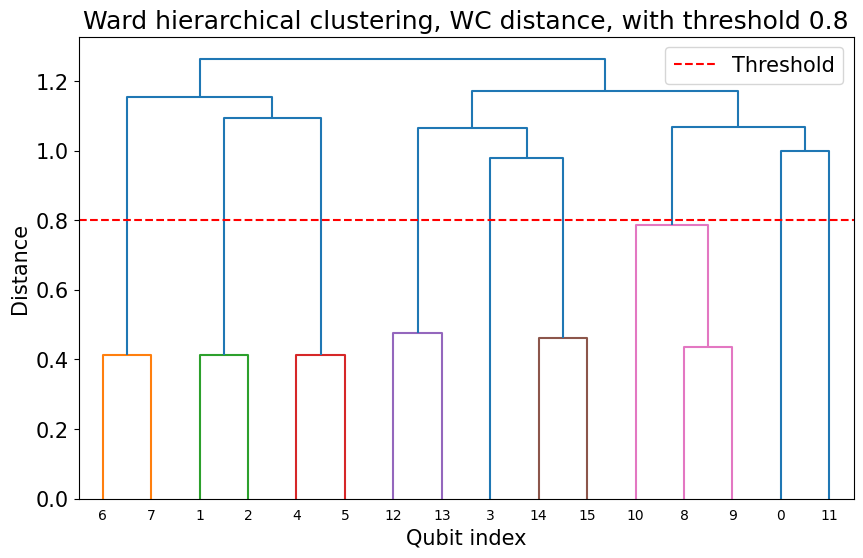

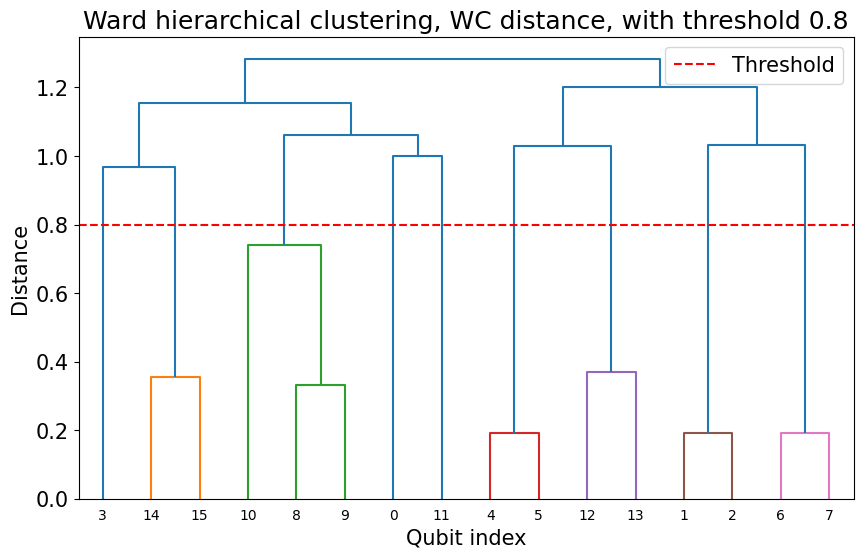

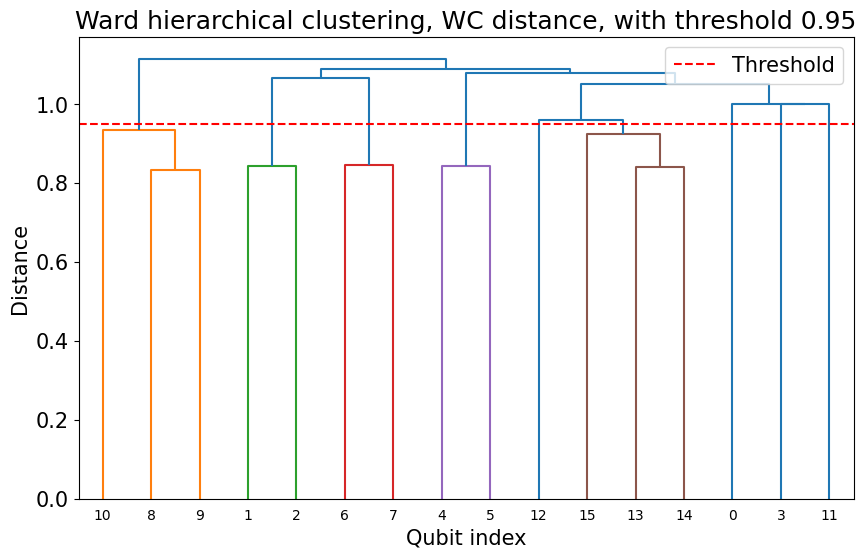

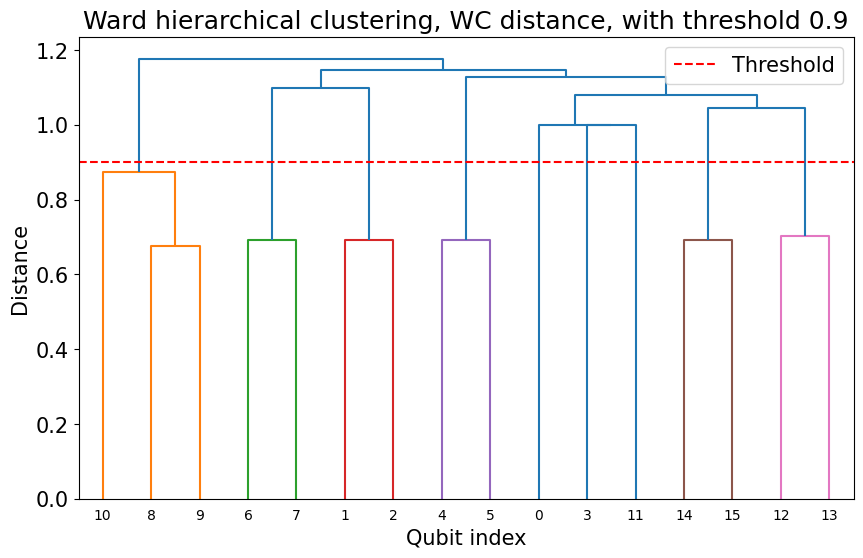

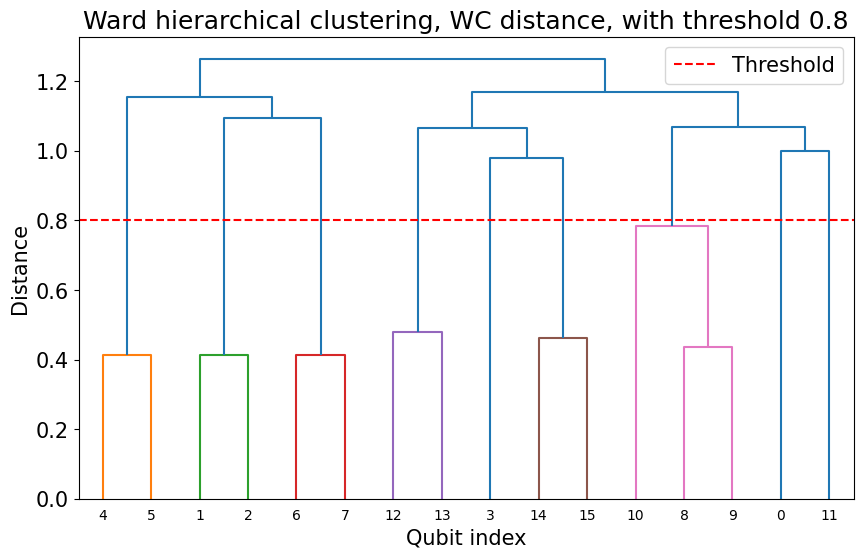

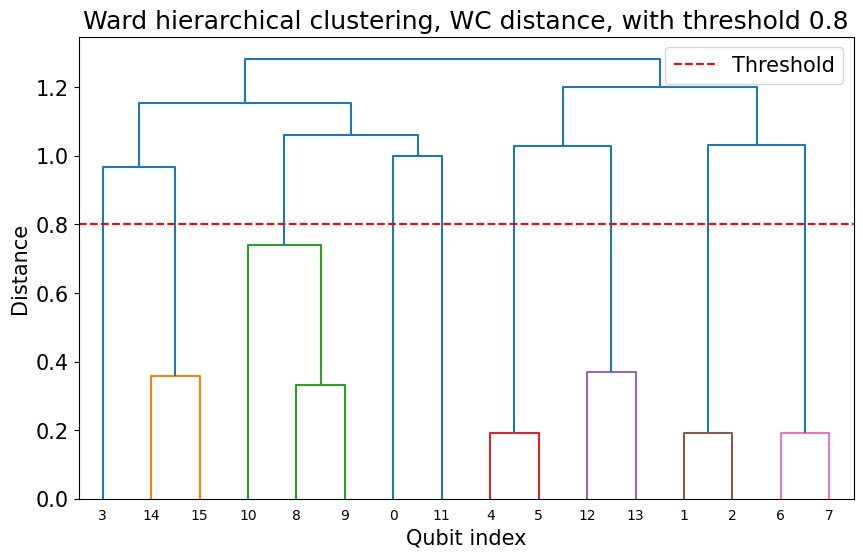

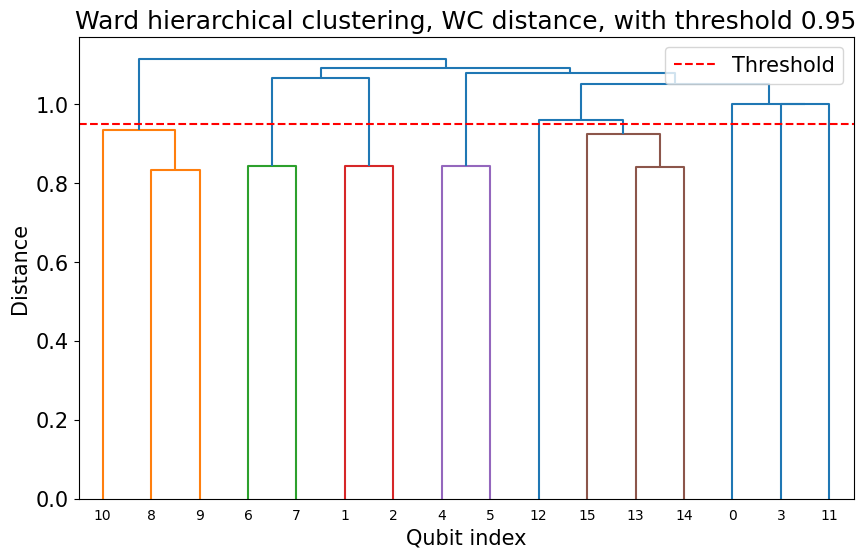

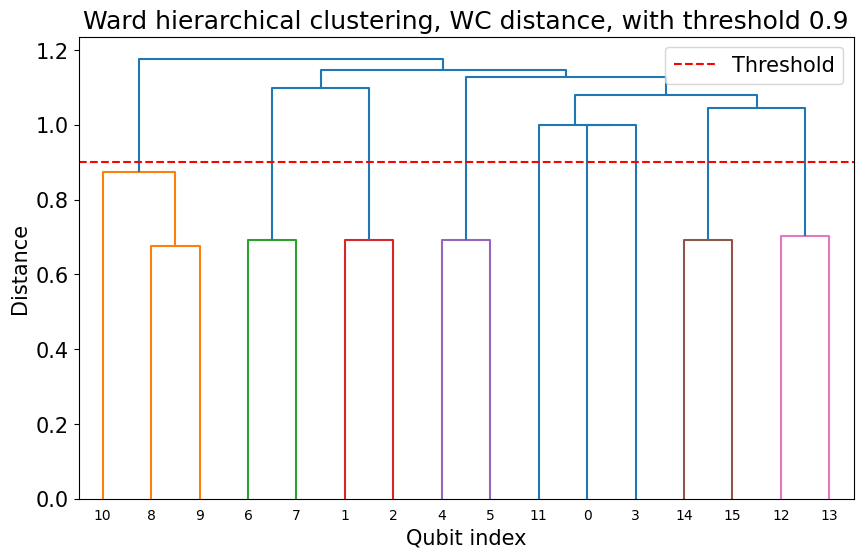

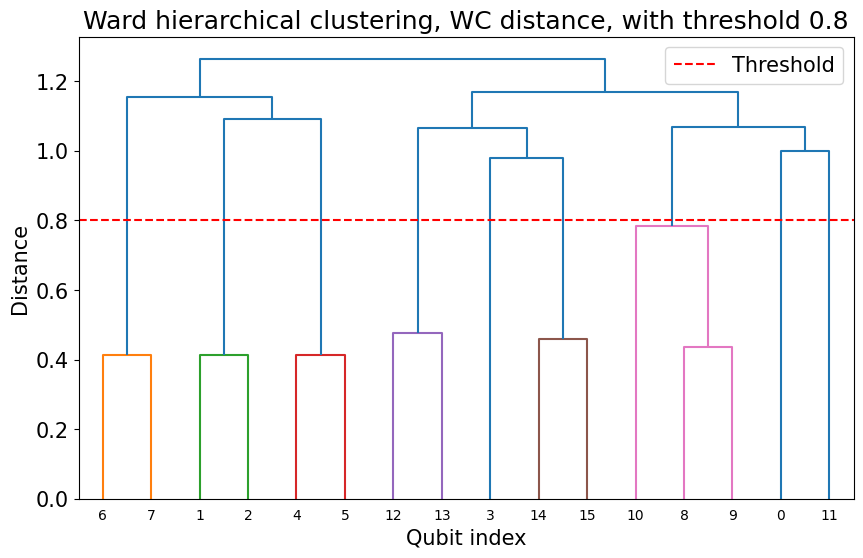

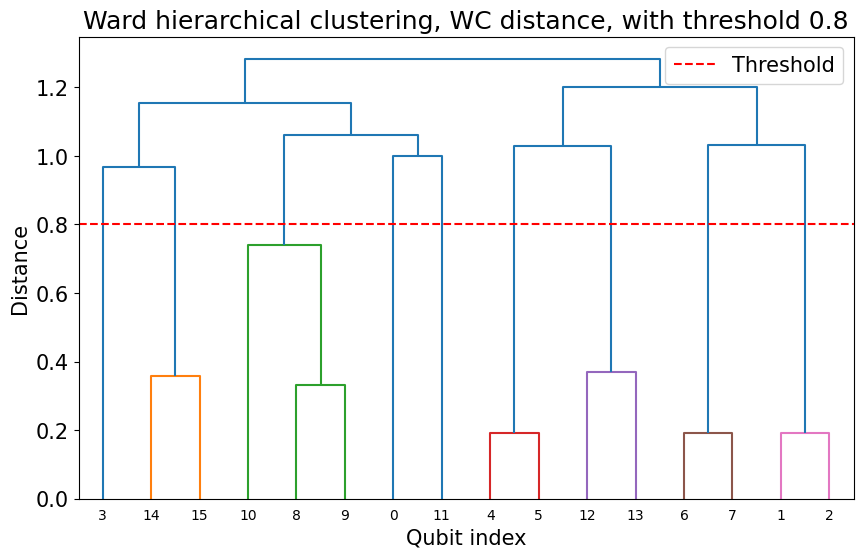

In [5]:
for qrem_angle_array in qrem_array:
    for qrem in qrem_angle_array:
        qrem.perform_clustering(max_cluster_size=4)
        vis.plot_dendrogram(qrem, save_png=False)

# If you are not happy with current cluster cutoffs, you can update them like so:
update_cutoffs = [ 0.95, 0.9, 0.8, 0.8]
for qrem_angle_array in qrem_array:
    for qrem, cutoff in zip(qrem_angle_array, update_cutoffs):
        qrem.update_cluster_cutoff(cutoff)
        vis.plot_dendrogram(qrem, save_png=False)


In [ ]:

#n_pairs = 10
#n_averages = 2
#chunk_size = 4
#selected_two_point_corr_labels = ot.generate_random_pairs_of_qubits(qrem.n_qubits,n_pairs) # np.array([[0,1], [2,3]]) #
recon_mode = [0,4,5]
dict_array = []
#perfect_clustering_dict_array = [] 

# Manually set true states equal in all angle cases.
# qrem_array[0].set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size)
# base_rho_true_array = qrem_array[0].rho_true_array




for j, qrem_angle_array in enumerate(qrem_array):
    angle_array = []
    for i, qrem in enumerate(qrem_angle_array):
        print(f'Performing QST for angle {j}, run {i}.')
        qrem.reconstruct_all_one_qubit_POVMs()
        qrem.reconstruct_cluster_POVMs()
        #qrem.reconstruct_cluster_with_perfect_clustering()
        #qrem.set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size) # This is just used to set all other properties right, then overwrite the true states
        #qrem.rho_true_array = base_rho_true_array

        qrem.perform_averaged_QST_measurements()
        qrem.set_two_point_correlators( two_point_corr_labels = selected_two_point_corr_labels)
        dict = qrem.perform_two_point_correlator_QST(recon_mode)

        qrem.delete_QDT_outcomes()
        qrem.delete_QST_outcomes()
        #perfect_clustering_dict = qrem.perform_two_point_correlator_QST(recon_mode, assume_perfect_clustering=True)
        angle_array.append(dict)
        #perfect_clustering_dict_array.append(perfect_clustering_dict)
    dict_array.append(angle_array)


with open(f'{qrem.data_path}/result_QST.npy', 'wb') as f:
    np.save(f, dict_array)

perm_data_path = f'{qrem.data_path}'

Performing QST for angle 0, run 0.


AttributeError: 'QREM' object has no attribute '_QDT_outcomes'

### Plotting for the coherent error case

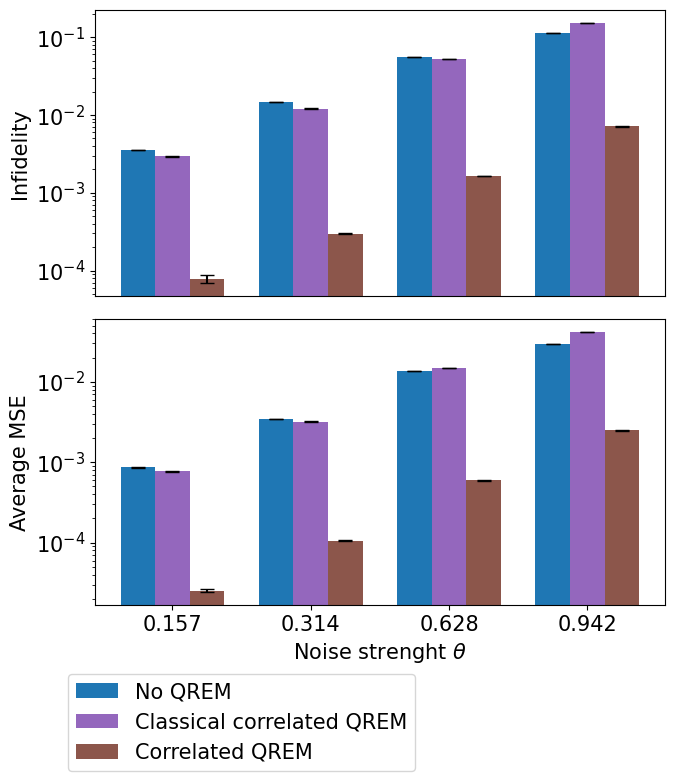

In [15]:
#perm_data_path = "QDOT_results/coherent_example/2025-01-09_11-24-07_634d8d29-0158-4353-a0f5-cae6c9e83af7/angle=0.9424777960769378"
rot_angle_array = np.array([5,10,20,30])* np.pi/100
np.set_printoptions(precision=3)
with open(f'{perm_data_path}/result_QST.npy', 'rb') as f:
    dict_array = np.load(f, allow_pickle=True)
    
    
def k_mean_infidelity_computation(state_matrix, rho_true_array):
    """
    Computes the inifdelities to be plotted for the k-mean plot
    state_matrix comes in shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels) , 2**n_qubits, 2**n_qubits]
    rho_true_array comes in shape [n_averages, n_two_point_corr, 2**n_qubits, 2**n_qubits]

    will return infidelities averaged over n_averages and n_two_point_corr, final shape will be [n_k_mean, n_modes]
    """
    mode_mean_inf = [ot.compute_mode_mean_infidelitites(k_mean,rho_true_array) for k_mean in state_matrix]
    # Returns a list of arrays of shape [n_k_mean, n_modes, len(two_point_corr_labels)]
    return np.mean(mode_mean_inf, axis = 2)


def compute_k_mean_expectation_values(state_matrix,op_string_array):
    """
    Computes expectation values for a given state matrix.
    state_matrix shape has [n_k_mean, n_modes, n_averages, len(two_point_corr_labels) , 2**n_qubits, 2**n_qubits]
    returns expectation values of shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels), n_op]
    """
    return np.array([ot.compute_state_array_exp_values(matrix,op_string_array) for matrix in state_matrix])

def compute_k_mean_mean_MSE(exp_value_array, true_exp_value):
    """
    Computes the mean MSE for a given expectation value array
    true_exp_value is of shape [n_averages, len(two_point_corr_labels), n_op]
    exp_value_array is of shape [n_k_mean, n_modes, n_averages, len(two_point_corr_labels), n_op]
    returns an array of shape [n_k_mean, n_modes]
    """
    return np.array([[np.mean((true_exp_value - mode)**2) for mode in k_mean] for k_mean in exp_value_array])

# We need to treat each k-mean on it's own.

traced_down_rho_true_array = dict_array[0][0]['traced_down_rho_true_array']
n_averages = dict_array[0][0]['n_average']
two_point_corr_labels   = dict_array[0][0]['two_point_corr_labels']

# Generate average Pauli expectation values
n_op = 25
op_string_array = ot.generate_random_pauli_string(n_op,2)
true_exp_value = compute_k_mean_expectation_values([[traced_down_rho_true_array]],op_string_array)[0,0]

# We need to treat each k-mean on it's own.
state_matrix = []
inf_matrix = []
inf = []
MSE = []

for std_it in range(len(dict_array)):
    angle_state_matrix = []
    for angle_it in range(len(dict_array[std_it])):
        state_array, label_array = ot.load_state_array_from_result_dict(dict_array[std_it][angle_it])
        #perfect_clustering_state_array, _ = ot.load_state_array_from_result_dict(perfect_clustering_dict_array[k_it])
        angle_state_matrix.append(state_array)
        #perfect_clustering_state_matrix.append(perfect_clustering_state_array)

    state_matrix.append(angle_state_matrix)
    inf_angle_mean = k_mean_infidelity_computation(angle_state_matrix, traced_down_rho_true_array).T # T is to swap order of modes and k_mean
    inf.append(inf_angle_mean)
    exp_value = compute_k_mean_expectation_values(angle_state_matrix,op_string_array)
    MSE_angle_mean = compute_k_mean_mean_MSE(exp_value, true_exp_value ).T # Transpose to make method be outer layer
    MSE.append(MSE_angle_mean)


inf_mean = np.mean(inf, axis = 0)
MSE_mean = np.mean(MSE, axis = 0)



x = np.arange(len(rot_angle_array))  # the k-mean label locations
color_array = ['C0', 'C4', 'C5']
width = 0.25  # the width of the bars
multiplier = 0
# The shape of the array is 
fig, ax = plt.subplots(2,1)

for i in range(len(label_array)): 
    offset = width * multiplier
    rects = ax[0].bar(x + offset, inf_mean[i], width,label=label_array[i], color = color_array[i]) # Transpose to make method be outer layer
    ax[0].errorbar(x + offset, inf_mean[i], yerr=np.std(inf, axis=0)[i], fmt='none', ecolor='k', capsize=5)
       
    #ax[0].plot(x + offset, inf_average_perfect_clustering[i], "kx", label="Perfect clustering" if multiplier == 0 else "")
    multiplier += 1

ax[0].set_yscale('log')
#ax[0,0].set_title(rf"Average over {n_averages} states.")
ax[0].set_xticks(x + width, rot_angle_array)
ax[0].set_ylabel('Infidelity')



# Generate average Pauli expectation values
n_op = 25
op_string_array = ot.generate_random_pauli_string(n_op,2)



# true_exp_value = ot.compute_k_mean_expectation_values([[traced_down_rho_true_array]],op_string_array)[0,0]
# stadard_exp_value = ot.compute_k_mean_expectation_values(standard_state_matrix,op_string_array)
# perfect_clustering_exp_value_array = ot.compute_k_mean_expectation_values(perfect_clustering_state_matrix,op_string_array)
# standard_mean_MSE = ot.compute_k_mean_mean_MSE(stadard_exp_value, true_exp_value ).T # Transpose to make method be outer layer
# perfect_clustering_MSE = ot.compute_k_mean_mean_MSE(perfect_clustering_exp_value_array, true_exp_value ).T


multiplier = 0
for i in range(len(label_array)):
    offset = width * multiplier
    rects = ax[1].bar(x + offset, MSE_mean[i], width, color = color_array[i])
    ax[1].errorbar(x + offset, MSE_mean[i], yerr=np.std(MSE, axis=0)[i], fmt='none', ecolor='k', capsize=5) 
    #ax[1].plot(x + offset, perfect_clustering_MSE[i], "kx",)
    multiplier += 1
    

ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].set_yscale('log')
ax[1].set_ylabel(f'Average MSE')

ax[-1].set_xticks(x + 1*width, np.round(rot_angle_array, 3))
ax[-1].set_xlabel(r'Noise strenght $\theta$')

#img = plt.imread("images/cluster_formation_16_coherent.png")
#fig.figimage(img, 680, 80, zorder=3, alpha=1)

fig.set_size_inches(7, 7)
fig.tight_layout()
fig.legend(loc='center left', bbox_to_anchor=(0.1,-.05))
fig.savefig(f'images/Results/coherence_example.png', dpi = 300, bbox_inches='tight')

# 100 qubit example, random correlators
The 100 qubit example will simply be a mean over random correlators. 

In [3]:
# Generate new dictionary for current run
base_path = 'QDOT_results/100_qubit_example'
data_path = sf.generate_data_folder(base_path)

sim_dict ={
    'n_qubits': 100,
    'n_QST_shots': 10**3,
    'n_QDT_shots': 2*10**3,
    'n_hash_symbols': 4,
    'n_cores': 9,
    'max_cluster_size': 3,
    'data_path': data_path,
}

# Ensure that cluster_sizes is a numpy array of integers
#cluster_size = np.array([1, 3, 1, 3, 2, 2, 1, 2, 1], dtype=int)
cluster_size = ot.generate_chunk_sizes(4,25,3)
n_standard_deviation_runs = 10
qrem_default = QREM(sim_dict)
n_state_averages = 1
chunk_size = 4
n_pairs = 50
selected_two_point_corr_labels = ot.generate_random_pairs_of_qubits(sim_dict["n_qubits"],n_pairs)

# qrem.print_current_state()

# qrem.set_random_cluster_size()

# qrem.perform_QDT_measurements()
# qrem.save_initialization()

qrem_default.set_chunked_true_states(n_averages=n_state_averages, chunk_size=chunk_size)
qrem_default.set_initial_cluster_size(cluster_size)
povm_mode = 'strong'
qrem_default.set_exp_POVM_array(noise_mode = povm_mode)

qrem_array = np.array([QREM(sim_dict) for _ in range(n_standard_deviation_runs)])
for qrem in qrem_array:
    qrem.copy_POVM_array(qrem_default)
    qrem.print_current_state()

    qrem.set_initial_cluster_size(cluster_size)

    qrem.perform_QDT_measurements()
    qrem.copy_chunked_true_states(qrem_default)
    qrem.save_initialization()


Using hash from perfect_hash(16,100,4).npy.
Loaded 61 POVMs from Exp_povms/Extracted_modified.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
Using hash from perfect_hash(16,100,4).npy.
The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   13.6s
[Parallel(n_jobs=9)]: Done 531 tasks      | elapsed:   15.4s
[Parallel(n_jobs=9)]: Done 1539 tasks      | elapsed:   19.0s
[Parallel(n_jobs=9)]: Done 2835 tasks      | elapsed:   23.7s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   28.0s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    3.5s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    7.2s
[Parallel(n_jobs=9)]: Done 3150 tasks      | elapsed:   12.2s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   15.6s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.7s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    2.3s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    7.2s
[Parallel(n_jobs=9)]: Done 2430 tasks      | elapsed:   11.2s
[Parallel(n_jobs=9)]: Done 3366 tasks      | elapsed:   15.0s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   17.7s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.6s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    2.0s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    4.1s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    6.6s
[Parallel(n_jobs=9)]: Done 2430 tasks      | elapsed:    9.8s
[Parallel(n_jobs=9)]: Done 3366 tasks      | elapsed:   13.4s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   16.0s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    1.9s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    4.1s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    6.6s
[Parallel(n_jobs=9)]: Done 2430 tasks      | elapsed:    9.9s
[Parallel(n_jobs=9)]: Done 3366 tasks      | elapsed:   13.6s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   16.2s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    3.3s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    7.2s
[Parallel(n_jobs=9)]: Done 3150 tasks      | elapsed:   12.0s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   15.2s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.6s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    2.0s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    4.1s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    6.9s
[Parallel(n_jobs=9)]: Done 2430 tasks      | elapsed:   10.1s
[Parallel(n_jobs=9)]: Done 3366 tasks      | elapsed:   14.4s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   17.4s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.6s
[Parallel(n_jobs=9)]: Done 486 tasks      | elapsed:    2.0s
[Parallel(n_jobs=9)]: Done 990 tasks      | elapsed:    4.3s
[Parallel(n_jobs=9)]: Done 1638 tasks      | elapsed:    6.8s
[Parallel(n_jobs=9)]: Done 2430 tasks      | elapsed:   10.0s
[Parallel(n_jobs=9)]: Done 3366 tasks      | elapsed:   13.6s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   16.3s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    3.1s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    6.6s
[Parallel(n_jobs=9)]: Done 3150 tasks      | elapsed:   11.4s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   14.6s finished


The shot budget of the currents settings are:
QDT shots for computational basis reconstruction: 4,036 x 2,000.
QST shots for arbitrary 4-RDM reconstruction: 1,251 x 1,000.
Simulating QDT measurements for 100 qubits.


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 846 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done 1854 tasks      | elapsed:    6.9s
[Parallel(n_jobs=9)]: Done 3150 tasks      | elapsed:   11.9s
[Parallel(n_jobs=9)]: Done 4036 out of 4036 | elapsed:   15.0s finished


Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   36.6s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.4min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.8min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.4min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  7.2min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.4min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.9min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.7min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 17.9min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 21.2min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 25.0min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 29.0min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 33.2min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 37.8min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   34.9s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.4min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.8min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.5min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  7.4min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.6min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 12.1min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.9min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 18.0min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 21.3min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 24.9min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 28.9min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 33.1min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 37.7min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   31.5s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.2min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.5min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.1min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  6.9min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  8.9min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.2min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 13.8min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 16.6min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 19.7min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 23.1min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 26.7min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 30.7min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 34.9min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   31.7s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.2min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.5min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  4.9min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  6.7min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  8.8min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.1min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 13.7min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 16.6min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 19.8min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 23.2min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 26.9min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 30.9min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 35.1min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   32.6s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.3min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.6min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.2min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  7.1min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.3min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.7min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.4min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 17.4min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 20.7min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 24.2min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 28.0min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 32.0min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 36.5min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   38.5s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.4min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.7min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.3min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  7.2min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.3min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.8min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.4min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 17.4min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 20.7min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 24.3min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 28.2min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 32.5min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 37.1min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   32.5s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.3min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.7min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.2min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  7.1min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.3min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.7min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.5min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 17.4min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 20.6min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 24.2min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 28.0min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 32.1min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 36.4min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   36.1s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.3min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.6min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.1min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  6.9min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  9.0min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.4min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 14.0min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 17.0min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 20.2min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 23.6min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 27.4min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 31.5min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 35.9min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:   33.1s
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  2.3min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  3.5min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed:  5.0min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed:  6.8min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed:  8.8min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 11.2min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 13.8min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 16.7min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 19.8min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 23.3min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 27.0min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 30.9min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 35.1min
[

Number of 2 qubit POVMs to reconstruct: 4950


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  54 tasks      | elapsed:  1.3min
[Parallel(n_jobs=9)]: Done 144 tasks      | elapsed:  3.0min
[Parallel(n_jobs=9)]: Done 270 tasks      | elapsed:  4.3min
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:  7.5min
[Parallel(n_jobs=9)]: Done 630 tasks      | elapsed: 11.8min
[Parallel(n_jobs=9)]: Done 864 tasks      | elapsed: 18.5min
[Parallel(n_jobs=9)]: Done 1134 tasks      | elapsed: 22.2min
[Parallel(n_jobs=9)]: Done 1440 tasks      | elapsed: 24.8min
[Parallel(n_jobs=9)]: Done 1782 tasks      | elapsed: 27.9min
[Parallel(n_jobs=9)]: Done 2160 tasks      | elapsed: 31.0min
[Parallel(n_jobs=9)]: Done 2574 tasks      | elapsed: 34.4min
[Parallel(n_jobs=9)]: Done 3024 tasks      | elapsed: 38.3min
[Parallel(n_jobs=9)]: Done 3510 tasks      | elapsed: 42.4min
[Parallel(n_jobs=9)]: Done 4032 tasks      | elapsed: 46.8min
[Parallel(n_jobs=9)]: Done 4590 tasks      | elapsed: 53.0min
[

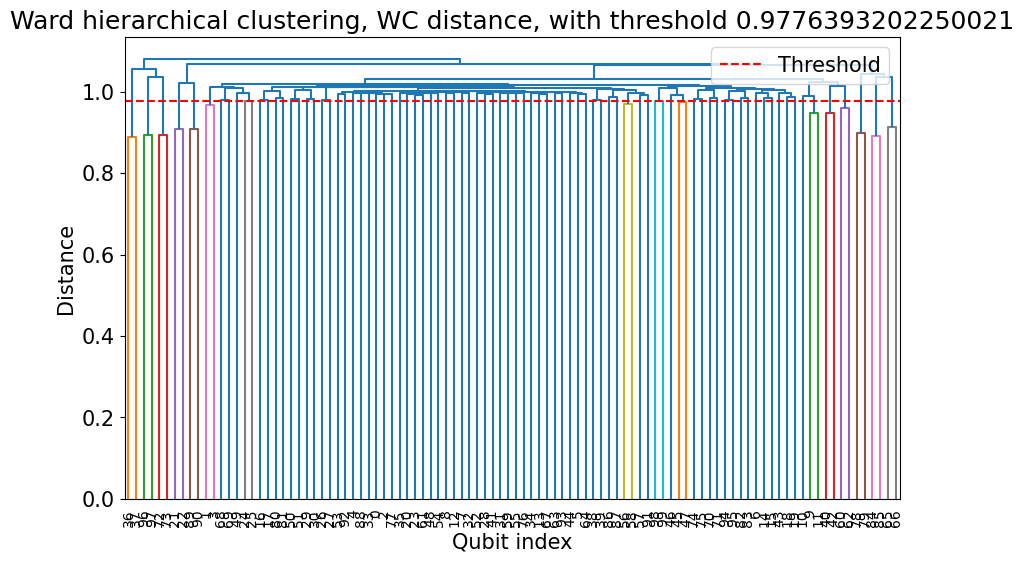

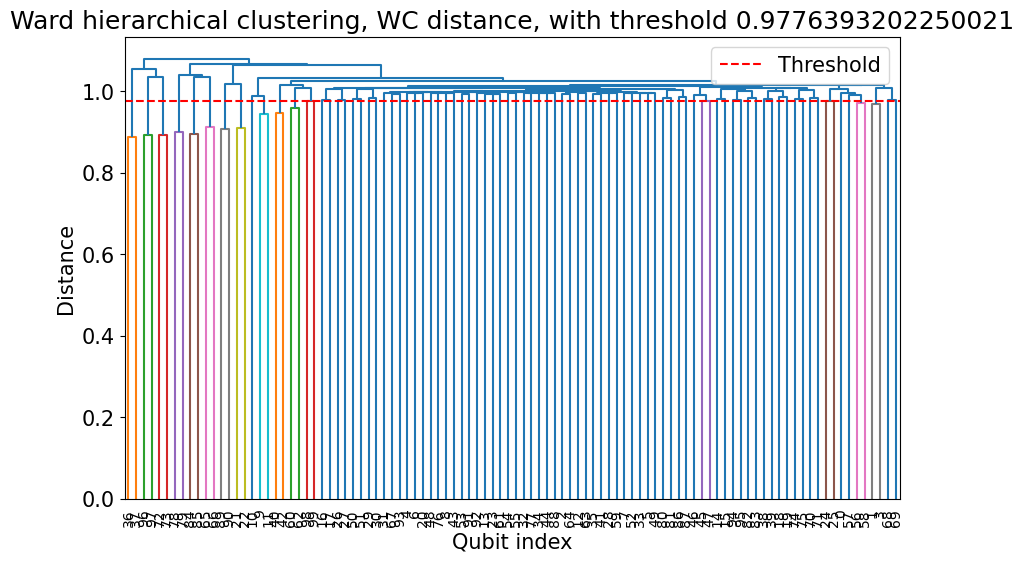

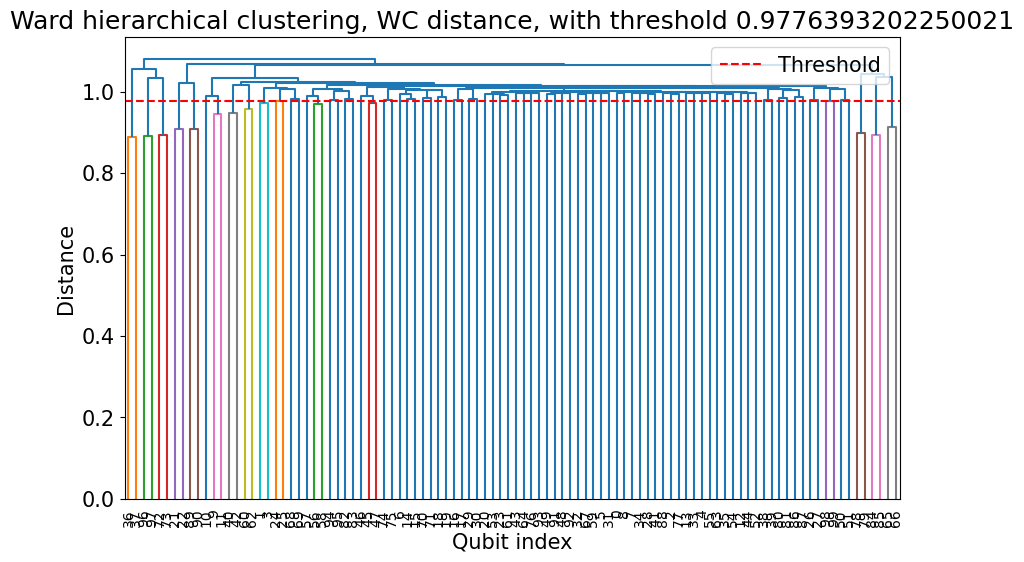

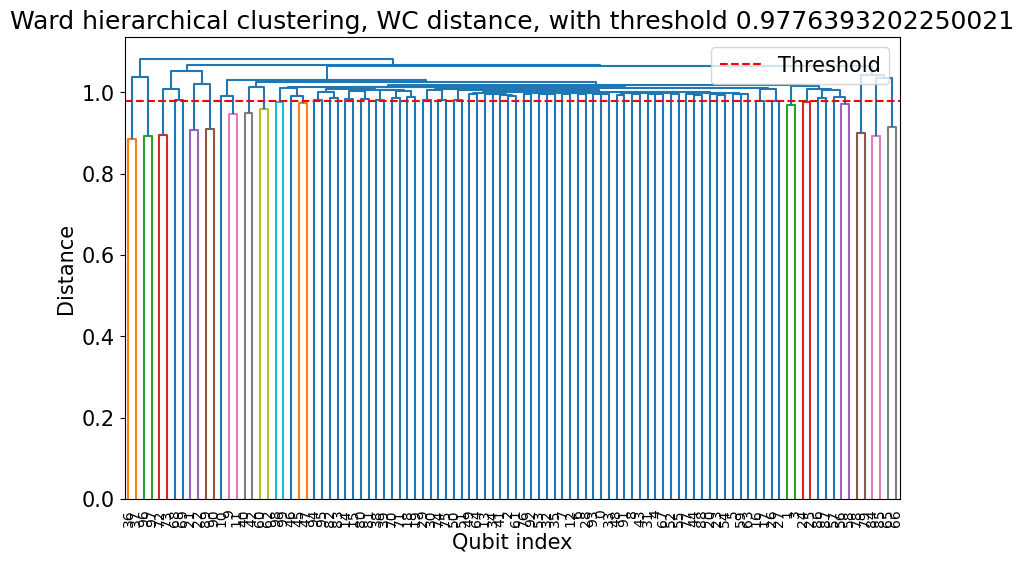

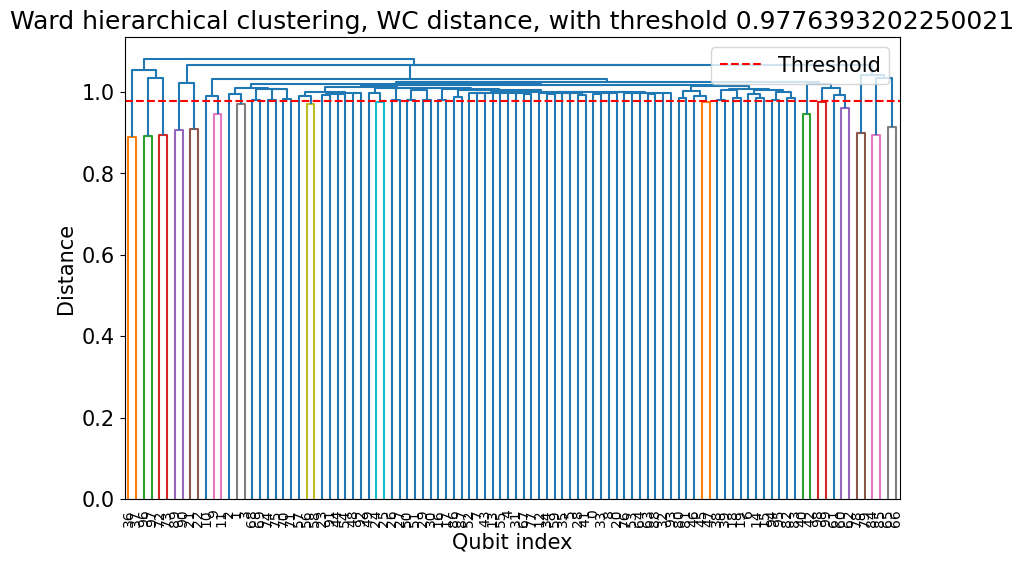

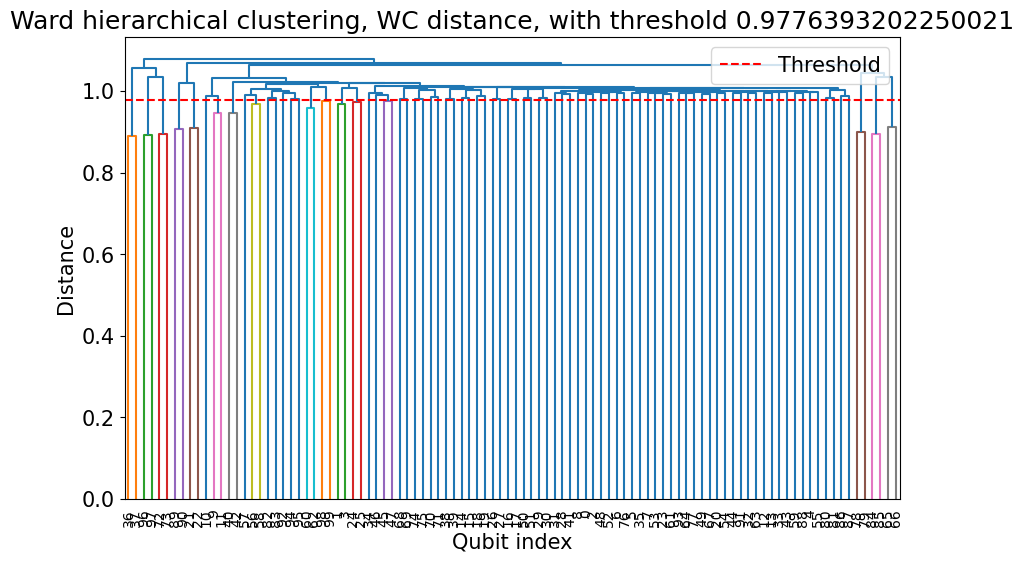

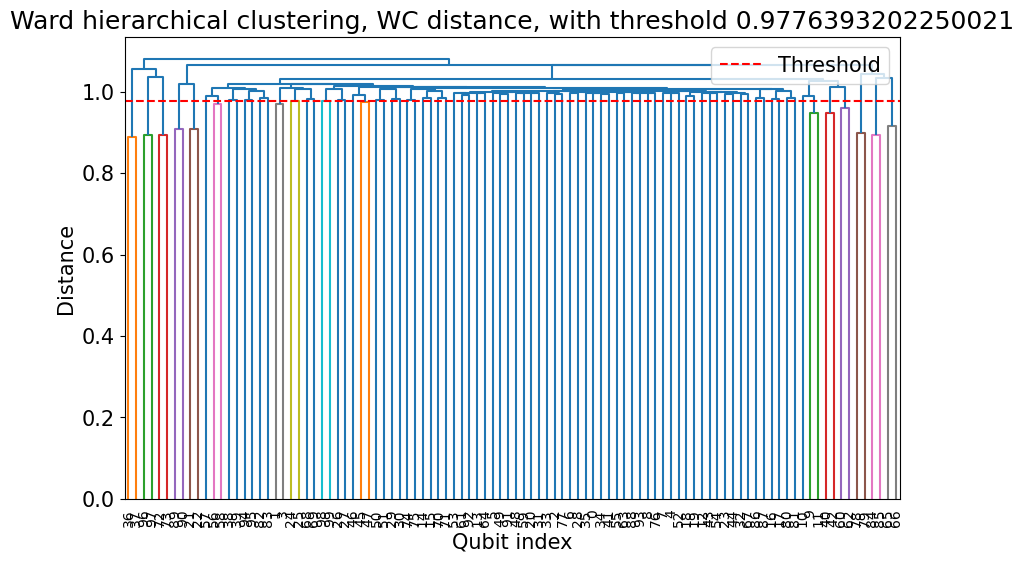

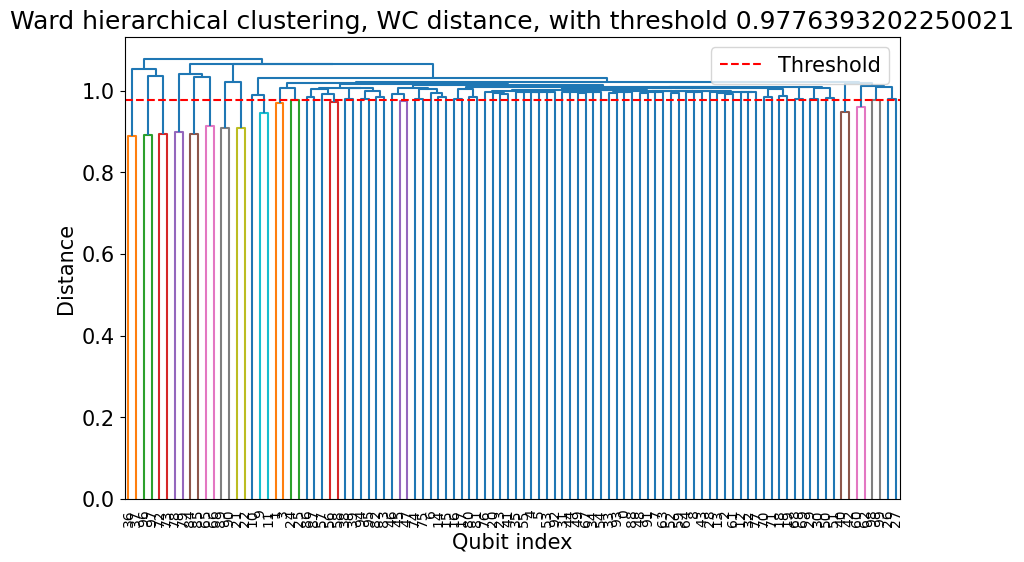

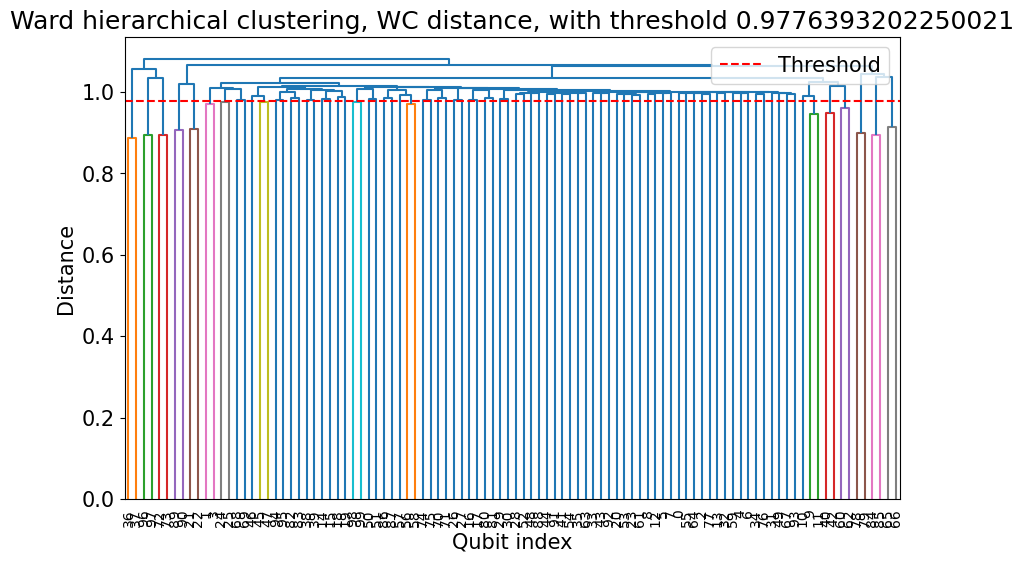

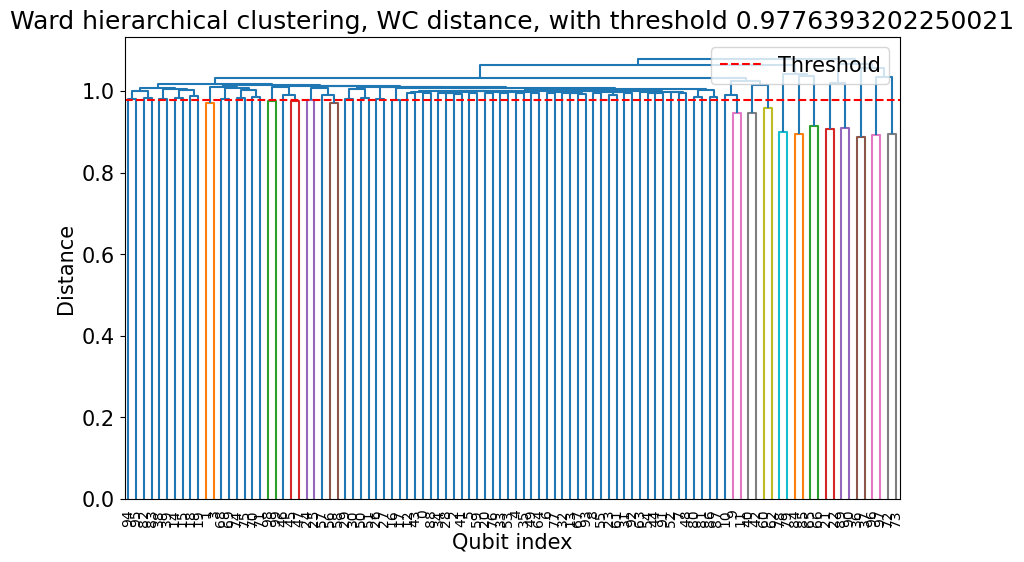

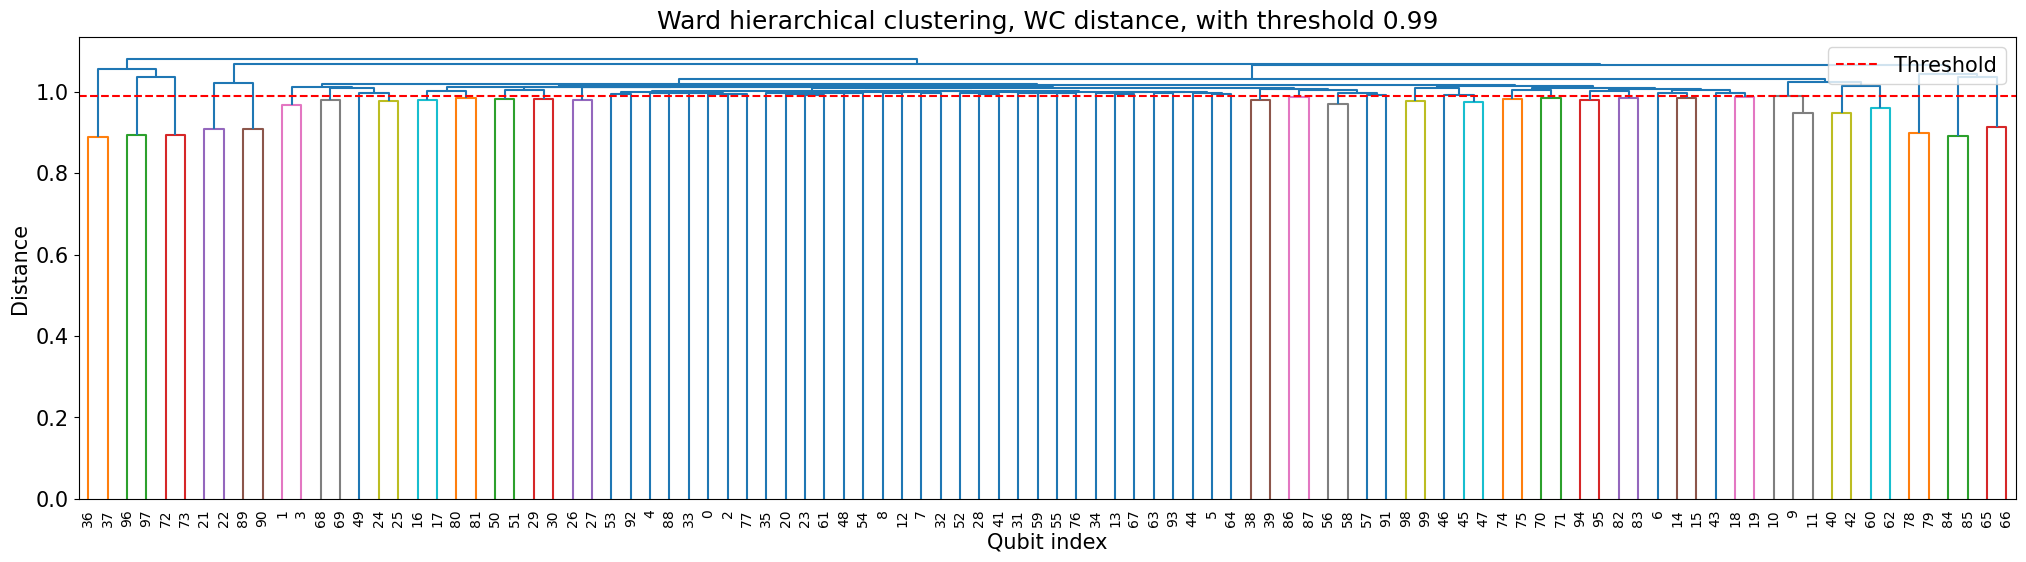

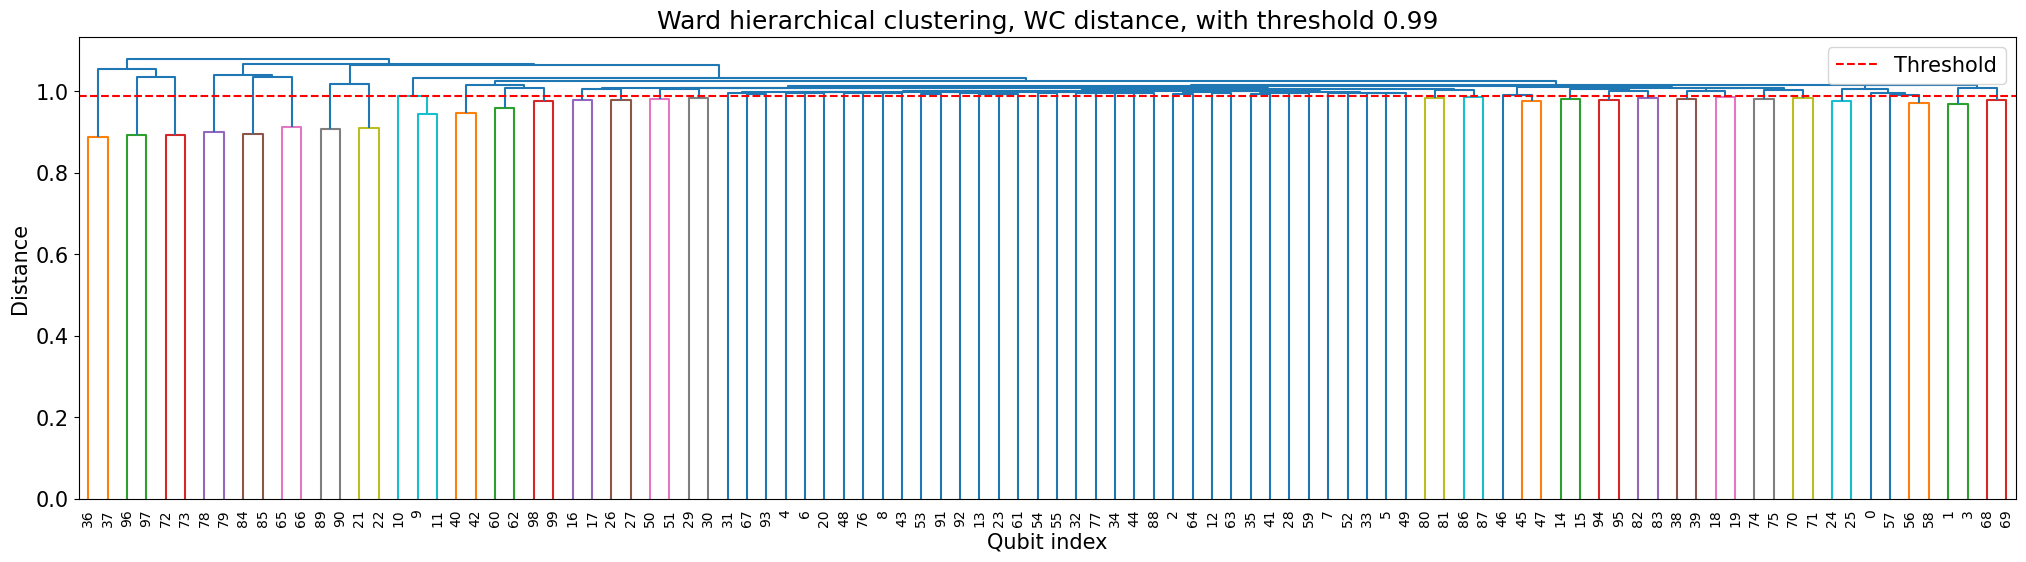

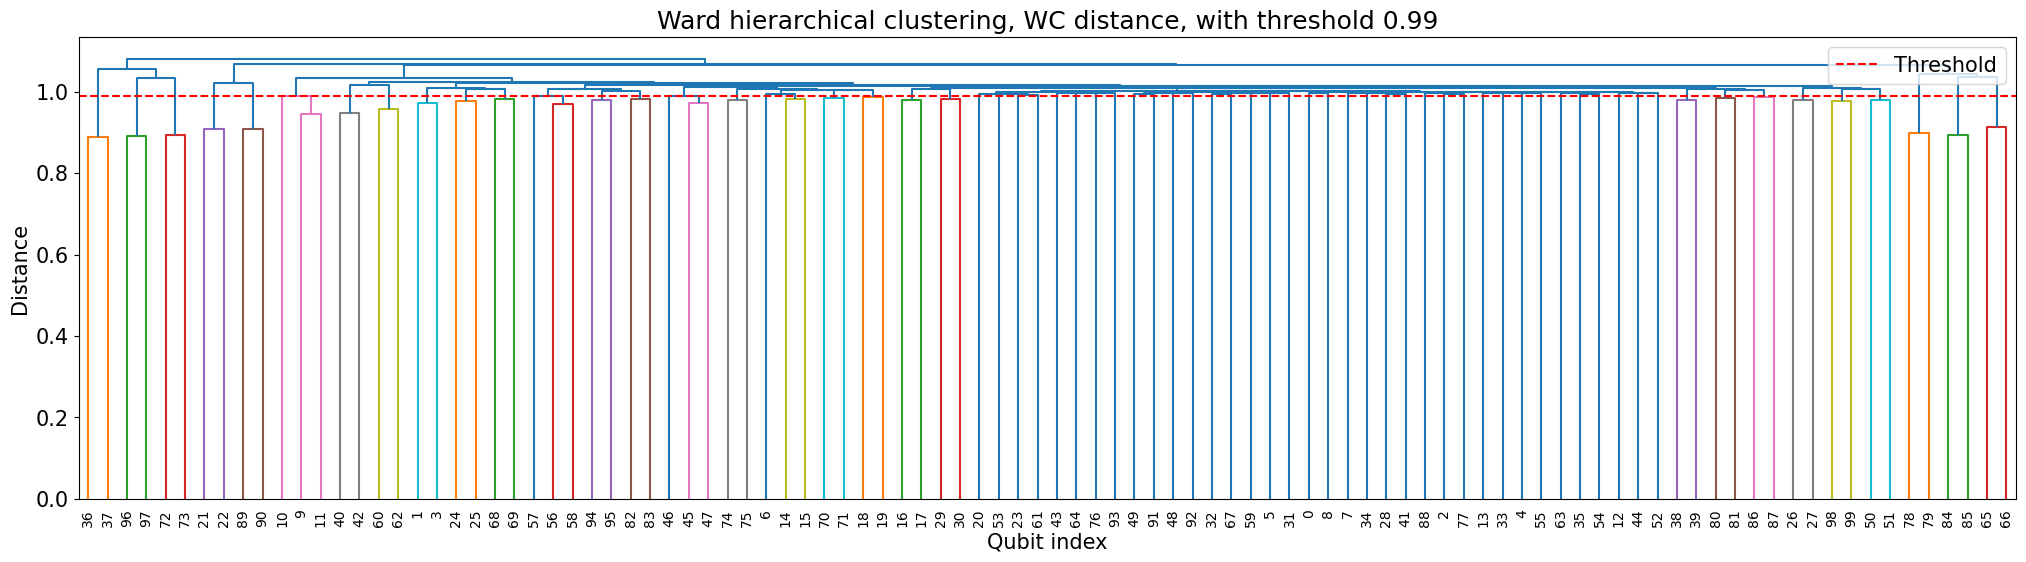

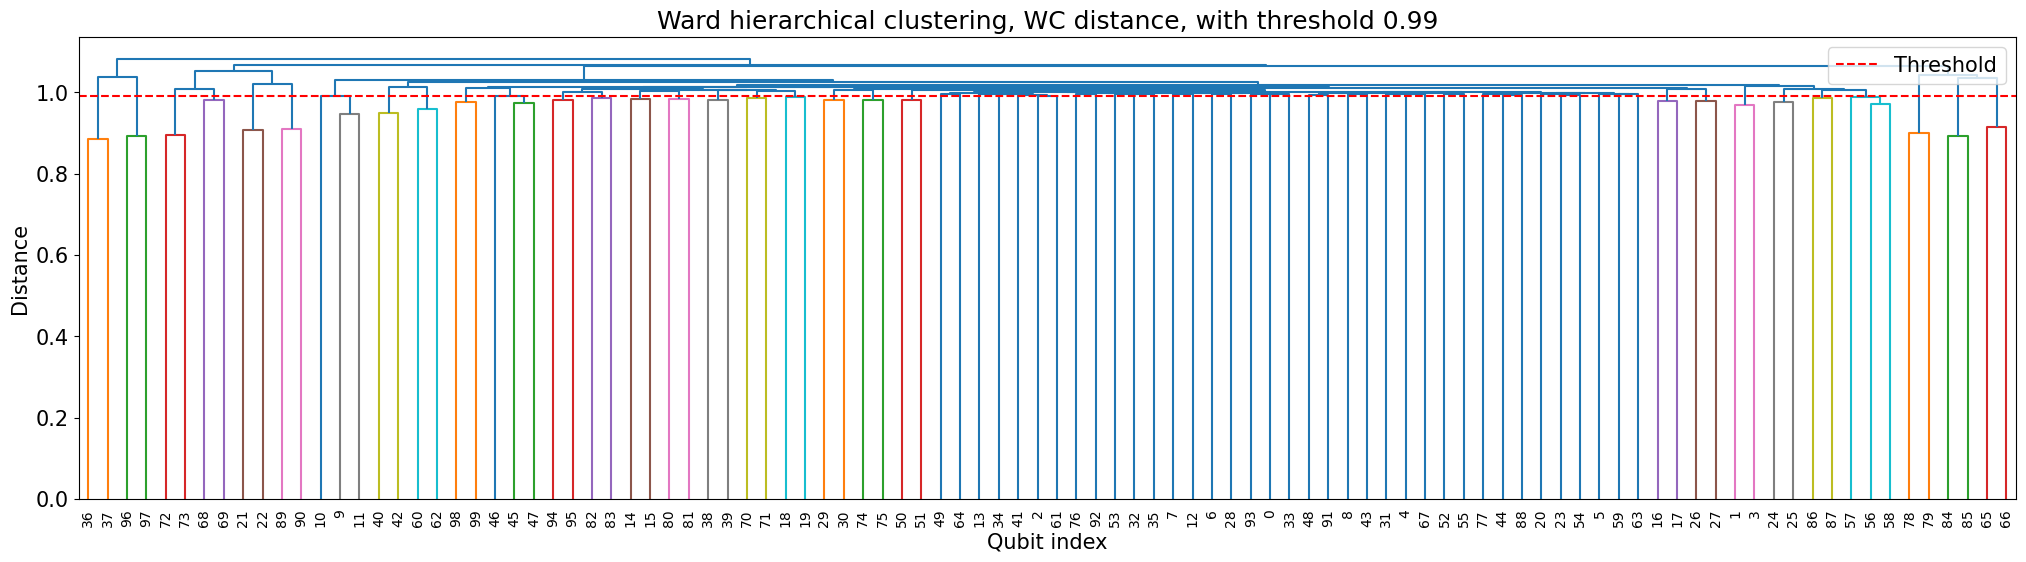

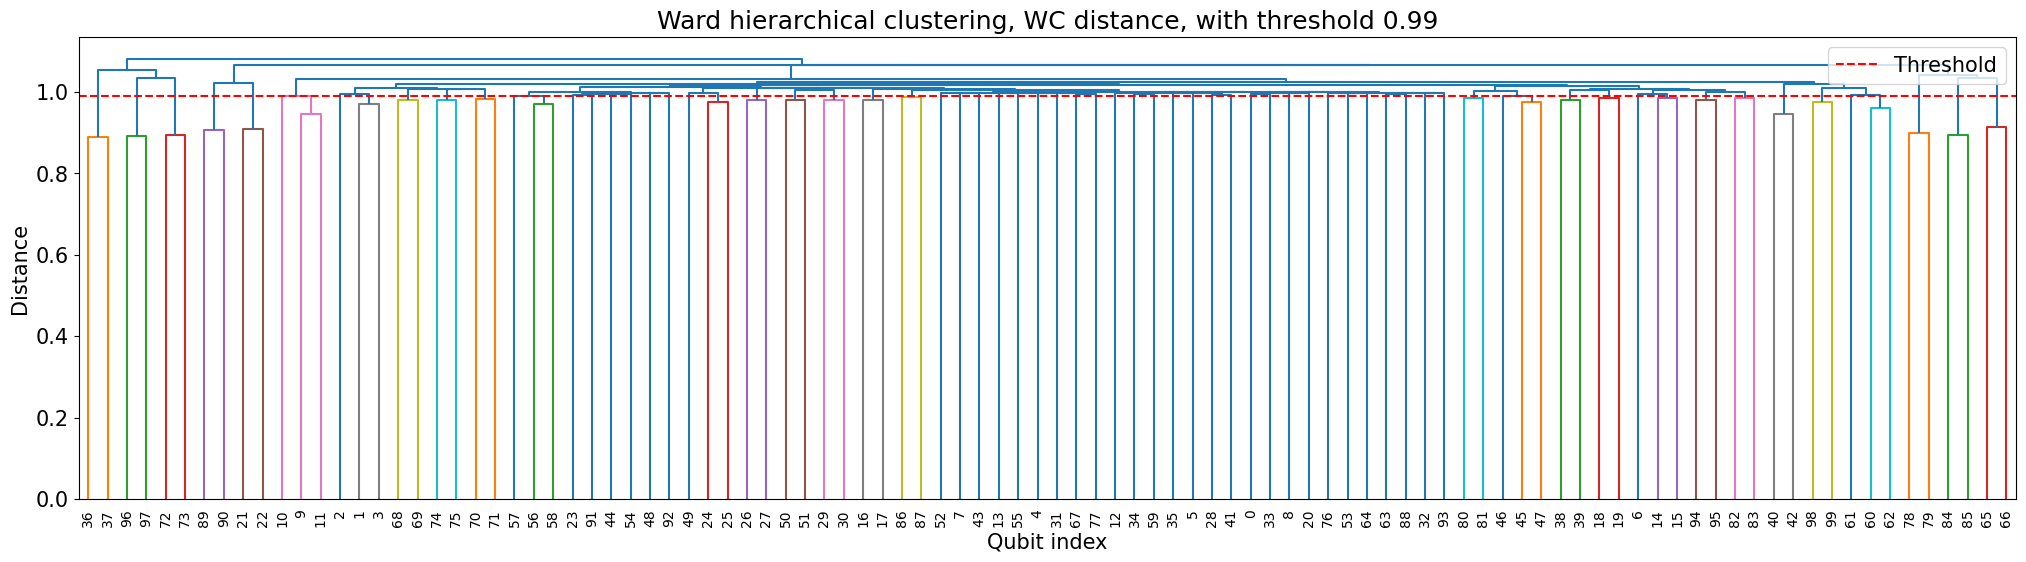

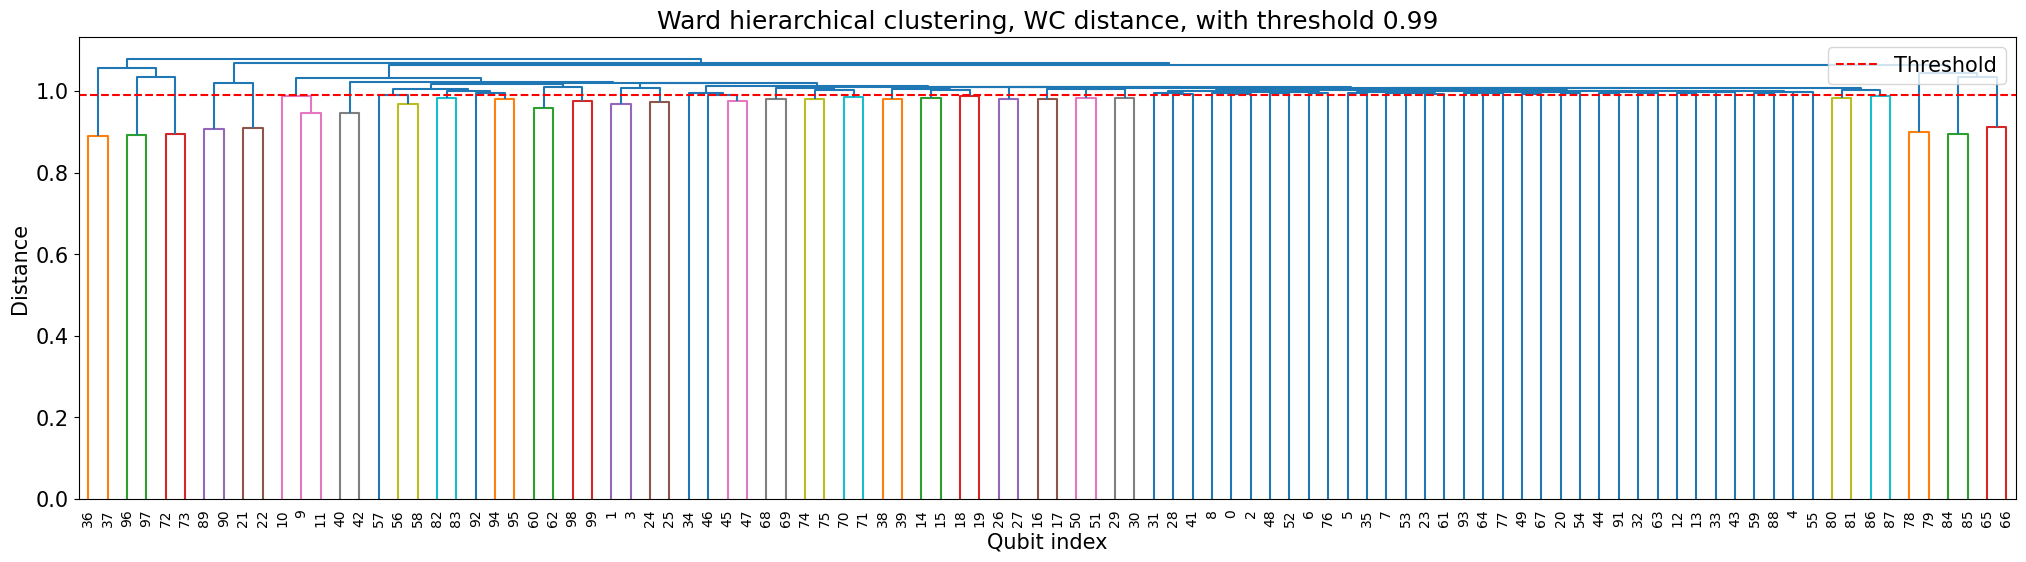

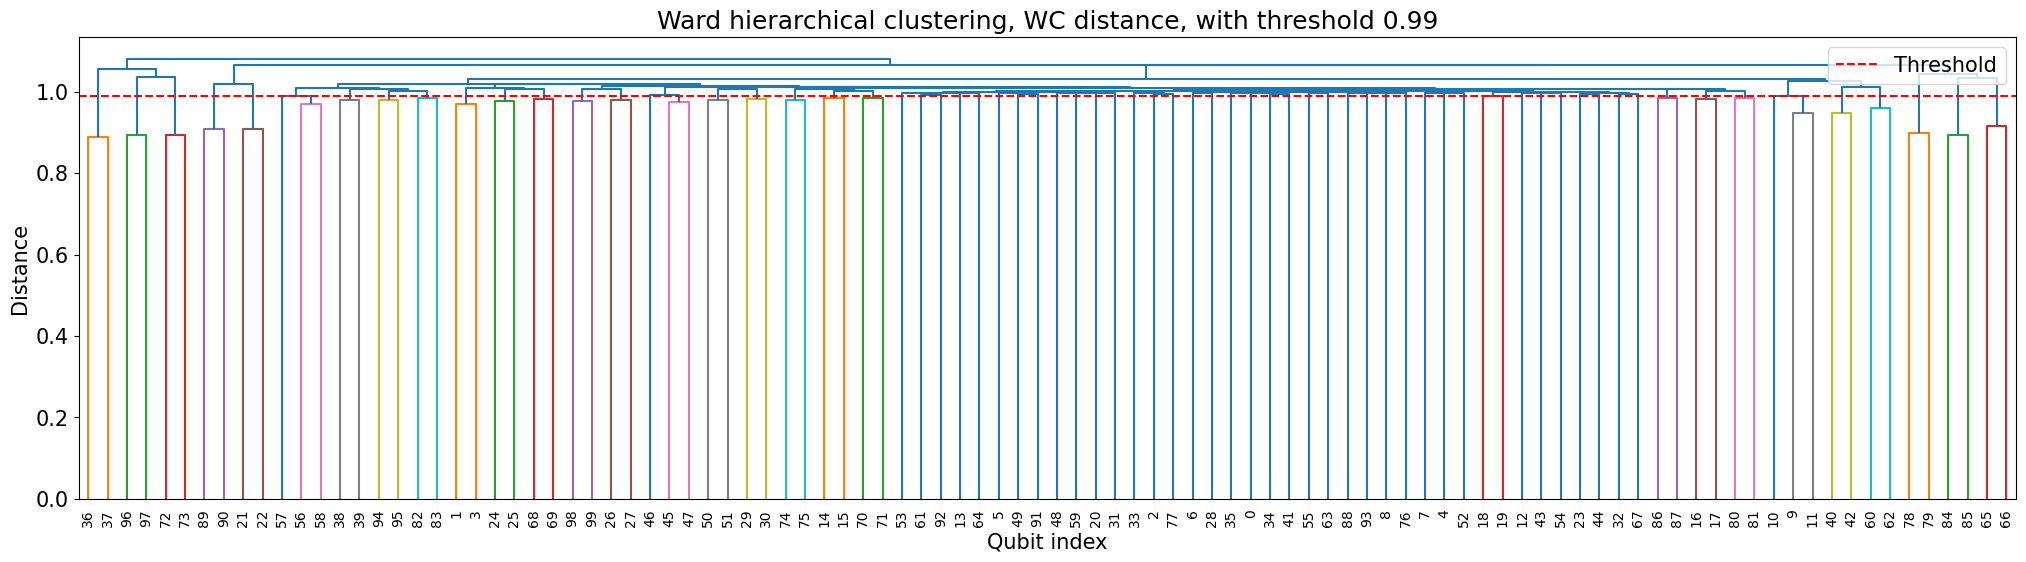

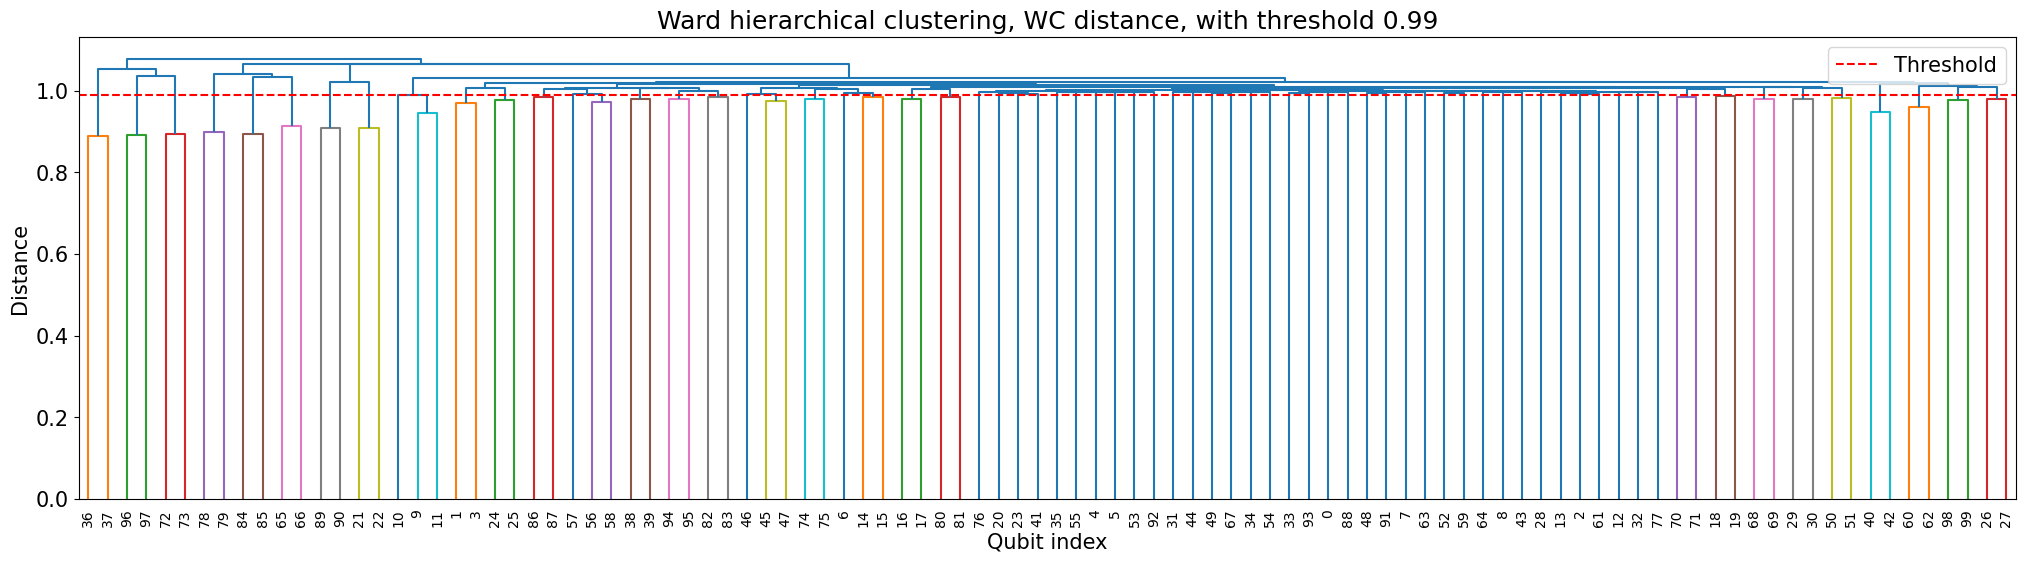

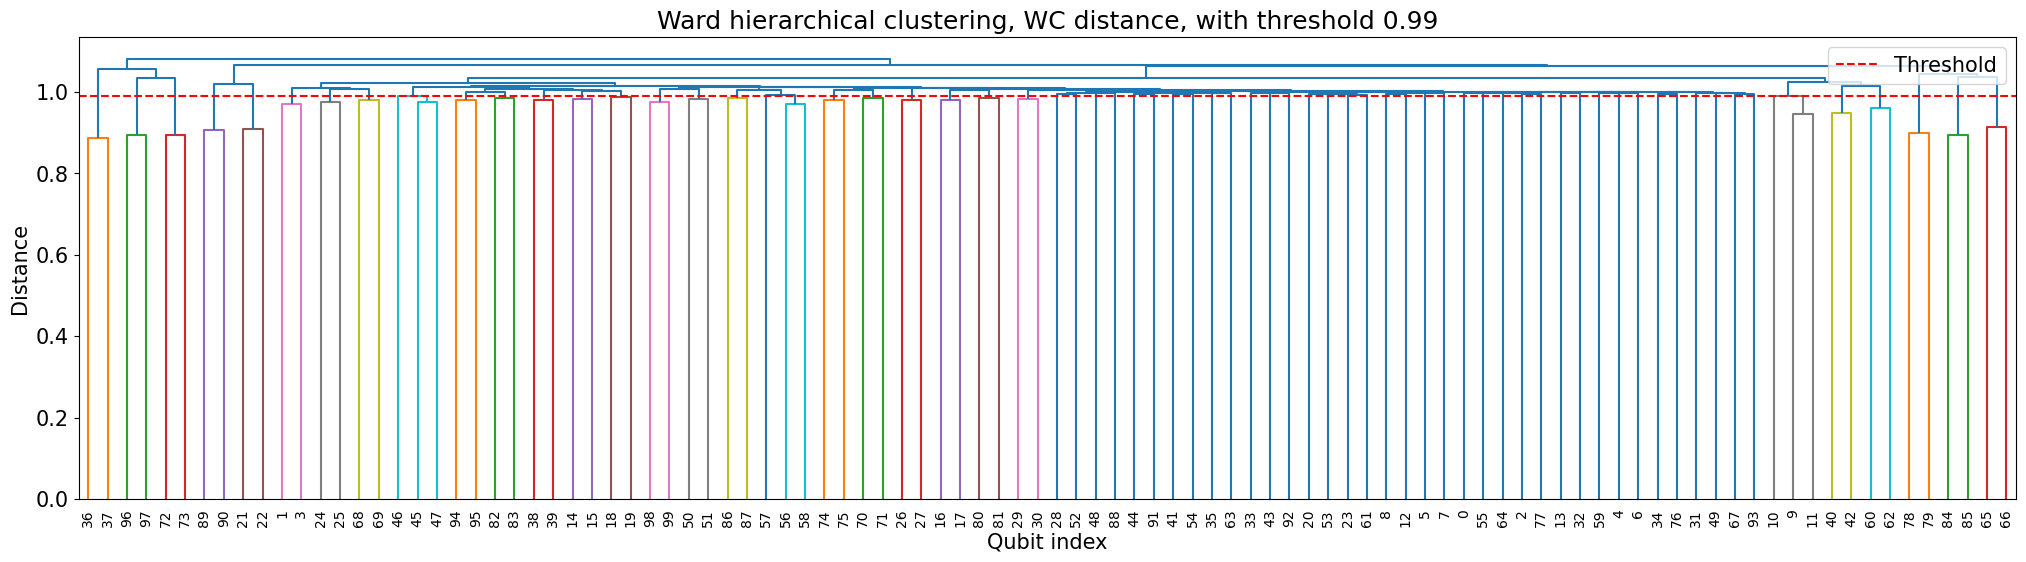

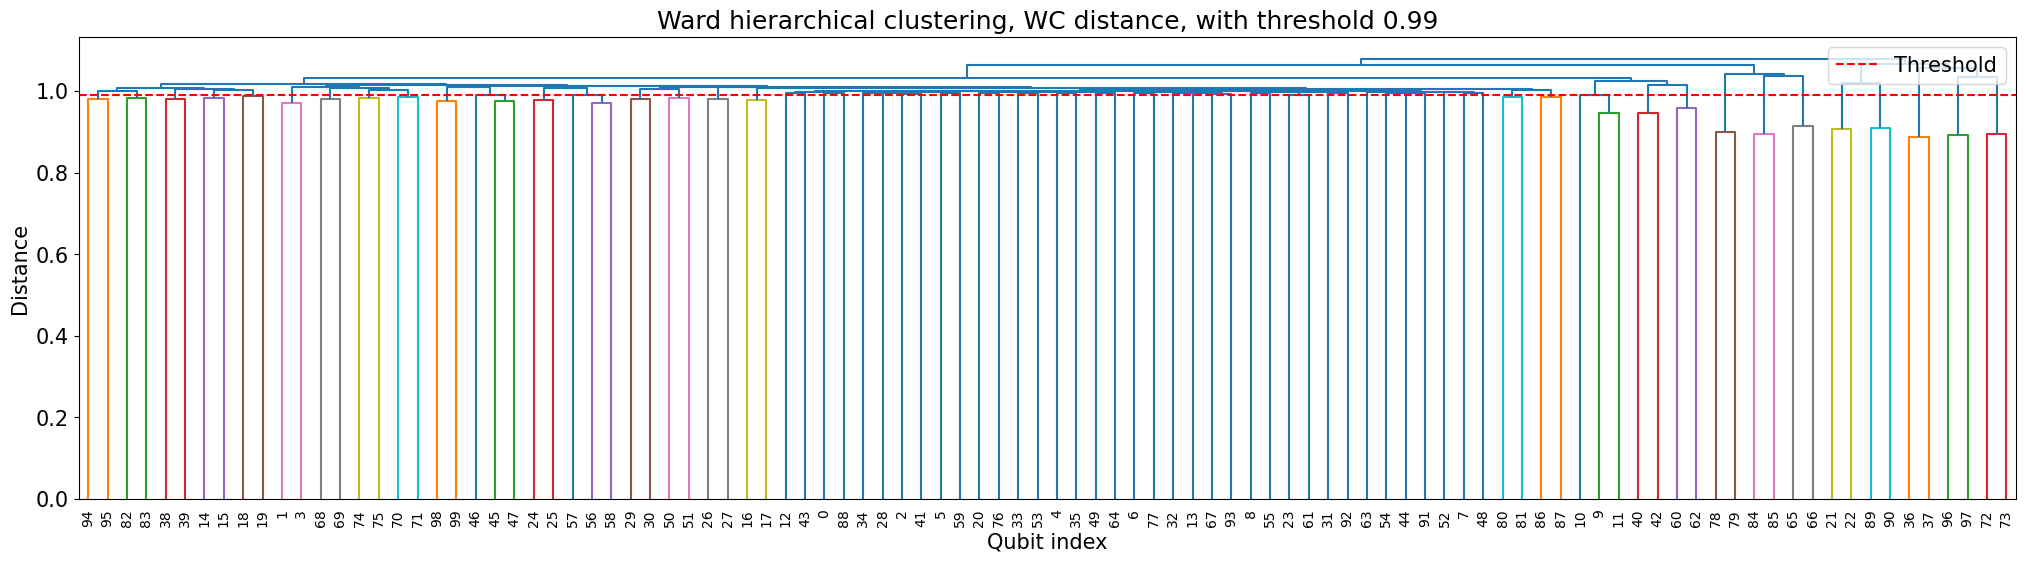

In [6]:
for qrem in qrem_array:
    
    qrem.perform_clustering(max_cluster_size=3)
    vis.plot_dendrogram(qrem)
    
    
new_cutoff = 0.99
for qrem in qrem_array:
    qrem.update_cluster_cutoff(new_cutoff)
    vis.plot_dendrogram(qrem, save_png=True, plot_shape=(25,6))

In [7]:
dict_array = []
#selected_two_point_corr_labels = np.array([[22,21],[85, 86]])
print(selected_two_po)
for qrem in qrem_array:
    qrem.reconstruct_all_one_qubit_POVMs()
    qrem.reconstruct_cluster_POVMs()
    #qrem.reconstruct_cluster_with_perfect_clustering()
    # n_averages = 1
    # chunk_size = 4
    # qrem.set_chunked_true_states(n_averages=n_averages, chunk_size=chunk_size)
    qrem.perform_averaged_QST_measurements()
    

    #selected_two_point_corr_labels =  np.array([[0,1],[2,3],[4,5],[6,7],[8,9], [10,11], [12,13], [14,15], [16,17], [18,19], [20,21], [22,23]])
    #print(selected_two_point_corr_labels)

    qrem.set_two_point_correlators( two_point_corr_labels = selected_two_point_corr_labels)
    recon_mode = [0,2,5]

    result_dict = qrem.perform_two_point_correlator_QST(recon_mode)
    #perfect_clustering_dict = qrem.perform_two_point_correlator_QST(recon_mode, assume_perfect_clustering=True)
    qrem.delete_QDT_outcomes() # To free up space, as memory runs out
    qrem.delete_QST_outcomes()
    dict_array.append(result_dict)
with open(f'{qrem.data_path}/result_QST.npy', 'wb') as f:
    np.save(f, dict_array)

perm_data_path = f'{qrem.data_path}'



NameError: name 'selected_two_po' is not defined

['No QREM ', 'Two-point QREM', 'Correlated QREM']
['No QREM ', 'Two-point QREM', 'Correlated QREM']
[0 1]


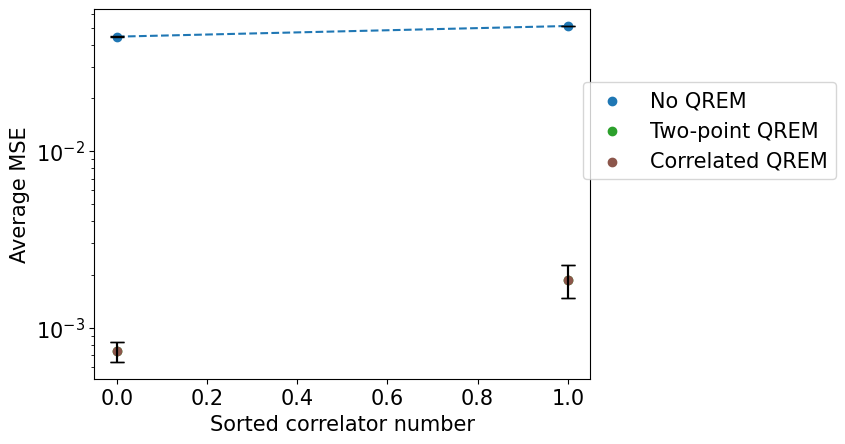

In [25]:


with open(f'{perm_data_path}/result_QST.npy', 'rb') as f:
    dict_array = np.load(f, allow_pickle=True)
    

#perfect_clustering_dict = dict_array[1]
n_averages = dict_array[0]['n_average']
two_point_corr_labels   = dict_array[0]['two_point_corr_labels']
traced_down_rho_true_array = dict_array[0]['traced_down_rho_true_array']

#standard_state_array, label_array = ot.load_state_array_from_result_dict(standard_dict)
#perfect_state_array, _ = ot.load_state_array_from_result_dict(perfect_clustering_dict)


n_op = 25
op_string_array = ot.generate_random_pauli_string(n_op,2)
true_exp_value = ot.compute_state_array_exp_values([traced_down_rho_true_array],op_string_array)[0]

#inf_array = []
state_array = []
MSE_array = []
for dict in dict_array:
    state, label_array = ot.load_state_array_from_result_dict(dict)
    print(label_array)
    
    # The states has shapes [n_modes, n_averages, len(two_point_corr_labels), 2**n_qubits, 2**n_qubits]
    #inf_array.append(ot.compute_mode_mean_infidelitites(state, traced_down_rho_true_array))#[filter_array]
    state_array.append(state)
    exp_value = ot.compute_state_array_exp_values(state,op_string_array)
    MSE_array.append(ot.compute_op_and_n_averages_mean_MSE(exp_value, true_exp_value))
    # Resulting arrays have shapes [std_averages,n_modes,n_correlators]

mean_MSE_array = np.mean(MSE_array, axis=0)

sorting_arg = np.argsort(mean_MSE_array.T[:,0])
print(sorting_arg)
sorted_MSE = mean_MSE_array.T[sorting_arg]
#perfect_sorted_MSE = perfect_clustering_MSE.T[sorting_arg]
colors = ['C0', 'C2', 'C5']
fig, ax = plt.subplots(1,1)
ax.plot(sorted_MSE[:,0],linestyle='dashed' )
for i in range(len(sorted_MSE[0])):
    ax.scatter(np.arange(len(sorted_MSE[:,i])), sorted_MSE[:,i],label = label_array[i], color = colors[i])
    ax.errorbar(np.arange(len(sorted_MSE[:,i])), sorted_MSE[:,i], yerr=np.std(MSE_array, axis=0).T[sorting_arg][:,i], fmt='none', ecolor='k', capsize=5)
#ax.scatter(np.arange(len(sorted_MSE[:,0])), perfect_sorted_MSE[:,2],label = 'Perfect clustering', marker='x')
# MSE of shape [n_method , n_correlators]
# for i in range(len(label_array)):
#     ax.bar(i, standard_mean_MSE[i], label=label_array[i])
#     ax.plot(i, perfect_clustering_MSE[i], "kx")
ax.set_yscale('log')
ax.set_ylabel(f'Average MSE')
ax.set_xlabel('Sorted correlator number')
fig.legend(bbox_to_anchor=(1.3,0.75))
corr_x_label = [f'[{label[0]}, {label[1]}]' for label in two_point_corr_labels]





# GHZ states comparison with RShadow

# Runtime/scaling visualization

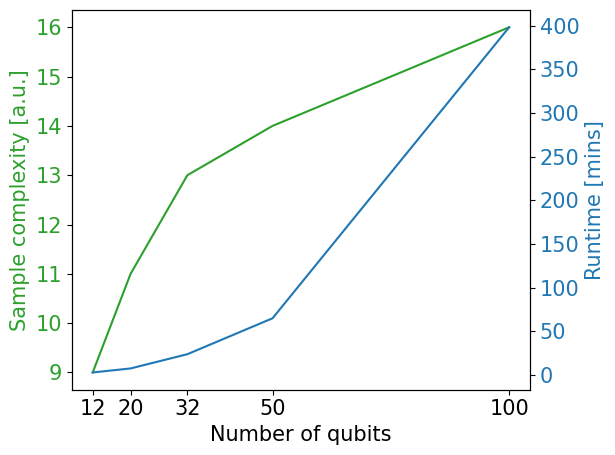

In [ ]:
# Create some mock data
n_qubits = [12, 20,32,50,100]
sample_complexity = np.array([9,11,13,14,16])#np.join(([1,2,3],[])))
comp_runtime = [3,7.6,23.9,65,398]

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Number of qubits')
ax1.set_ylabel(r'Sample complexity [a.u.]',color=color)
ax1.plot(n_qubits, sample_complexity,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(xticks=n_qubits)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Runtime [mins]', color=color)  # we already handled the x-label with ax1
ax2.plot(n_qubits, comp_runtime, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
